In [1]:
import math
import xarray as xr
import cartopy.crs as crs
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.pylab as plt
import matplotlib.path as mpath
from matplotlib.pyplot import figure
import numpy as np
import cartopy.feature as cfeature
from matplotlib.cm import get_cmap
import pyproj
import utm
import pandas as pd 
import traceback 
from pathlib import Path  
import os  
import numpy.ma as ma
import netCDF4 as nc
from netCDF4 import Dataset
import glob
import datetime as dt
import metpy.calc as mpcalc
from metpy.units import units
from metpy.cbook import get_test_data
from metpy.io import metar
from metpy.plots.declarative import (BarbPlot, ContourPlot, FilledContourPlot, MapPanel,
                                     PanelContainer, PlotObs)
from netCDF4 import date2num,num2date
import wrf
from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,
                 cartopy_xlim, cartopy_ylim)
from wrf import getvar, interplevel, to_np, get_basemap, latlon_coords
from wrf import getvar, xy, interp2dxy
from wrf import to_np, getvar, CoordPair, vertcross
from matplotlib.cm import get_cmap
from matplotlib.ticker import (NullFormatter, ScalarFormatter)

In [3]:
#CURRENT DATA
cur_wrfout6 = Dataset('CUR_wrfout_d03_2018-03-25_06_00_00')
#cur_wrfout7 = Dataset('CUR_wrfout_d03_2018-03-25_07_00_00')
#cur_wrfout8 = Dataset('CUR_wrfout_d03_2018-03-25_08_00_00')
#cur_wrfout9 = Dataset('CUR_wrfout_d03_2018-03-25_09_00_00')
cur_wrfout10 = Dataset('CUR_wrfout_d03_2018-03-25_10_00_00')
cur_wrfout11= Dataset('CUR_wrfout_d03_2018-03-25_11_00_00')
cur_wrfout12 = Dataset('CUR_wrfout_d03_2018-03-25_12_00_00')
cur_wrfout13= Dataset('CUR_wrfout_d03_2018-03-25_13_00_00')
#cur_wrfout14= Dataset('CUR_wrfout_d03_2018-03-25_14_00_00')
#cur_wrfout15= Dataset('CUR_wrfout_d03_2018-03-25_15_00_00')
#cur_wrfout16 = Dataset('CUR_wrfout_d03_2018-03-25_16_00_00')
#cur_wrfout17= Dataset('CUR_wrfout_d03_2018-03-25_17_00_00')
#cur_wrfout18= Dataset('CUR_wrfout_d03_2018-03-25_18_00_00')
#cur_wrfout19= Dataset('CUR_wrfout_d03_2018-03-25_19_00_00')
#cur_wrfout20 = Dataset('CUR_wrfout_d03_2018-03-25_20_00_00')
#cur_wrfout21= Dataset('CUR_wrfout_d03_2018-03-25_21_00_00')
#cur_wrfout22= Dataset('CUR_wrfout_d03_2018-03-25_22_00_00')
#cur_wrfout23= Dataset('CUR_wrfout_d03_2018-03-25_23_00_00')
#cur_wrfout24= Dataset('CUR_wrfout_d03_2018-03-26_00_00_00')

#cur_sst_wrfinput_d03 = xr.open_dataset('/Users/Anna/Desktop/WRF/shortRunCurrent/wrfinput_d03')



In [3]:
#uoce =cur_sst_wrfinput_d03.UOCE.values
#voce =cur_sst_wrfinput_d03.VOCE.values
#print(uoce.shape)
#print(voce.shape)
#uoce = uoce[0,:,:]
#voce = voce[0,:,:]
#print(uoce.shape)
#print(voce.shape)

In [4]:
#SST DATA
sst_wrfout6 = Dataset('SST_wrfout_d03_2018-03-25_06_00_00')
#sst_wrfout7 = Dataset('SST_wrfout_d03_2018-03-25_07_00_00')
#sst_wrfout8 = Dataset('SST_wrfout_d03_2018-03-25_08_00_00')
#sst_wrfout9 = Dataset('SST_wrfout_d03_2018-03-25_09_00_00')
sst_wrfout10 = Dataset('SST_wrfout_d03_2018-03-25_10_00_00')
sst_wrfout11 = Dataset('SST_wrfout_d03_2018-03-25_11_00_00')
sst_wrfout12 = Dataset('SST_wrfout_d03_2018-03-25_12_00_00')
sst_wrfout13 = Dataset('SST_wrfout_d03_2018-03-25_13_00_00')
#sst_wrfout14 = Dataset('SST_wrfout_d03_2018-03-25_14_00_00')
#sst_wrfout15 = Dataset('SST_wrfout_d03_2018-03-25_15_00_00')
#sst_wrfout16 = Dataset('SST_wrfout_d03_2018-03-25_16_00_00')
#sst_wrfout17 = Dataset('SST_wrfout_d03_2018-03-25_17_00_00')
#sst_wrfout18 = Dataset('SST_wrfout_d03_2018-03-25_18_00_00')
#sst_wrfout19 = Dataset('SST_wrfout_d03_2018-03-25_19_00_00')
#sst_wrfout20 = Dataset('SST_wrfout_d03_2018-03-25_20_00_00')
#sst_wrfout21 = Dataset('SST_wrfout_d03_2018-03-25_21_00_00')
#sst_wrfout22 = Dataset('SST_wrfout_d03_2018-03-25_22_00_00')
#sst_wrfout23 = Dataset('SST_wrfout_d03_2018-03-25_23_00_00')
#sst_wrfout24 = Dataset('SST_wrfout_d03_2018-03-26_00_00_00')


In [5]:
#Open HYCOM 25
ds_25 = xr.open_mfdataset('/Users/Anna/Desktop/MSMET/Thesis/WRFprepData/March2018HYCOM/020_archv.2018_084_*_3z.nc')#, combine = 'by_coords', concat_dim = 'time')
ds_25.to_netcdf('test_25.nc')
ds25 = xr.open_dataset('test_25.nc')

#WRFIN_D03
wrfinput_d03 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/wrfinput_d03')

In [6]:
old_d03_SST = wrfinput_d03.SST.values-273.15
old_d03_UOCE = wrfinput_d03.UOCE.values
old_d03_VOCE = wrfinput_d03.VOCE.values
XLAT = wrfinput_d03.XLAT.values
XLON = wrfinput_d03.XLONG.values

print('XLAT: ', XLAT.shape, '\nXLON: ', XLON.shape )
print('Max lat: ', np.max(XLAT), '\Min lat: ', np.min(XLAT))
print('Max lon: ', np.max(XLON), '\Min lon: ', np.min(XLON))
print ('d03_UOCE: ',old_d03_UOCE.shape, '\nd03_VOCE: ',  old_d03_VOCE.shape, '\nd03_SST: ', old_d03_SST.shape)

print('\n\n LAT: ', XLAT)
print('\n\n LON: ', XLON)

#REAL RUN 
latbounds = [24, 29]
lonbounds = [-95, -87]

#TEST RUN
#latbounds = [25, 26]
#lonbounds = [-89, -88]

lats = ds25.Latitude.values[:]
lons = ds25.Longitude.values[:]

#set upper & lower bounds
latli = np.argmin(np.abs(lats-latbounds[0]))
latui = np.argmin(np.abs(lats-latbounds[1]))
lonli = np.argmin(np.abs(lons-lonbounds[0]))
lonui = np.argmin(np.abs(lons-lonbounds[1]))

lat_array=ds25.Latitude.values[latli:latui]
lon_array=ds25.Longitude.values[lonli:lonui]
u_subset_25=ds25.variables['u'][:,0,latli:latui, lonli:lonui]
meanU_25 = u_subset_25.mean('MT')
#meanU_25=meanU_25*0.54 - 0.19
meanU_25=meanU_25*0.75-0.15

#v current
v_subset_25=ds25.variables['v'][:,0,latli:latui, lonli:lonui]
meanV_25 = v_subset_25.mean('MT')
meanV_25=meanV_25*0.27+0.78
#meanV_25=meanV_25

#SST
SST_subset_25=ds25.variables['water_temp'][:,0,latli:latui, lonli:lonui]
meanSST_25 = SST_subset_25.mean('MT')

XLAT:  (1, 474, 639) 
XLON:  (1, 474, 639)
Max lat:  28.640232 \Min lat:  24.351265
Max lon:  -86.96835 \Min lon:  -93.500946
d03_UOCE:  (1, 474, 639) 
d03_VOCE:  (1, 474, 639) 
d03_SST:  (1, 474, 639)


 LAT:  [[[24.351944 24.352158 24.352379 ... 24.351715 24.351501 24.351265]
  [24.360924 24.361137 24.361351 ... 24.360687 24.360466 24.360252]
  [24.369919 24.370125 24.370338 ... 24.369705 24.369476 24.369255]
  ...
  [28.586124 28.586365 28.58659  ... 28.585907 28.585674 28.58545 ]
  [28.595127 28.59534  28.59557  ... 28.594894 28.594662 28.594429]
  [28.604115 28.604328 28.604568 ... 28.603882 28.603653 28.60342 ]]]


 LON:  [[[-93.38281  -93.372955 -93.3631   ... -87.10733  -87.09747  -87.087585]
  [-93.38306  -93.37317  -93.36334  ... -87.107086 -87.09723  -87.08734 ]
  [-93.3833   -93.37341  -93.363556 ... -87.10684  -87.096985 -87.08713 ]
  ...
  [-93.50043  -93.490204 -93.47995  ... -86.98935  -86.979126 -86.96887 ]
  [-93.50067  -93.49045  -93.480225 ... -86.989075 -86.97885  

In [7]:
#March 25 Dopplerscat
#ds25_1 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0036-0111_line01.L2.nc')
#ds25_2 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0119-0174_line02.L2.nc')
#ds25_3 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0189-0236_line03.L2.nc')
#ds25_4 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0249-0312_line04.L2.nc')
ds25_5 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0326-0368_line05.L2.nc')
ds25_6 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0380-0436_line06.L2.nc')
ds25_7 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0450-0490_line07.L2.nc')
#ds25_8 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0504-0552_line08.L2.nc')
#ds25_9 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0565-0602_line09.L2.nc')
#ds25_10 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0609-0696_line10.L2.nc')

In [8]:
#set other DS variables 

lat25_5=ds25_5.latitude.values
lon25_5=ds25_5.longitude.values
flag25_5=ds25_5.flag.values
u_cur25_5=ds25_5.u_current.values

lat25_6=ds25_6.latitude.values
lon25_6=ds25_6.longitude.values
flag25_6=ds25_6.flag.values
u_cur25_6=ds25_6.u_current.values

lat25_7=ds25_7.latitude.values
lon25_7=ds25_7.longitude.values
flag25_7=ds25_7.flag.values
u_cur25_7=ds25_7.u_current.values

#v current
v_cur25_5=ds25_5.v_current.values
v_cur25_6=ds25_6.v_current.values
v_cur25_7=ds25_7.v_current.values


In [9]:
#Apply Error Flag 
#0 is good, 2 is bad
#set flag to only accept 0
   
lonlen25_5=len(lon25_5)
latlen25_5=len(lat25_5)
goodUarr25_5=np.zeros((latlen25_5,lonlen25_5))
goodUarr25_5[:]=np.nan
goodVarr25_5=np.zeros((latlen25_5,lonlen25_5))
goodVarr25_5[:]=np.nan
for x in range (len(lon25_5)):
    for y in range (len(lat25_5)):
        if flag25_5[y,x] == 0:
            goodUarr25_5[y,x] = u_cur25_5[y,x] 
            goodVarr25_5[y,x] = v_cur25_5[y,x] 
            
lonlen25_6=len(lon25_6)
latlen25_6=len(lat25_6)
goodUarr25_6=np.zeros((latlen25_6,lonlen25_6))
goodUarr25_6[:]=np.nan
goodVarr25_6=np.zeros((latlen25_6,lonlen25_6))
goodVarr25_6[:]=np.nan
for x in range (len(lon25_6)):
    for y in range (len(lat25_6)):
        if flag25_6[y,x] == 0:
            goodUarr25_6[y,x] = u_cur25_6[y,x] 
            goodVarr25_6[y,x] = v_cur25_6[y,x] 
            
lonlen25_7=len(lon25_7)
latlen25_7=len(lat25_7)
goodUarr25_7=np.zeros((latlen25_7,lonlen25_7))
goodUarr25_7[:]=np.nan
goodVarr25_7=np.zeros((latlen25_7,lonlen25_7))
goodVarr25_7[:]=np.nan
for x in range (len(lon25_7)):
    for y in range (len(lat25_7)):
        if flag25_7[y,x] == 0:
            goodUarr25_7[y,x] = u_cur25_7[y,x] 
            goodVarr25_7[y,x] = v_cur25_7[y,x] 


In [10]:
#Gaussian Filter U25
HYCOM_lat = lat_array
HYCOM_lon = lon_array

#REAL RUN 1 
WRF_lat = XLAT[0,:,0]
WRF_lon = XLON[0,0,:]
WRF_latLen = len(WRF_lat)
WRF_lonLen = len(WRF_lon)


#make current arrays (u & v) that match lat & lon dimensions, fill with nans 
u25_WRF  = np.zeros((WRF_latLen, WRF_lonLen))   
u25_WRF[:] = -999
DS_weightedU25 = u25_WRF*0
HYCOM_weightedU25 = u25_WRF*0

#at equator, 1deg = 111.31949077920639km, so 1km*(1deg/111.31949077920639km) = 0.00898315
#Great Circle Calculator 
#http://edwilliams.org/gccalc.htm

km_per_deg= 1/0.00898315
sigma_HYCOM = 0.02 #degrees  0.015*2 #For HYCOM 
sigma_HYCOM_km = sigma_HYCOM*km_per_deg
sigma_DS = 1.0 #0.5-1.0 #km 
#sigma_DS_km = sigma_DS*km_per_deg
sigma_DS_km = sigma_DS

for y in range (0, WRF_latLen):  
#for y in range (0, len(WRF_lat)):  
    #print(' y :', y)
    for x in range (0, WRF_lonLen):
    #for x in range (0, len(WRF_lon)):
        #print('x:', x)
        sum_weight_HYCOM = 0
        sum_product_u25HYCOM = 0

        sum_weight_DS25u5 = 0
        sum_product_u25DS5 = 0
        sum_weight_DS25u6 = 0
        sum_product_u25DS6 = 0
        sum_weight_DS25u7 = 0
        sum_product_u25DS7 = 0
       
        #define area of weighting (lat,lon point +- 3 sigma in lat/lon but round up)
        #+- half size 
        #set bounds in lat/lon
        min_lon = max(WRF_lon[x] - 3*sigma_HYCOM, WRF_lon[0])
        max_lon = min(WRF_lon[x] + 3*sigma_HYCOM, WRF_lon[WRF_lonLen -1])
        min_lat = max(WRF_lat[y] - 3*sigma_HYCOM, WRF_lat[0])   
        max_lat = min(WRF_lat[y] + 3*sigma_HYCOM, WRF_lat[WRF_latLen -1])  
        #min_lon = max(WRF_lon[x] - 3*sigma_HYCOM, np.min(wrf1_lon)) 
        #max_lon = min(WRF_lon[x] + 3*sigma_HYCOM, WRF_lon[WRF_lonLen -1])
        #min_lat = max(WRF_lat[y] - 3*sigma_HYCOM, np.min(wrf1_lat))   
        #max_lat = min(WRF_lat[y] + 3*sigma_HYCOM, WRF_lat[WRF_latLen -1]) 

        good_lon = [] 
        good_lat = []
        inter_like = []
        
        #HYCOM lat/lon comparison 
        test1_In = np.where(HYCOM_lon >= min_lon)
        test2_In = np.where(HYCOM_lon <= max_lon)
        inter_like_lon = np.intersect1d(test1_In, test2_In)
        
        test1_In = np.where(HYCOM_lat >= min_lat)
        test2_In = np.where(HYCOM_lat <= max_lat)
        inter_like_lat = np.intersect1d(test1_In, test2_In)   
        
        #DS lat/lon comparison

        DS25u5_test1_In = np.where(lon25_5 >= min_lon)
        DS25u5_test2_In = np.where(lon25_5 <= max_lon)
        DS25u5_inter_like_lon = np.intersect1d(DS25u5_test1_In, DS25u5_test2_In)
        DS25u5_test1_In = np.where(lat25_5 >= min_lat)
        DS25u5_test2_In = np.where(lat25_5 <= max_lat)
        DS25u5_inter_like_lat = np.intersect1d(DS25u5_test1_In, DS25u5_test2_In) 
        
        DS25u6_test1_In = np.where(lon25_6 >= min_lon)
        DS25u6_test2_In = np.where(lon25_6 <= max_lon)
        DS25u6_inter_like_lon = np.intersect1d(DS25u6_test1_In, DS25u6_test2_In)
        DS25u6_test1_In = np.where(lat25_6 >= min_lat)
        DS25u6_test2_In = np.where(lat25_6 <= max_lat)
        DS25u6_inter_like_lat = np.intersect1d(DS25u6_test1_In, DS25u6_test2_In) 

        DS25u7_test1_In = np.where(lon25_7 >= min_lon)
        DS25u7_test2_In = np.where(lon25_7 <= max_lon)
        DS25u7_inter_like_lon = np.intersect1d(DS25u7_test1_In, DS25u7_test2_In)
        DS25u7_test1_In = np.where(lat25_7 >= min_lat)
        DS25u7_test2_In = np.where(lat25_7 <= max_lat)
        DS25u7_inter_like_lat = np.intersect1d(DS25u7_test1_In, DS25u7_test2_In)

        #HYCOM index
        lon_indices = inter_like_lon
        lat_indices = inter_like_lat
        
        #DS index     
        DS25u5_lon_indices =  DS25u5_inter_like_lon
        DS25u5_lat_indices =  DS25u5_inter_like_lat
        DS25u6_lon_indices =  DS25u6_inter_like_lon
        DS25u6_lat_indices =  DS25u6_inter_like_lat
        DS25u7_lon_indices =  DS25u7_inter_like_lon
        DS25u7_lat_indices =  DS25u7_inter_like_lat
        
        #Good HYCOM index
        good_lon = HYCOM_lon[lon_indices]
        good_lat = HYCOM_lat[lat_indices]    
        
        #Good DS index
        DS25u5_good_lon = lon25_5[DS25u5_lon_indices]
        DS25u5_good_lat = lat25_5[DS25u5_lat_indices] 
        DS25u6_good_lon = lon25_6[DS25u6_lon_indices]
        DS25u6_good_lat = lat25_6[DS25u6_lat_indices] 
        DS25u7_good_lon = lon25_7[DS25u7_lon_indices]
        DS25u7_good_lat = lat25_7[DS25u7_lat_indices] 
    
        #get lengths of good arrays HYCOM 
        good_lon_len = len(good_lon)
        good_lat_len = len(good_lat)
        
        #DS length of food arrays 
        DS25u5_good_lon_len = len(DS25u5_good_lon)
        DS25u5_good_lat_len = len(DS25u5_good_lat) 
        DS25u6_good_lon_len = len(DS25u6_good_lon)
        DS25u6_good_lat_len = len(DS25u6_good_lat)  
        DS25u7_good_lon_len = len(DS25u7_good_lon)
        DS25u7_good_lat_len = len(DS25u7_good_lat)      
        
        #loop through values of good HYCOM arrays 
        for y_small in range(0, good_lat_len):
            for x_small in range(0, good_lon_len):         
                
                #calcualte the distance, 1km  
                #HYCOM distance 
                distance=(km_per_deg)*np.sqrt((good_lat[y_small]-WRF_lat[y])**2+((good_lon[x_small]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                
                #determine weights- get an array of poitns of the smaller domain
                if distance <= 3 * sigma_HYCOM_km: 
                #if distance <= 3 * sigma_HYCOM: 
                    #weight_HYCOM = 0.2*(1 / (sigma_HYCOM_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_HYCOM_km**2))
                    weight_HYCOM = 800*(1 / (sigma_HYCOM_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_HYCOM_km**2))
                    #weight_HYCOM = 0.2*(1 / (np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2))
                else: 
                    weight_HYCOM = 0 
                    
                #sum wieghts for HYCOM u & v
                sum_weight_HYCOM = sum_weight_HYCOM + weight_HYCOM

                #if sum of weights != 0, sum product of weights* current value for HYCOM                         
                sum_product_u25HYCOM = sum_product_u25HYCOM + weight_HYCOM * meanU_25[lat_indices[y_small], lon_indices[x_small]]
                #print('sum product HYCOM', sum_product_u25HYCOM)
                HYCOM_weightedU25[y,x] =  (sum_product_u25HYCOM/sum_weight_HYCOM)
        #print('sum product HYCOM', sum_product_u25HYCOM)
        #loop through values of good DS arrays 
         
        for y_small_DS25u5 in range(0, DS25u5_good_lat_len):
            for x_small_DS25u5 in range(0, DS25u5_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25u5_good_lat[y_small_DS25u5]-WRF_lat[y])**2+((DS25u5_good_lon[x_small_DS25u5]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr25_5[DS25u5_lat_indices[y_small_DS25u5], DS25u5_lon_indices[x_small_DS25u5]]): 
                    weight_DS25u5 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    #weight_DS25u5 = (1 / (np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2))
                    sum_weight_DS25u5 = sum_weight_DS25u5 + weight_DS25u5
                    sum_product_u25DS5 = sum_product_u25DS5 + weight_DS25u5 * goodUarr25_5[DS25u5_lat_indices[y_small_DS25u5], DS25u5_lon_indices[x_small_DS25u5]]
                    #print('sum_product_u25DS5: ', sum_product_u25DS5)
                else: 
                    weight_DS25u5 = 0 
                    
        for y_small_DS25u6 in range(0, DS25u6_good_lat_len):
            for x_small_DS25u6 in range(0, DS25u6_good_lon_len):          
                distance=(km_per_deg)*np.sqrt((DS25u6_good_lat[y_small_DS25u6]-WRF_lat[y])**2+((DS25u6_good_lon[x_small_DS25u6]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr25_6[DS25u6_lat_indices[y_small_DS25u6], DS25u6_lon_indices[x_small_DS25u6]]): 
                    weight_DS25u6 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    #weight_DS25u6 = (1 / (np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2))
                    sum_weight_DS25u6 = sum_weight_DS25u6 + weight_DS25u6
                    sum_product_u25DS6 = sum_product_u25DS6 + weight_DS25u6 * goodUarr25_6[DS25u6_lat_indices[y_small_DS25u6], DS25u6_lon_indices[x_small_DS25u6]]
                else: 
                    weight_DS25u6 = 0 
                    
        for y_small_DS25u7 in range(0, DS25u7_good_lat_len):
            for x_small_DS25u7 in range(0, DS25u7_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25u7_good_lat[y_small_DS25u7]-WRF_lat[y])**2+((DS25u7_good_lon[x_small_DS25u7]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr25_7[DS25u7_lat_indices[y_small_DS25u7], DS25u7_lon_indices[x_small_DS25u7]]): 
                    weight_DS25u7 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    #weight_DS25u7 = (1 / (np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2))
                    sum_weight_DS25u7 = sum_weight_DS25u7 + weight_DS25u7
                    sum_product_u25DS7 = sum_product_u25DS7 + weight_DS25u7 * goodUarr25_7[DS25u7_lat_indices[y_small_DS25u7], DS25u7_lon_indices[x_small_DS25u7]]
                else: 
                    weight_DS25u7 = 0 
        #print('sum_product_DS: ', sum_product_u25DS5+sum_product_u25DS6+ sum_product_u25DS7)
            
    #outside of loop: sum of products/sum of weights
        DS_weight = (sum_weight_DS25u5 + sum_weight_DS25u6 + sum_weight_DS25u7) #add each DS sum, add ech sum weigth     
        if DS_weight != 0: 
            DS_weightedU25[y,x] =  (sum_product_u25DS5 + sum_product_u25DS6 + sum_product_u25DS7)/ DS_weight 
        else: 
            DS_weightedU25[y,x] = -999
            
        u25_WRF[y,x] = (sum_product_u25HYCOM + sum_product_u25DS5 + sum_product_u25DS6 + sum_product_u25DS7)/(sum_weight_HYCOM + sum_weight_DS25u5 + sum_weight_DS25u6 + sum_weight_DS25u7) #add each DS sum, add ech sum weigth 

#print('\nsigma DS:', sigma_DS)
#print('sigma HYCOM', sigma_HYCOM)

In [11]:
print(u25_WRF.shape) #<---- this the the UOCE for WRF 
print(WRF_lon.shape)
print(WRF_lat.shape)
print(u25_WRF)
print(DS_weightedU25.shape)
print(HYCOM_weightedU25.shape)

for x in u25_WRF: 
    for y in x: 
        if np.isnan(y):
            print('NaN present')
            
for x in u25_WRF: 
    for y in x: 
        if y == -999:
            print('-999 present')

(474, 639)
(639,)
(474,)
[[-0.03676818 -0.03676818 -0.03462522 ... -0.39933854 -0.39933854
  -0.39933854]
 [-0.03676818 -0.03574877 -0.03462471 ... -0.40015855 -0.39933854
  -0.39933854]
 [-0.03759319 -0.0365577  -0.03541112 ... -0.39922357 -0.39837169
  -0.39933854]
 ...
 [-0.05680274 -0.05675372 -0.05664098 ... -0.01681774 -0.01658411
  -0.01658411]
 [-0.05700583 -0.05694038 -0.05687633 ... -0.01609657 -0.01579646
  -0.01508605]
 [-0.057189   -0.05710773 -0.05702867 ... -0.01545005 -0.01508605
  -0.01508605]]
(474, 639)
(474, 639)


In [12]:
#Gaussian Filter V25
#HYCOM: lat_array (Y), lon_array (X), meanU_25
#DS: goodUarr25_1-10, lat25_1, lon25_1s

HYCOM_lat = lat_array
HYCOM_lon = lon_array


#REAL RUN 1 
WRF_lat = XLAT[0,:,0]
WRF_lon = XLON[0,0,:]
WRF_latLen = len(WRF_lat)
WRF_lonLen = len(WRF_lon)



#make current arrays (u & v) that match lat & lon dimensions, fill with nans 
#u25_WRF  = np.zeros((WRF_latLen, WRF_lonLen))   #(813, 688)
v25_WRF = np.zeros((WRF_latLen, WRF_lonLen))  
#u25_WRF[:] = -999
v25_WRF[:] = -999

DS_weightedV25 = v25_WRF*0
HYCOM_weightedV25= v25_WRF*0

#at equator, 1deg = 111.31949077920639km, so 1km*(1deg/111.31949077920639km) = 0.00898315
#Great Circle Calculator 
#http://edwilliams.org/gccalc.htm

#DS sigma??? = 0.03 # 0.015*2   
km_per_deg= 1/0.00898315
sigma_HYCOM = 0.02 #degrees  0.015*2 #For HYCOM 
sigma_HYCOM_km = sigma_HYCOM*km_per_deg
sigma_DS = 1.0 #0.5-1.0 #km 
#sigma_DS_km = sigma_DS*km_per_deg
sigma_DS_km = sigma_DS


for y in range (0, WRF_latLen):  
    #print(' y :', y)
    for x in range (0, WRF_lonLen):
        #print('x:', x)
        sum_weight_HYCOM = 0
        sum_product_v25HYCOM = 0

        sum_weight_DS25v5 = 0
        sum_product_v25DS5 = 0
        sum_weight_DS25v6 = 0
        sum_product_v25DS6 = 0
        sum_weight_DS25v7 = 0
        sum_product_v25DS7 = 0

        #define area of weighting (lat,lon point +- 3 sigma in lat/lon but round up)
        #+- half size 
        #set bounds in lat/lon
        min_lon = max(WRF_lon[x] - 3*sigma_HYCOM, WRF_lon[0])
        max_lon = min(WRF_lon[x] + 3*sigma_HYCOM, WRF_lon[WRF_lonLen -1])
        min_lat = max(WRF_lat[y] - 3*sigma_HYCOM, WRF_lat[0])   
        max_lat = min(WRF_lat[y] + 3*sigma_HYCOM, WRF_lat[WRF_latLen -1])   
        
        good_lon = [] 
        good_lat = []
        inter_like = []
        
        #HYCOM lat/lon comparison 
        test1_In = np.where(HYCOM_lon >= min_lon)
        test2_In = np.where(HYCOM_lon <= max_lon)
        inter_like_lon = np.intersect1d(test1_In, test2_In)
        
        test1_In = np.where(HYCOM_lat >= min_lat)
        test2_In = np.where(HYCOM_lat <= max_lat)
        inter_like_lat = np.intersect1d(test1_In, test2_In)   
        
        #DS lat/lon comparison

        DS25v5_test1_In = np.where(lon25_5 >= min_lon)
        DS25v5_test2_In = np.where(lon25_5 <= max_lon)
        DS25v5_inter_like_lon = np.intersect1d(DS25v5_test1_In, DS25v5_test2_In)
        DS25v5_test1_In = np.where(lat25_5 >= min_lat)
        DS25v5_test2_In = np.where(lat25_5 <= max_lat)
        DS25v5_inter_like_lat = np.intersect1d(DS25v5_test1_In, DS25v5_test2_In) 
        
        DS25v6_test1_In = np.where(lon25_6 >= min_lon)
        DS25v6_test2_In = np.where(lon25_6 <= max_lon)
        DS25v6_inter_like_lon = np.intersect1d(DS25v6_test1_In, DS25v6_test2_In)
        DS25v6_test1_In = np.where(lat25_6 >= min_lat)
        DS25v6_test2_In = np.where(lat25_6 <= max_lat)
        DS25v6_inter_like_lat = np.intersect1d(DS25v6_test1_In, DS25v6_test2_In) 

        DS25v7_test1_In = np.where(lon25_7 >= min_lon)
        DS25v7_test2_In = np.where(lon25_7 <= max_lon)
        DS25v7_inter_like_lon = np.intersect1d(DS25v7_test1_In, DS25v7_test2_In)
        DS25v7_test1_In = np.where(lat25_7 >= min_lat)
        DS25v7_test2_In = np.where(lat25_7 <= max_lat)
        DS25v7_inter_like_lat = np.intersect1d(DS25v7_test1_In, DS25v7_test2_In)

        #np.where((HYCOM_lon >= min_lon) and (HYCOM_lon <= max_lon), HYCOM_lon)
        #np.where((HYCOM_lat >= min_lat) and (HYCOM_lat <= max_lat))
        
        #HYCOM index
        lon_indices = inter_like_lon
        lat_indices = inter_like_lat
        
        #DS index       
        DS25v5_lon_indices =  DS25v5_inter_like_lon
        DS25v5_lat_indices =  DS25v5_inter_like_lat
        DS25v6_lon_indices =  DS25v6_inter_like_lon
        DS25v6_lat_indices =  DS25v6_inter_like_lat
        DS25v7_lon_indices =  DS25v7_inter_like_lon
        DS25v7_lat_indices =  DS25v7_inter_like_lat
        
        #Good HYCOM index
        good_lon = HYCOM_lon[lon_indices]
        good_lat = HYCOM_lat[lat_indices]    
        
        #Good DS index
        DS25v5_good_lon = lon25_5[DS25v5_lon_indices]
        DS25v5_good_lat = lat25_5[DS25v5_lat_indices] 
        DS25v6_good_lon = lon25_6[DS25v6_lon_indices]
        DS25v6_good_lat = lat25_6[DS25v6_lat_indices] 
        DS25v7_good_lon = lon25_7[DS25v7_lon_indices]
        DS25v7_good_lat = lat25_7[DS25v7_lat_indices] 
    
        #get lengths of good arrays HYCOM 
        good_lon_len = len(good_lon)
        good_lat_len = len(good_lat)
        
        #DS length of food arrays 
        DS25v5_good_lon_len = len(DS25v5_good_lon)
        DS25v5_good_lat_len = len(DS25v5_good_lat) 
        DS25v6_good_lon_len = len(DS25v6_good_lon)
        DS25v6_good_lat_len = len(DS25v6_good_lat)  
        DS25v7_good_lon_len = len(DS25v7_good_lon)
        DS25v7_good_lat_len = len(DS25v7_good_lat)     
        
        #loop through values of good HYCOM arrays 
        for y_small in range(0, good_lat_len):
            for x_small in range(0, good_lon_len):         
                
                #calcualte the distance, 1km  
                #HYCOM distance 
                distance=(km_per_deg)*np.sqrt((good_lat[y_small]-WRF_lat[y])**2+((good_lon[x_small]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #print('distance: ', distance)
                #print('3sigma', 3*sigma_HYCOM)
                #print(y, x, y_small, x_small, distance, good_lat[y_small], WRF_lat[y], good_lon[x_small], WRF_lon[x])
                
                #determine weights- get an array of poitns of the smaller domain
                if distance <= 3 * sigma_HYCOM_km: 
                    #weight_HYCOM = 0.2*(1 / (sigma_HYCOM_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_HYCOM_km**2))
                    weight_HYCOM = 800*(1 / (sigma_HYCOM_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_HYCOM_km**2))
                else: 
                    weight_HYCOM = 0 
                    
                #sum wieghts for HYCOM u & v
                sum_weight_HYCOM = sum_weight_HYCOM + weight_HYCOM
                #print('sum_weight_HYCOM: ', sum_weight_HYCOM)

                #if sum of weights != 0, sum product of weights* current value for HYCOM                         
                sum_product_v25HYCOM = sum_product_v25HYCOM + weight_HYCOM * meanV_25[lat_indices[y_small], lon_indices[x_small]]
                HYCOM_weightedV25[y,x] =  sum_product_v25HYCOM/sum_weight_HYCOM

        for y_small_DS25v5 in range(0, DS25v5_good_lat_len):
            for x_small_DS25v5 in range(0, DS25v5_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25v5_good_lat[y_small_DS25v5]-WRF_lat[y])**2+((DS25v5_good_lon[x_small_DS25v5]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr25_5[DS25v5_lat_indices[y_small_DS25v5], DS25v5_lon_indices[x_small_DS25v5]]): 
                    weight_DS25v5 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25v5 = sum_weight_DS25v5 + weight_DS25v5
                    sum_product_v25DS5 = sum_product_v25DS5 + weight_DS25v5 * goodVarr25_5[DS25v5_lat_indices[y_small_DS25v5], DS25v5_lon_indices[x_small_DS25v5]]
                else: 
                    weight_DS25v5 = 0 
                    
        for y_small_DS25v6 in range(0, DS25v6_good_lat_len):
            for x_small_DS25v6 in range(0, DS25v6_good_lon_len):          
                distance=(km_per_deg)*np.sqrt((DS25v6_good_lat[y_small_DS25v6]-WRF_lat[y])**2+((DS25v6_good_lon[x_small_DS25v6]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr25_6[DS25v6_lat_indices[y_small_DS25v6], DS25v6_lon_indices[x_small_DS25v6]]): 
                    weight_DS25v6 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25v6 = sum_weight_DS25v6 + weight_DS25v6
                    sum_product_v25DS6 = sum_product_v25DS6 + weight_DS25v6 * goodVarr25_6[DS25v6_lat_indices[y_small_DS25v6], DS25v6_lon_indices[x_small_DS25v6]]
                else: 
                    weight_DS25v6 = 0 
                    
        for y_small_DS25v7 in range(0, DS25v7_good_lat_len):
            for x_small_DS25v7 in range(0, DS25v7_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25v7_good_lat[y_small_DS25v7]-WRF_lat[y])**2+((DS25v7_good_lon[x_small_DS25v7]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr25_7[DS25v7_lat_indices[y_small_DS25v7], DS25v7_lon_indices[x_small_DS25v7]]): 
                    weight_DS25v7 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25v7 = sum_weight_DS25v7 + weight_DS25v7
                    sum_product_v25DS7 = sum_product_v25DS7 + weight_DS25v7 * goodVarr25_7[DS25v7_lat_indices[y_small_DS25v7], DS25v7_lon_indices[x_small_DS25v7]]
                else: 
                    weight_DS25v7 = 0 
           
    #outside of loop: sum of products/sum of weights
        DS_weight = (sum_weight_DS25v5 + sum_weight_DS25v6 + sum_weight_DS25v7) #add each DS sum, add ech sum weigth     
        if DS_weight != 0: 
            DS_weightedV25[y,x] =  (sum_product_v25DS5 + sum_product_v25DS6 + sum_product_v25DS7)/(DS_weight) #add each DS sum, add ech sum weigth 
        else: 
            DS_weightedV25[y,x] = -999
                     
        v25_WRF[y,x] = (sum_product_v25HYCOM + sum_product_v25DS5 + sum_product_v25DS6 + sum_product_v25DS7)/(sum_weight_HYCOM + sum_weight_DS25v5 + sum_weight_DS25v6 + sum_weight_DS25v7) #add each DS sum, add ech sum weigth 



In [14]:
print(v25_WRF.shape)
print(WRF_lon.shape)
print(WRF_lat.shape)
print(v25_WRF)
print(DS_weightedV25.shape)
print(HYCOM_weightedV25.shape)

for x in v25_WRF: 
    for y in x: 
        if np.isnan(y):
            print('NaN present')
            
for x in v25_WRF: 
    for y in x: 
        if y == -999:
            print('-999 present')  
print('sigma DS:', sigma_DS)
print('sigma HYCOM', sigma_HYCOM)

(474, 639)
(639,)
(474,)
[[0.86421758 0.86421758 0.86442354 ... 0.94721484 0.94721484 0.94721484]
 [0.86421758 0.86431556 0.86442359 ... 0.94785106 0.94721484 0.94721484]
 [0.86413716 0.86423675 0.86434702 ... 0.94774068 0.94711906 0.94721484]
 ...
 [0.80682278 0.80683526 0.80685814 ... 0.86809943 0.86792558 0.86792558]
 [0.80677201 0.80678861 0.80680485 ... 0.86801113 0.86782245 0.86772943]
 [0.80672622 0.80674678 0.80676678 ... 0.86793198 0.86772943 0.86772943]]
(474, 639)
(474, 639)
sigma DS: 1.0
sigma HYCOM 0.02


In [15]:
#Vorticity ----> WRF currents vorticity
Y = WRF_lat #474
X = WRF_lon #613
U =  u25_WRF #474, 613
V =  v25_WRF #474, 613
print('X: ', X.shape)
print('Y: ', Y.shape)
print('U: ', U.shape)
print('V: ', V.shape)

#metpy vort
#Vorticity=curl
dxdy=mpcalc.lat_lon_grid_deltas(longitude=WRF_lon, latitude=WRF_lat, x_dim=- 1, y_dim=- 2, geod=None)
#print(dxdy.shape)
#print(dxdy)

#metpy.calc.vorticity(u, v, *, dx=None, dy=None, x_dim=- 1, y_dim=- 2)  
mp_curl=mpcalc.vorticity(u=u25_WRF*units('m/s'), v=v25_WRF*units('m/s'), dx=dxdy[0], dy=dxdy[1])


X:  (639,)
Y:  (474,)
U:  (474, 639)
V:  (474, 639)


C:\Users\Anna\anaconda3\envs\metpy\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


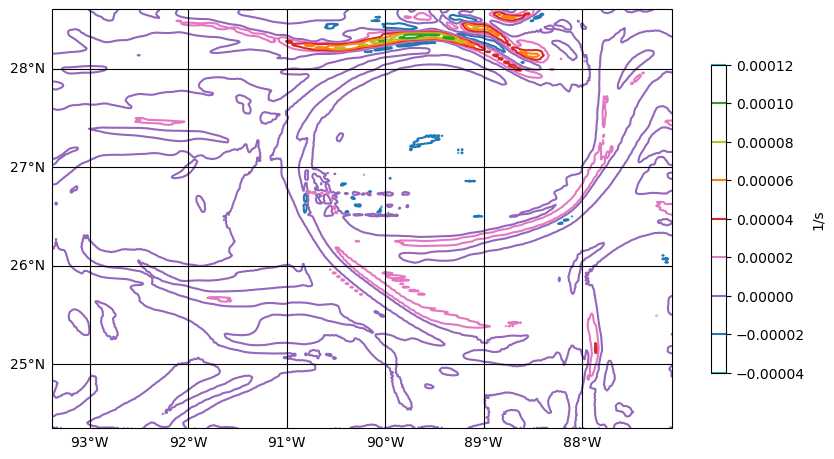

In [16]:
#metpy curl plot 
Y = WRF_lat
X = WRF_lon
U =  u25_WRF
V =  v25_WRF

bounds = [-0.00004, -0.00002, 0, 0.00002, 0.00004, 0.00006, 0.00008, 0.00010, 0.00012]

lon2D, lat2D = np.meshgrid(X, Y)
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#ax.set_extent([-90.9, -89.65, 26.45, 27.15], crs=mapcrs)
ax.coastlines()
#cs = ax.contourf(X, Y, mp_curl, transform=mapcrs, levels = bounds, colors = ['navy', 'mediumblue', 'blue','cornflowerblue', 'powderblue',
#                                                                             'teal', 'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 
#                                                                             'yellow', 'gold', 'orange', 'coral', 'red', 'maroon', 'coral', 
#'                                                                             'red', 'maroon', 'purple', 'darkviolet', 'orchid'])
#cs = ax.contourf(X, Y, mp_curl, transform=mapcrs, levels = bounds, colors = ['tab:cyan','tab:blue', 'tab:purple', 'tab:pink', 'tab:red', 'tab:orange', 'tab:olive', 'tab:green'])
cs = ax.contour(X, Y, mp_curl, transform=mapcrs, levels = bounds, colors = ['tab:cyan','tab:blue', 'tab:purple', 'tab:pink', 'tab:red', 'tab:orange', 'tab:olive', 'tab:green'])


CM=ax.get_children()[2]
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
skip = (slice(None, None, 20), slice(None, None, 20))
plt.quiver(lon2D[skip], lat2D[skip], U[skip], V[skip], color = 'white') #lon, lat, u_curent, v_current
plt.colorbar(cs, ax=ax, ticks = bounds, shrink = 0.5, label = '1/s')
gl.top_labels = False
gl.ylabels_right = False
#plt.title('Current Speed (Vector in m/s)\n& Curl (Contour in 1/s)')
#save_results_to = '/Users/Anna/Desktop/WRF/'
#plt.savefig(save_results_to + '25_Vectors.png', bbox_inches = 'tight',dpi = 150)
plt.show()


In [17]:
xlat =getvar(cur_wrfout6, "XLAT")
xlon = getvar(cur_wrfout6, "XLONG")
print(xlon.shape)

#south box
#26-26.6 N, -89.2- -90.4 W #67, 118
xlon1_south = np.where(xlon[400,:]>=-90.4) 
xlon2_south = np.where(xlon[400,:]<=-89.2)
lon_int_south = np.intersect1d(xlon1_south, xlon2_south)

xlat1_south = np.where(xlat[:,400]>=26.0)
xlat2_south = np.where(xlat[:,400]<=26.6)
lat_int_south = np.intersect1d(xlat1_south, xlat2_south)

#reshape lat lon array
south_lon = [xlon[400][x] for x in lon_int_south] 
south_lat = [xlat[x][400] for x in lat_int_south] 
print('south lon: ', np.array(south_lon).shape)
print('south lat: ', np.array(south_lat).shape)

#north box  #67, 167
#27.9-28.5 N, -89- -90.7 W
xlon1_north = np.where(xlon[400,:]>=-90.7) 
xlon2_north = np.where(xlon[400,:]<=-89.0)
lon_int_north = np.intersect1d(xlon1_north, xlon2_north)

xlat1_north = np.where(xlat[:,400]>=27.9)
xlat2_north = np.where(xlat[:,400]<=28.5)
lat_int_north = np.intersect1d(xlat1_north, xlat2_north)

#reshape lat lon array
north_lon = [xlon[400][x] for x in lon_int_north] 
north_lat = [xlat[x][400] for x in lat_int_north] 
print('north lon: ', np.array(north_lon).shape)
print('north lat: ', np.array(north_lat).shape)

(474, 639)
south lon:  (118,)
south lat:  (67,)
north lon:  (167,)
north lat:  (67,)


In [ ]:
#Make subdomains for contours

In [20]:
'''
S_curl = []
for y in lat_int_south:
    inner_arr = []
    for x in lon_int_south:
        inner_arr.append(mp_curl[y][x])
    S_curl.append(inner_arr)
S_curl = np.array(S_curl)
print('S_curl: ', S_curl.shape)

N_curl = []
for y in lat_int_north:
    inner_arr2 = []
    for x in lon_int_north:
        inner_arr2.append(mp_curl[y][x])
    N_curl.append(inner_arr2)
N_curl= np.array(N_curl) 
print('N_curl: ', N_curl.shape)
'''

"\nS_curl = []\nfor y in lat_int_south:\n    inner_arr = []\n    for x in lon_int_south:\n        inner_arr.append(mp_curl[y][x])\n    S_curl.append(inner_arr)\nS_curl = np.array(S_curl)\nprint('S_curl: ', S_curl.shape)\n\nN_curl = []\nfor y in lat_int_north:\n    inner_arr2 = []\n    for x in lon_int_north:\n        inner_arr2.append(mp_curl[y][x])\n    N_curl.append(inner_arr2)\nN_curl= np.array(N_curl) \nprint('N_curl: ', N_curl.shape)\n"

In [18]:

S_U= []
for y in lat_int_south:
    inner_arr = []
    for x in lon_int_south:
        inner_arr.append(U[y][x])
    S_U.append(inner_arr)
S_U = np.array(S_U)
print('S_U shape: ', S_U.shape)

N_U= []
for y in lat_int_north:
    inner_arr2 = []
    for x in lon_int_north:
        inner_arr2.append(U[y][x])
    N_U.append(inner_arr2)
N_U = np.array(N_U) 
print('N_U shape: ', N_U.shape)

S_V= []
for y in lat_int_south:
    inner_arr3 = []
    for x in lon_int_south:
        inner_arr3.append(V[y][x])
    S_V.append(inner_arr3)
S_V = np.array(S_V)
print('S_V shape: ', S_V.shape)

N_V= []
for y in lat_int_north:
    inner_arr4 = []
    for x in lon_int_north:
        inner_arr4.append(V[y][x])
    N_V.append(inner_arr4)
N_V = np.array(N_V) 
print('N_V shape: ', N_V.shape)

S_U shape:  (67, 118)
N_U shape:  (67, 167)
S_V shape:  (67, 118)
N_V shape:  (67, 167)


In [19]:
X= np.array(north_lon)
Y= np.array(north_lat)
#U=N_U
#V=N_V

dxdy=mpcalc.lat_lon_grid_deltas(longitude=X, latitude=Y, x_dim=- 1, y_dim=- 2, geod=None)
 
N_curl=mpcalc.vorticity(u=N_U*units('m/s'), v=N_V*units('m/s'), dx=dxdy[0], dy=dxdy[1])
print(N_curl)

[[6.0438661694226e-06 5.4839157263247395e-06 4.337422843672141e-06 ...  -1.3130351088453426e-05 -1.339964972999028e-05 -1.1906327183874941e-05] [8.456424770323043e-06 8.386938342410362e-06 7.083131685377229e-06 ...  -1.3836817165353485e-05 -1.3349044470078346e-05 -1.2682185872483988e-05] [1.0725978828764857e-05 1.0638568722113202e-05 9.40148647724148e-06 ...  -1.4380345837226188e-05 -1.3526257418534492e-05 -1.2272570620031336e-05] ... [-1.5623052149268982e-05 -1.58956604641503e-05 -1.662372085340354e-05  ... 4.666813239488875e-05 4.670134823793503e-05 4.738935294405608e-05] [-1.5946385329362954e-05 -1.6182185528596394e-05 -1.675986950177598e-05  ... 3.720178226394931e-05 3.661441746119483e-05 3.660824482204263e-05] [-1.4277565148521364e-05 -1.6195794264660352e-05 -1.6150997518188154e-05  ... 2.9776675463971615e-05 3.0107353235049204e-05 2.354627547865876e-05]] / second


In [20]:

bounds = [-0.00004, -0.00002, 0, 0.00002, 0.00004, 0.00006, 0.00008, 0.00010, 0.00012]

#lon2D, lat2D = np.meshgrid(X, Y)
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contour(X, Y, N_curl, transform=mapcrs, levels = bounds, colors = ['tab:cyan','tab:blue', 'tab:purple', 'tab:pink', 'tab:red', 'tab:orange', 'tab:olive', 'tab:green'])

CM=ax.get_children()[2]
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
#skip = (slice(None, None, 20), slice(None, None, 20))
#plt.quiver(lon2D[skip], lat2D[skip], U[skip], V[skip], color = 'white') #lon, lat, u_curent, v_current
plt.colorbar(cs, ax=ax, ticks = bounds, shrink = 0.5, label = '1/s')
gl.top_labels = False
gl.ylabels_right = False
#plt.title('Current Speed (Vector in m/s)\n& Curl (Contour in 1/s)')
#save_results_to = '/Users/Anna/Desktop/WRF/'
#plt.savefig(save_results_to + '25_Vectors.png', bbox_inches = 'tight',dpi = 150)
plt.show()

In [21]:
X2= np.array(south_lon)
Y2= np.array(south_lat)
#U2=N_U
#V2=N_V

dxdy=mpcalc.lat_lon_grid_deltas(longitude=X2, latitude=Y2, x_dim=- 1, y_dim=- 2, geod=None)
 
S_curl=mpcalc.vorticity(u=S_U*units('m/s'), v=S_V*units('m/s'), dx=dxdy[0], dy=dxdy[1])
print(S_curl)

[[-1.1356667272870751e-05 -1.1242816221363723e-05 -6.928646623509341e-06  ... 9.427031521394439e-06 9.069987097998775e-06 8.754240009654435e-06] [-8.992385778808758e-06 -5.4688753835724965e-06 -6.138354801861083e-07  ... 8.87014676660675e-06 8.863800220135774e-06 8.504148854027193e-06] [-5.154055347921442e-06 -2.2010937545630473e-07 4.8039228708998455e-06  ... 9.034483209232713e-06 8.879974253863667e-06 8.875936729634112e-06] ... [-2.175676583582634e-05 -2.098573306808264e-05 -1.9732313492456827e-05  ... -1.3536393756093026e-05 -1.3200959035693845e-05  -1.3118424623483624e-05] [-2.0243701862002195e-05 -2.0022253933831935e-05 -1.918433741922369e-05  ... -1.2853959646554286e-05 -1.2722557453745495e-05  -1.2266396242174577e-05] [-1.596932362861838e-05 -1.8360756755333996e-05 -1.919440166976694e-05  ... -1.310219571807968e-05 -1.280638306683468e-05 -1.25642136893703e-05]] / second


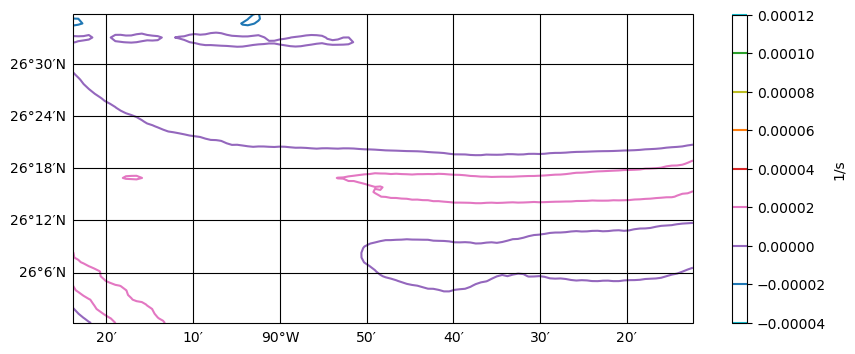

In [22]:
bounds = [-0.00004, -0.00002, 0, 0.00002, 0.00004, 0.00006, 0.00008, 0.00010, 0.00012]

#lon2D, lat2D = np.meshgrid(X2, Y2)
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contour(X2, Y2, S_curl, transform=mapcrs, levels = bounds, colors = ['tab:cyan','tab:blue', 'tab:purple', 'tab:pink', 'tab:red', 'tab:orange', 'tab:olive', 'tab:green'])

CM=ax.get_children()[2]
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
skip = (slice(None, None, 20), slice(None, None, 20))
#plt.quiver(lon2D[skip], lat2D[skip], U[skip], V[skip], color = 'white') #lon, lat, u_curent, v_current
plt.colorbar(cs, ax=ax, ticks = bounds, shrink = 0.5, label = '1/s')
gl.top_labels = False
gl.ylabels_right = False
#plt.title('Current Speed (Vector in m/s)\n& Curl (Contour in 1/s)')
#save_results_to = '/Users/Anna/Desktop/WRF/'
#plt.savefig(save_results_to + '25_Vectors.png', bbox_inches = 'tight',dpi = 150)
plt.show()

In [39]:
'''
xlat =getvar(cur_wrfout6, "XLAT")
xlon = getvar(cur_wrfout6, "XLONG")
print(xlon.shape)

#south box
#26-26.6 N, -89.2- -90.4 W #67, 118
xlon1_south = np.where(xlon[400,:]>=-90.4) 
xlon2_south = np.where(xlon[400,:]<=-89.2)
lon_int_south = np.intersect1d(xlon1_south, xlon2_south)

xlat1_south = np.where(xlat[:,400]>=26.0)
xlat2_south = np.where(xlat[:,400]<=26.6)
lat_int_south = np.intersect1d(xlat1_south, xlat2_south)

#reshape lat lon array
south_lon = [xlon[400][x] for x in lon_int_south] 
south_lat = [xlat[x][400] for x in lat_int_south] 
print('south lon: ', np.array(south_lon).shape)
print('south lat: ', np.array(south_lat).shape)

#north box  #67, 167
#27.9-28.5 N, -89- -90.7 W
xlon1_north = np.where(xlon[400,:]>=-90.7) 
xlon2_north = np.where(xlon[400,:]<=-89.0)
lon_int_north = np.intersect1d(xlon1_north, xlon2_north)

xlat1_north = np.where(xlat[:,400]>=27.9)
xlat2_north = np.where(xlat[:,400]<=28.5)
lat_int_north = np.intersect1d(xlat1_north, xlat2_north)

#reshape lat lon array
north_lon = [xlon[400][x] for x in lon_int_north] 
north_lat = [xlat[x][400] for x in lat_int_north] 
print('north lon: ', np.array(north_lon).shape)
print('north lat: ', np.array(north_lat).shape)
'''

(474, 639)
south lon:  (118,)
south lat:  (67,)
north lon:  (167,)
north lat:  (67,)


In [23]:
#Get PBLH
#Not staggered
cur_pblh_6 = getvar(cur_wrfout6, "PBLH")
#cur_pblh_7 = getvar(cur_wrfout7, "PBLH")
#cur_pblh_8 = getvar(cur_wrfout8,"PBLH")
#cur_pblh_9 = getvar(cur_wrfout9, "PBLH")
cur_pblh_10 = getvar(cur_wrfout10, "PBLH")
cur_pblh_11 = getvar(cur_wrfout11, "PBLH")
cur_pblh_12 = getvar(cur_wrfout12, "PBLH")
cur_pblh_13 = getvar(cur_wrfout13, "PBLH")
#cur_pblh_14 = getvar(cur_wrfout14, "PBLH")
#cur_pblh_15 = getvar(cur_wrfout15, "PBLH")
#cur_pblh_16 = getvar(cur_wrfout16,"PBLH")
#cur_pblh_17 = getvar(cur_wrfout17, "PBLH")
#cur_pblh_18 = getvar(cur_wrfout18, "PBLH")
#cur_pblh_19 = getvar(cur_wrfout19, "PBLH")
#cur_pblh_20 = getvar(cur_wrfout20, "PBLH")
#cur_pblh_21 = getvar(cur_wrfout21, "PBLH")
#cur_pblh_22 = getvar(cur_wrfout22, "PBLH")
#cur_pblh_23 = getvar(cur_wrfout23, "PBLH")
#cur_pblh_24 = getvar(cur_wrfout24, "PBLH")

sst_pblh_6 = getvar(sst_wrfout6, "PBLH")
#sst_pblh_7 = getvar(sst_wrfout7, "PBLH")
#sst_pblh_8 = getvar(sst_wrfout8,"PBLH")
#sst_pblh_9 = getvar(sst_wrfout9, "PBLH")
sst_pblh_10 = getvar(sst_wrfout10, "PBLH")
sst_pblh_11 = getvar(sst_wrfout11, "PBLH")
sst_pblh_12 = getvar(sst_wrfout12, "PBLH")
sst_pblh_13 = getvar(sst_wrfout13, "PBLH")
#sst_pblh_14 = getvar(sst_wrfout14, "PBLH")
#sst_pblh_15 = getvar(sst_wrfout15, "PBLH")
#sst_pblh_16 = getvar(sst_wrfout16,"PBLH")
#sst_pblh_17 = getvar(sst_wrfout17, "PBLH")
#sst_pblh_18 = getvar(sst_wrfout18, "PBLH")
#sst_pblh_19 = getvar(sst_wrfout19, "PBLH")
#sst_pblh_20 = getvar(sst_wrfout20, "PBLH")
#sst_pblh_21 = getvar(sst_wrfout21, "PBLH")
#sst_pblh_22 = getvar(sst_wrfout22, "PBLH")
#sst_pblh_23 = getvar(sst_wrfout23, "PBLH")
#sst_pblh_24 = getvar(sst_wrfout24, "PBLH")
'''
#Get U
cur_U_10 = getvar(cur_wrfout10, "U")
cur_U_11 = getvar(cur_wrfout11, "U")
cur_U_12 = getvar(cur_wrfout12, "U")
cur_U_13 = getvar(cur_wrfout13, "U")
cur_U_10 = wrf.destagger(cur_U_10, stagger_dim = 2)
cur_U_11  = wrf.destagger(cur_U_11, stagger_dim = 2)
cur_U_12 = wrf.destagger(cur_U_12, stagger_dim = 2)
cur_U_13  = wrf.destagger(cur_U_13, stagger_dim = 2)

cur_U10_10 = getvar(cur_wrfout10, "U10")
cur_U10_11 = getvar(cur_wrfout11, "U10")
cur_U10_12 = getvar(cur_wrfout12, "U10")
cur_U10_13 = getvar(cur_wrfout13, "U10")

sst_U_10 = getvar(sst_wrfout10, "U")
sst_U_11 = getvar(sst_wrfout11, "U")
sst_U_12 = getvar(sst_wrfout12, "U")
sst_U_13 = getvar(sst_wrfout13, "U")
sst_U_10 = wrf.destagger(sst_U_10, stagger_dim = 2)
sst_U_11  = wrf.destagger(sst_U_11, stagger_dim = 2)
sst_U_12 = wrf.destagger(sst_U_12, stagger_dim = 2)
sst_U_13  = wrf.destagger(sst_U_13, stagger_dim = 2)

sst_U10_10 = getvar(sst_wrfout10, "U10")
sst_U10_11 = getvar(sst_wrfout11, "U10")
sst_U10_12 = getvar(sst_wrfout12, "U10")
sst_U10_13 = getvar(sst_wrfout13, "U10")

cur_V_10 = getvar(cur_wrfout10, "V")
cur_V_11 = getvar(cur_wrfout11, "V")
cur_V_12 = getvar(cur_wrfout12, "V")
cur_V_13 = getvar(cur_wrfout13, "V")
cur_V_10 = wrf.destagger(cur_V_10, stagger_dim = 1)
cur_V_11  = wrf.destagger(cur_V_11, stagger_dim = 1)
cur_V_12 = wrf.destagger(cur_V_12, stagger_dim = 1)
cur_V_13  = wrf.destagger(cur_V_13, stagger_dim = 1)

cur_V10_10 = getvar(cur_wrfout10, "V10")
cur_V10_11 = getvar(cur_wrfout11, "V10")
cur_V10_12 = getvar(cur_wrfout12, "V10")
cur_V10_13 = getvar(cur_wrfout13, "V10")

sst_V_10 = getvar(sst_wrfout10, "V")
sst_V_11 = getvar(sst_wrfout11, "V")
sst_V_12 = getvar(sst_wrfout12, "V")
sst_V_13 = getvar(sst_wrfout13, "V")
sst_V_10 = wrf.destagger(sst_V_10, stagger_dim = 1)
sst_V_11  = wrf.destagger(sst_V_11, stagger_dim = 1)
sst_V_12 = wrf.destagger(sst_V_12, stagger_dim = 1)
sst_V_13  = wrf.destagger(sst_V_13, stagger_dim = 1)

sst_V10_10 = getvar(sst_wrfout10, "V10")
sst_V10_11 = getvar(sst_wrfout11, "V10")
sst_V10_12 = getvar(sst_wrfout12, "V10")
sst_V10_13 = getvar(sst_wrfout13, "V10")
'''

'\n#Get U\ncur_U_10 = getvar(cur_wrfout10, "U")\ncur_U_11 = getvar(cur_wrfout11, "U")\ncur_U_12 = getvar(cur_wrfout12, "U")\ncur_U_13 = getvar(cur_wrfout13, "U")\ncur_U_10 = wrf.destagger(cur_U_10, stagger_dim = 2)\ncur_U_11  = wrf.destagger(cur_U_11, stagger_dim = 2)\ncur_U_12 = wrf.destagger(cur_U_12, stagger_dim = 2)\ncur_U_13  = wrf.destagger(cur_U_13, stagger_dim = 2)\n\ncur_U10_10 = getvar(cur_wrfout10, "U10")\ncur_U10_11 = getvar(cur_wrfout11, "U10")\ncur_U10_12 = getvar(cur_wrfout12, "U10")\ncur_U10_13 = getvar(cur_wrfout13, "U10")\n\nsst_U_10 = getvar(sst_wrfout10, "U")\nsst_U_11 = getvar(sst_wrfout11, "U")\nsst_U_12 = getvar(sst_wrfout12, "U")\nsst_U_13 = getvar(sst_wrfout13, "U")\nsst_U_10 = wrf.destagger(sst_U_10, stagger_dim = 2)\nsst_U_11  = wrf.destagger(sst_U_11, stagger_dim = 2)\nsst_U_12 = wrf.destagger(sst_U_12, stagger_dim = 2)\nsst_U_13  = wrf.destagger(sst_U_13, stagger_dim = 2)\n\nsst_U10_10 = getvar(sst_wrfout10, "U10")\nsst_U10_11 = getvar(sst_wrfout11, "U10")\

In [24]:
#get PBLH SST on new domains
'''
south_sst_pblh7 = []
for y in lat_int_south:
    inner_arr_sst7 = []
    for x in lon_int_south:
        inner_arr_sst7.append(sst_pblh_7[y][x])
    south_sst_pblh7.append(inner_arr_sst7)
south_sst_pblh7 = np.array(south_sst_pblh7)

north_sst_pblh7 = []
for y in lat_int_north:
    inner_arr_sst7 = []
    for x in lon_int_north:
        inner_arr_sst7.append(sst_pblh_7[y][x])
    north_sst_pblh7.append(inner_arr_sst7)
north_sst_pblh7 = np.array(north_sst_pblh7) 

south_sst_pblh8 = []
for y in lat_int_south:
    inner_arr_sst8 = []
    for x in lon_int_south:
        inner_arr_sst8.append(sst_pblh_8[y][x])
    south_sst_pblh8.append(inner_arr_sst8)
south_sst_pblh8 = np.array(south_sst_pblh8)
print('south sst pblh8 shape: ', south_sst_pblh8.shape)

north_sst_pblh8 = []
for y in lat_int_north:
    inner_arr_sst8 = []
    for x in lon_int_north:
        inner_arr_sst8.append(sst_pblh_8[y][x])
    north_sst_pblh8.append(inner_arr_sst8)
north_sst_pblh8 = np.array(north_sst_pblh8) 
print('north sst pblh8 shape: ', north_sst_pblh8.shape)

south_sst_pblh9 = []
for y in lat_int_south:
    inner_arr_sst9 = []
    for x in lon_int_south:
        inner_arr_sst9.append(sst_pblh_9[y][x])
    south_sst_pblh9.append(inner_arr_sst9)
south_sst_pblh9 = np.array(south_sst_pblh9)

north_sst_pblh9 = []
for y in lat_int_north:
    inner_arr_sst9 = []
    for x in lon_int_north:
        inner_arr_sst9.append(sst_pblh_9[y][x])
    north_sst_pblh9.append(inner_arr_sst9)
north_sst_pblh9 = np.array(north_sst_pblh9) 
'''
south_sst_pblh10 = []
for y in lat_int_south:
    inner_arr_sst10 = []
    for x in lon_int_south:
        inner_arr_sst10.append(sst_pblh_10[y][x])
    south_sst_pblh10.append(inner_arr_sst10)
south_sst_pblh10 = np.array(south_sst_pblh10)
print('south sst pblh10 shape: ', south_sst_pblh10.shape)

north_sst_pblh10 = []
for y in lat_int_north:
    inner_arr_sst10 = []
    for x in lon_int_north:
        inner_arr_sst10.append(sst_pblh_10[y][x])
    north_sst_pblh10.append(inner_arr_sst10)
north_sst_pblh10 = np.array(north_sst_pblh10) 
print('north sst pblh10 shape: ', north_sst_pblh10.shape)

south_sst_pblh11 = []
for y in lat_int_south:
    inner_arr_sst11 = []
    for x in lon_int_south:
        inner_arr_sst11.append(sst_pblh_11[y][x])
    south_sst_pblh11.append(inner_arr_sst11)
south_sst_pblh11 = np.array(south_sst_pblh11)

north_sst_pblh11 = []
for y in lat_int_north:
    inner_arr_sst11 = []
    for x in lon_int_north:
        inner_arr_sst11.append(sst_pblh_11[y][x])
    north_sst_pblh11.append(inner_arr_sst11)
north_sst_pblh11 = np.array(north_sst_pblh11) 

south_sst_pblh12 = []
for y in lat_int_south:
    inner_arr_sst12 = []
    for x in lon_int_south:
        inner_arr_sst12.append(sst_pblh_12[y][x])
    south_sst_pblh12.append(inner_arr_sst12)
south_sst_pblh12 = np.array(south_sst_pblh12)
print('south sst pblh12 shape: ', south_sst_pblh12.shape)

north_sst_pblh12 = []
for y in lat_int_north:
    inner_arr_sst12 = []
    for x in lon_int_north:
        inner_arr_sst12.append(sst_pblh_12[y][x])
    north_sst_pblh12.append(inner_arr_sst12)
north_sst_pblh12 = np.array(north_sst_pblh12) 
print('north sst pblh12 shape: ', north_sst_pblh12.shape)

south_sst_pblh13 = []
for y in lat_int_south:
    inner_arr_sst13 = []
    for x in lon_int_south:
        inner_arr_sst13.append(sst_pblh_13[y][x])
    south_sst_pblh13.append(inner_arr_sst13)
south_sst_pblh13 = np.array(south_sst_pblh13)

north_sst_pblh13 = []
for y in lat_int_north:
    inner_arr_sst13 = []
    for x in lon_int_north:
        inner_arr_sst13.append(sst_pblh_13[y][x])
    north_sst_pblh13.append(inner_arr_sst13)
north_sst_pblh13 = np.array(north_sst_pblh13) 
'''
south_sst_pblh14 = []
for y in lat_int_south:
    inner_arr_sst14 = []
    for x in lon_int_south:
        inner_arr_sst14.append(sst_pblh_14[y][x])
    south_sst_pblh14.append(inner_arr_sst14)
south_sst_pblh14 = np.array(south_sst_pblh14)
print('south sst pblh14 shape: ', south_sst_pblh14.shape)

north_sst_pblh14 = []
for y in lat_int_north:
    inner_arr_sst14 = []
    for x in lon_int_north:
        inner_arr_sst14.append(sst_pblh_14[y][x])
    north_sst_pblh14.append(inner_arr_sst14)
north_sst_pblh14 = np.array(north_sst_pblh14) 
print('north sst pblh14 shape: ', north_sst_pblh14.shape)

south_sst_pblh15 = []
for y in lat_int_south:
    inner_arr_sst15 = []
    for x in lon_int_south:
        inner_arr_sst15.append(sst_pblh_15[y][x])
    south_sst_pblh15.append(inner_arr_sst15)
south_sst_pblh15 = np.array(south_sst_pblh15)

north_sst_pblh15 = []
for y in lat_int_north:
    inner_arr_sst15 = []
    for x in lon_int_north:
        inner_arr_sst15.append(sst_pblh_15[y][x])
    north_sst_pblh15.append(inner_arr_sst15)
north_sst_pblh15 = np.array(north_sst_pblh15) 

south_sst_pblh16 = []
for y in lat_int_south:
    inner_arr_sst16 = []
    for x in lon_int_south:
        inner_arr_sst16.append(sst_pblh_16[y][x])
    south_sst_pblh16.append(inner_arr_sst16)
south_sst_pblh16 = np.array(south_sst_pblh16)
print('south sst pblh16 shape: ', south_sst_pblh16.shape)

north_sst_pblh16 = []
for y in lat_int_north:
    inner_arr_sst16 = []
    for x in lon_int_north:
        inner_arr_sst16.append(sst_pblh_16[y][x])
    north_sst_pblh16.append(inner_arr_sst16)
north_sst_pblh16 = np.array(north_sst_pblh16) 
print('north sst pblh16 shape: ', north_sst_pblh16.shape)

south_sst_pblh17 = []
for y in lat_int_south:
    inner_arr_sst17 = []
    for x in lon_int_south:
        inner_arr_sst17.append(sst_pblh_17[y][x])
    south_sst_pblh17.append(inner_arr_sst17)
south_sst_pblh17 = np.array(south_sst_pblh17)

north_sst_pblh17 = []
for y in lat_int_north:
    inner_arr_sst17 = []
    for x in lon_int_north:
        inner_arr_sst17.append(sst_pblh_17[y][x])
    north_sst_pblh17.append(inner_arr_sst17)
north_sst_pblh17 = np.array(north_sst_pblh17) 

south_sst_pblh18 = []
for y in lat_int_south:
    inner_arr_sst18 = []
    for x in lon_int_south:
        inner_arr_sst18.append(sst_pblh_18[y][x])
    south_sst_pblh18.append(inner_arr_sst18)
south_sst_pblh18 = np.array(south_sst_pblh18)
print('south sst pblh18 shape: ', south_sst_pblh18.shape)

north_sst_pblh18 = []
for y in lat_int_north:
    inner_arr_sst18 = []
    for x in lon_int_north:
        inner_arr_sst18.append(sst_pblh_18[y][x])
    north_sst_pblh18.append(inner_arr_sst18)
north_sst_pblh18 = np.array(north_sst_pblh18) 
print('north sst pblh18 shape: ', north_sst_pblh18.shape)

south_sst_pblh19 = []
for y in lat_int_south:
    inner_arr_sst19 = []
    for x in lon_int_south:
        inner_arr_sst19.append(sst_pblh_19[y][x])
    south_sst_pblh19.append(inner_arr_sst19)
south_sst_pblh19 = np.array(south_sst_pblh19)

north_sst_pblh19 = []
for y in lat_int_north:
    inner_arr_sst19 = []
    for x in lon_int_north:
        inner_arr_sst19.append(sst_pblh_19[y][x])
    north_sst_pblh19.append(inner_arr_sst19)
north_sst_pblh19 = np.array(north_sst_pblh19) 

south_sst_pblh20 = []
for y in lat_int_south:
    inner_arr_sst20 = []
    for x in lon_int_south:
        inner_arr_sst20.append(sst_pblh_20[y][x])
    south_sst_pblh20.append(inner_arr_sst20)
south_sst_pblh20 = np.array(south_sst_pblh20)
print('south sst pblh20 shape: ', south_sst_pblh20.shape)

north_sst_pblh20 = []
for y in lat_int_north:
    inner_arr_sst20 = []
    for x in lon_int_north:
        inner_arr_sst20.append(sst_pblh_20[y][x])
    north_sst_pblh20.append(inner_arr_sst20)
north_sst_pblh20 = np.array(north_sst_pblh20) 
print('north sst pblh20 shape: ', north_sst_pblh20.shape)

south_sst_pblh21 = []
for y in lat_int_south:
    inner_arr_sst21 = []
    for x in lon_int_south:
        inner_arr_sst21.append(sst_pblh_21[y][x])
    south_sst_pblh21.append(inner_arr_sst21)
south_sst_pblh21 = np.array(south_sst_pblh21)

north_sst_pblh21 = []
for y in lat_int_north:
    inner_arr_sst21 = []
    for x in lon_int_north:
        inner_arr_sst21.append(sst_pblh_21[y][x])
    north_sst_pblh21.append(inner_arr_sst21)
north_sst_pblh21 = np.array(north_sst_pblh21) 

south_sst_pblh22 = []
for y in lat_int_south:
    inner_arr_sst22 = []
    for x in lon_int_south:
        inner_arr_sst22.append(sst_pblh_22[y][x])
    south_sst_pblh22.append(inner_arr_sst22)
south_sst_pblh22 = np.array(south_sst_pblh22)
print('south sst pblh22 shape: ', south_sst_pblh22.shape)

north_sst_pblh22 = []
for y in lat_int_north:
    inner_arr_sst22 = []
    for x in lon_int_north:
        inner_arr_sst22.append(sst_pblh_22[y][x])
    north_sst_pblh22.append(inner_arr_sst22)
north_sst_pblh22 = np.array(north_sst_pblh22) 
print('north sst pblh22 shape: ', north_sst_pblh22.shape)

south_sst_pblh23 = []
for y in lat_int_south:
    inner_arr_sst23 = []
    for x in lon_int_south:
        inner_arr_sst23.append(sst_pblh_23[y][x])
    south_sst_pblh23.append(inner_arr_sst23)
south_sst_pblh23 = np.array(south_sst_pblh23)

north_sst_pblh23 = []
for y in lat_int_north:
    inner_arr_sst23 = []
    for x in lon_int_north:
        inner_arr_sst23.append(sst_pblh_23[y][x])
    north_sst_pblh23.append(inner_arr_sst23)
north_sst_pblh23 = np.array(north_sst_pblh23) 

south_sst_pblh24 = []
for y in lat_int_south:
    inner_arr_sst24 = []
    for x in lon_int_south:
        inner_arr_sst24.append(sst_pblh_24[y][x])
    south_sst_pblh24.append(inner_arr_sst24)
south_sst_pblh24 = np.array(south_sst_pblh24)
print('south sst pblh24 shape: ', south_sst_pblh24.shape)

north_sst_pblh24 = []
for y in lat_int_north:
    inner_arr_sst24 = []
    for x in lon_int_north:
        inner_arr_sst24.append(sst_pblh_24[y][x])
    north_sst_pblh24.append(inner_arr_sst24)
north_sst_pblh24 = np.array(north_sst_pblh24) 
print('north sst pblh24 shape: ', north_sst_pblh24.shape)
'''


south sst pblh10 shape:  (67, 118)
north sst pblh10 shape:  (67, 167)
south sst pblh12 shape:  (67, 118)
north sst pblh12 shape:  (67, 167)


"\nsouth_sst_pblh14 = []\nfor y in lat_int_south:\n    inner_arr_sst14 = []\n    for x in lon_int_south:\n        inner_arr_sst14.append(sst_pblh_14[y][x])\n    south_sst_pblh14.append(inner_arr_sst14)\nsouth_sst_pblh14 = np.array(south_sst_pblh14)\nprint('south sst pblh14 shape: ', south_sst_pblh14.shape)\n\nnorth_sst_pblh14 = []\nfor y in lat_int_north:\n    inner_arr_sst14 = []\n    for x in lon_int_north:\n        inner_arr_sst14.append(sst_pblh_14[y][x])\n    north_sst_pblh14.append(inner_arr_sst14)\nnorth_sst_pblh14 = np.array(north_sst_pblh14) \nprint('north sst pblh14 shape: ', north_sst_pblh14.shape)\n\nsouth_sst_pblh15 = []\nfor y in lat_int_south:\n    inner_arr_sst15 = []\n    for x in lon_int_south:\n        inner_arr_sst15.append(sst_pblh_15[y][x])\n    south_sst_pblh15.append(inner_arr_sst15)\nsouth_sst_pblh15 = np.array(south_sst_pblh15)\n\nnorth_sst_pblh15 = []\nfor y in lat_int_north:\n    inner_arr_sst15 = []\n    for x in lon_int_north:\n        inner_arr_sst15.appe

In [25]:
#get PBLH  CUR on new domain
'''
south_cur_pblh7 = []
for y in lat_int_south:
    inner_arr_cur7 = []
    for x in lon_int_south:
        inner_arr_cur7.append(cur_pblh_7[y][x])
    south_cur_pblh7.append(inner_arr_cur7)
south_cur_pblh7 = np.array(south_cur_pblh7)

north_cur_pblh7 = []
for y in lat_int_north:
    inner_arr_cur7 = []
    for x in lon_int_north:
        inner_arr_cur7.append(cur_pblh_7[y][x])
    north_cur_pblh7.append(inner_arr_cur7)
north_cur_pblh7 = np.array(north_cur_pblh7) 

south_cur_pblh8 = []
for y in lat_int_south:
    inner_arr_cur8 = []
    for x in lon_int_south:
        inner_arr_cur8.append(cur_pblh_8[y][x])
    south_cur_pblh8.append(inner_arr_cur8)
south_cur_pblh8 = np.array(south_cur_pblh8)
print('south cur pblh8 shape: ', south_cur_pblh8.shape)

north_cur_pblh8 = []
for y in lat_int_north:
    inner_arr_cur8 = []
    for x in lon_int_north:
        inner_arr_cur8.append(cur_pblh_8[y][x])
    north_cur_pblh8.append(inner_arr_cur8)
north_cur_pblh8 = np.array(north_cur_pblh8) 
print('north cur pblh8 shape: ', north_cur_pblh8.shape)

south_cur_pblh9 = []
for y in lat_int_south:
    inner_arr_cur9 = []
    for x in lon_int_south:
        inner_arr_cur9.append(cur_pblh_9[y][x])
    south_cur_pblh9.append(inner_arr_cur9)
south_cur_pblh9 = np.array(south_cur_pblh9)

north_cur_pblh9 = []
for y in lat_int_north:
    inner_arr_cur9 = []
    for x in lon_int_north:
        inner_arr_cur9.append(cur_pblh_9[y][x])
    north_cur_pblh9.append(inner_arr_cur9)
north_cur_pblh9 = np.array(north_cur_pblh9) 
'''
south_cur_pblh10 = []
for y in lat_int_south:
    inner_arr_cur10 = []
    for x in lon_int_south:
        inner_arr_cur10.append(cur_pblh_10[y][x])
    south_cur_pblh10.append(inner_arr_cur10)
south_cur_pblh10 = np.array(south_cur_pblh10)
print('south cur pblh10 shape: ', south_cur_pblh10.shape)

north_cur_pblh10 = []
for y in lat_int_north:
    inner_arr_cur10 = []
    for x in lon_int_north:
        inner_arr_cur10.append(cur_pblh_10[y][x])
    north_cur_pblh10.append(inner_arr_cur10)
north_cur_pblh10 = np.array(north_cur_pblh10) 
print('north cur pblh10 shape: ', north_cur_pblh10.shape)

south_cur_pblh11 = []
for y in lat_int_south:
    inner_arr_cur11 = []
    for x in lon_int_south:
        inner_arr_cur11.append(cur_pblh_11[y][x])
    south_cur_pblh11.append(inner_arr_cur11)
south_cur_pblh11 = np.array(south_cur_pblh11)

north_cur_pblh11 = []
for y in lat_int_north:
    inner_arr_cur11 = []
    for x in lon_int_north:
        inner_arr_cur11.append(cur_pblh_11[y][x])
    north_cur_pblh11.append(inner_arr_cur11)
north_cur_pblh11 = np.array(north_cur_pblh11) 

south_cur_pblh12 = []
for y in lat_int_south:
    inner_arr_cur12 = []
    for x in lon_int_south:
        inner_arr_cur12.append(cur_pblh_12[y][x])
    south_cur_pblh12.append(inner_arr_cur12)
south_cur_pblh12 = np.array(south_cur_pblh12)
print('south cur pblh12 shape: ', south_cur_pblh12.shape)

north_cur_pblh12 = []
for y in lat_int_north:
    inner_arr_cur12 = []
    for x in lon_int_north:
        inner_arr_cur12.append(cur_pblh_12[y][x])
    north_cur_pblh12.append(inner_arr_cur12)
north_cur_pblh12 = np.array(north_cur_pblh12) 
print('north cur pblh12 shape: ', north_cur_pblh12.shape)

south_cur_pblh13 = []
for y in lat_int_south:
    inner_arr_cur13 = []
    for x in lon_int_south:
        inner_arr_cur13.append(cur_pblh_13[y][x])
    south_cur_pblh13.append(inner_arr_cur13)
south_cur_pblh13 = np.array(south_cur_pblh13)

north_cur_pblh13 = []
for y in lat_int_north:
    inner_arr_cur13 = []
    for x in lon_int_north:
        inner_arr_cur13.append(cur_pblh_13[y][x])
    north_cur_pblh13.append(inner_arr_cur13)
north_cur_pblh13 = np.array(north_cur_pblh13) 
'''
south_cur_pblh14 = []
for y in lat_int_south:
    inner_arr_cur14 = []
    for x in lon_int_south:
        inner_arr_cur14.append(cur_pblh_14[y][x])
    south_cur_pblh14.append(inner_arr_cur14)
south_cur_pblh14 = np.array(south_cur_pblh14)
print('south cur pblh14 shape: ', south_cur_pblh14.shape)

north_cur_pblh14 = []
for y in lat_int_north:
    inner_arr_cur14 = []
    for x in lon_int_north:
        inner_arr_cur14.append(cur_pblh_14[y][x])
    north_cur_pblh14.append(inner_arr_cur14)
north_cur_pblh14 = np.array(north_cur_pblh14) 
print('north cur pblh14 shape: ', north_cur_pblh14.shape)

south_cur_pblh15 = []
for y in lat_int_south:
    inner_arr_cur15 = []
    for x in lon_int_south:
        inner_arr_cur15.append(cur_pblh_15[y][x])
    south_cur_pblh15.append(inner_arr_cur15)
south_cur_pblh15 = np.array(south_cur_pblh15)

north_cur_pblh15 = []
for y in lat_int_north:
    inner_arr_cur15 = []
    for x in lon_int_north:
        inner_arr_cur15.append(cur_pblh_15[y][x])
    north_cur_pblh15.append(inner_arr_cur15)
north_cur_pblh15 = np.array(north_cur_pblh15) 

south_cur_pblh16 = []
for y in lat_int_south:
    inner_arr_cur16 = []
    for x in lon_int_south:
        inner_arr_cur16.append(cur_pblh_16[y][x])
    south_cur_pblh16.append(inner_arr_cur16)
south_cur_pblh16 = np.array(south_cur_pblh16)
print('south cur pblh16 shape: ', south_cur_pblh16.shape)

north_cur_pblh16 = []
for y in lat_int_north:
    inner_arr_cur16 = []
    for x in lon_int_north:
        inner_arr_cur16.append(cur_pblh_16[y][x])
    north_cur_pblh16.append(inner_arr_cur16)
north_cur_pblh16 = np.array(north_cur_pblh16) 
print('north cur pblh16 shape: ', north_cur_pblh16.shape)

south_cur_pblh17 = []
for y in lat_int_south:
    inner_arr_cur17 = []
    for x in lon_int_south:
        inner_arr_cur17.append(cur_pblh_17[y][x])
    south_cur_pblh17.append(inner_arr_cur17)
south_cur_pblh17 = np.array(south_cur_pblh17)

north_cur_pblh17 = []
for y in lat_int_north:
    inner_arr_cur17 = []
    for x in lon_int_north:
        inner_arr_cur17.append(cur_pblh_17[y][x])
    north_cur_pblh17.append(inner_arr_cur17)
north_cur_pblh17 = np.array(north_cur_pblh17) 

south_cur_pblh18 = []
for y in lat_int_south:
    inner_arr_cur18 = []
    for x in lon_int_south:
        inner_arr_cur18.append(cur_pblh_18[y][x])
    south_cur_pblh18.append(inner_arr_cur18)
south_cur_pblh18 = np.array(south_cur_pblh18)
print('south cur pblh18 shape: ', south_cur_pblh18.shape)

north_cur_pblh18 = []
for y in lat_int_north:
    inner_arr_cur18 = []
    for x in lon_int_north:
        inner_arr_cur18.append(cur_pblh_18[y][x])
    north_cur_pblh18.append(inner_arr_cur18)
north_cur_pblh18 = np.array(north_cur_pblh18) 
print('north cur pblh18 shape: ', north_cur_pblh18.shape)

south_cur_pblh19 = []
for y in lat_int_south:
    inner_arr_cur19 = []
    for x in lon_int_south:
        inner_arr_cur19.append(cur_pblh_19[y][x])
    south_cur_pblh19.append(inner_arr_cur19)
south_cur_pblh19 = np.array(south_cur_pblh19)

north_cur_pblh19 = []
for y in lat_int_north:
    inner_arr_cur19 = []
    for x in lon_int_north:
        inner_arr_cur19.append(cur_pblh_19[y][x])
    north_cur_pblh19.append(inner_arr_cur19)
north_cur_pblh19 = np.array(north_cur_pblh19) 

south_cur_pblh20 = []
for y in lat_int_south:
    inner_arr_cur20 = []
    for x in lon_int_south:
        inner_arr_cur20.append(cur_pblh_20[y][x])
    south_cur_pblh20.append(inner_arr_cur20)
south_cur_pblh20 = np.array(south_cur_pblh20)
print('south cur pblh20 shape: ', south_cur_pblh20.shape)

north_cur_pblh20 = []
for y in lat_int_north:
    inner_arr_cur20 = []
    for x in lon_int_north:
        inner_arr_cur20.append(cur_pblh_20[y][x])
    north_cur_pblh20.append(inner_arr_cur20)
north_cur_pblh20 = np.array(north_cur_pblh20) 
print('north cur pblh20 shape: ', north_cur_pblh20.shape)

south_cur_pblh21 = []
for y in lat_int_south:
    inner_arr_cur21 = []
    for x in lon_int_south:
        inner_arr_cur21.append(cur_pblh_21[y][x])
    south_cur_pblh21.append(inner_arr_cur21)
south_cur_pblh21 = np.array(south_cur_pblh21)

north_cur_pblh21 = []
for y in lat_int_north:
    inner_arr_cur21 = []
    for x in lon_int_north:
        inner_arr_cur21.append(cur_pblh_21[y][x])
    north_cur_pblh21.append(inner_arr_cur21)
north_cur_pblh21 = np.array(north_cur_pblh21) 

south_cur_pblh22 = []
for y in lat_int_south:
    inner_arr_cur22 = []
    for x in lon_int_south:
        inner_arr_cur22.append(cur_pblh_22[y][x])
    south_cur_pblh22.append(inner_arr_cur22)
south_cur_pblh22 = np.array(south_cur_pblh22)
print('south cur pblh22 shape: ', south_cur_pblh22.shape)

north_cur_pblh22 = []
for y in lat_int_north:
    inner_arr_cur22 = []
    for x in lon_int_north:
        inner_arr_cur22.append(cur_pblh_22[y][x])
    north_cur_pblh22.append(inner_arr_cur22)
north_cur_pblh22 = np.array(north_cur_pblh22) 
print('north cur pblh22 shape: ', north_cur_pblh22.shape)

south_cur_pblh23 = []
for y in lat_int_south:
    inner_arr_cur23 = []
    for x in lon_int_south:
        inner_arr_cur23.append(cur_pblh_23[y][x])
    south_cur_pblh23.append(inner_arr_cur23)
south_cur_pblh23 = np.array(south_cur_pblh23)

north_cur_pblh23 = []
for y in lat_int_north:
    inner_arr_cur23 = []
    for x in lon_int_north:
        inner_arr_cur23.append(cur_pblh_23[y][x])
    north_cur_pblh23.append(inner_arr_cur23)
north_cur_pblh23 = np.array(north_cur_pblh23) 

south_cur_pblh24 = []
for y in lat_int_south:
    inner_arr_cur24 = []
    for x in lon_int_south:
        inner_arr_cur24.append(cur_pblh_24[y][x])
    south_cur_pblh24.append(inner_arr_cur24)
south_cur_pblh24 = np.array(south_cur_pblh24)
print('south cur pblh24 shape: ', south_cur_pblh24.shape)

north_cur_pblh24 = []
for y in lat_int_north:
    inner_arr_cur24 = []
    for x in lon_int_north:
        inner_arr_cur24.append(cur_pblh_24[y][x])
    north_cur_pblh24.append(inner_arr_cur24)
north_cur_pblh24 = np.array(north_cur_pblh24) 
print('north cur pblh24 shape: ', north_cur_pblh24.shape)
'''

south cur pblh10 shape:  (67, 118)
north cur pblh10 shape:  (67, 167)
south cur pblh12 shape:  (67, 118)
north cur pblh12 shape:  (67, 167)


"\nsouth_cur_pblh14 = []\nfor y in lat_int_south:\n    inner_arr_cur14 = []\n    for x in lon_int_south:\n        inner_arr_cur14.append(cur_pblh_14[y][x])\n    south_cur_pblh14.append(inner_arr_cur14)\nsouth_cur_pblh14 = np.array(south_cur_pblh14)\nprint('south cur pblh14 shape: ', south_cur_pblh14.shape)\n\nnorth_cur_pblh14 = []\nfor y in lat_int_north:\n    inner_arr_cur14 = []\n    for x in lon_int_north:\n        inner_arr_cur14.append(cur_pblh_14[y][x])\n    north_cur_pblh14.append(inner_arr_cur14)\nnorth_cur_pblh14 = np.array(north_cur_pblh14) \nprint('north cur pblh14 shape: ', north_cur_pblh14.shape)\n\nsouth_cur_pblh15 = []\nfor y in lat_int_south:\n    inner_arr_cur15 = []\n    for x in lon_int_south:\n        inner_arr_cur15.append(cur_pblh_15[y][x])\n    south_cur_pblh15.append(inner_arr_cur15)\nsouth_cur_pblh15 = np.array(south_cur_pblh15)\n\nnorth_cur_pblh15 = []\nfor y in lat_int_north:\n    inner_arr_cur15 = []\n    for x in lon_int_north:\n        inner_arr_cur15.appe

In [26]:

#PBLH avg

sst_pblh_N = np.mean( np.array([north_sst_pblh11, north_sst_pblh12, north_sst_pblh13]), axis=0 )
sst_pblh_S = np.mean( np.array([south_sst_pblh10, south_sst_pblh11, south_sst_pblh12]), axis=0 )
cur_pblh_N = np.mean( np.array([north_cur_pblh11, north_cur_pblh12, north_cur_pblh13]), axis=0 )
cur_pblh_S = np.mean( np.array([south_cur_pblh10, south_cur_pblh11, south_cur_pblh12]), axis=0 )

N_diff_pblh = cur_pblh_N - sst_pblh_N
S_diff_pblh = cur_pblh_S - sst_pblh_S
'''
print('N SST')
print(np.max(sst_pblh_N ))
print(np.min(sst_pblh_N ))
print('N CUR')
print(np.max(cur_pblh_N ))
print(np.min(cur_pblh_N ))
print('S SST')
print(np.max(sst_pblh_S))
print(np.min(sst_pblh_S ))
print('S CUR')
print(np.max(cur_pblh_S))
print(np.min(cur_pblh_S ))
print('N DIFF')
print(np.max(N_diff_pblh ))
print(np.min(N_diff_pblh ))
print('N DIFF')
print(np.max(S_diff_pblh ))
print(np.min(S_diff_pblh ))
'''

"\nprint('N SST')\nprint(np.max(sst_pblh_N ))\nprint(np.min(sst_pblh_N ))\nprint('N CUR')\nprint(np.max(cur_pblh_N ))\nprint(np.min(cur_pblh_N ))\nprint('S SST')\nprint(np.max(sst_pblh_S))\nprint(np.min(sst_pblh_S ))\nprint('S CUR')\nprint(np.max(cur_pblh_S))\nprint(np.min(cur_pblh_S ))\nprint('N DIFF')\nprint(np.max(N_diff_pblh ))\nprint(np.min(N_diff_pblh ))\nprint('N DIFF')\nprint(np.max(S_diff_pblh ))\nprint(np.min(S_diff_pblh ))\n"

In [44]:
'''
#AVG SFC VORT
cur_U10_N = np.mean( np.array([cur_U10_11, cur_U10_12, cur_U10_13]), axis=0 )
cur_V10_N = np.mean( np.array([cur_V10_11, cur_V10_12, cur_V10_13]), axis=0 )
sst_U10_N = np.mean( np.array([sst_U10_11, sst_U10_12, sst_U10_13]), axis=0 )
sst_V10_N = np.mean( np.array([sst_V10_11, sst_V10_12, sst_V10_13]), axis=0 )

cur_U10_S = np.mean( np.array([cur_U10_10, cur_U10_11, cur_U10_12]), axis=0 )
cur_V10_S = np.mean( np.array([cur_V10_10, cur_V10_11, cur_V10_12]), axis=0 )
sst_U10_S = np.mean( np.array([sst_U10_10, sst_U10_11, sst_U10_12]), axis=0 )
sst_V10_S = np.mean( np.array([sst_V10_10, sst_V10_11, sst_V10_12]), axis=0 )

#surface winds on subdomains
#CUR S U
south_cur_u10 = []
for y in lat_int_south:
    inner_arr_cur = []
    for x in lon_int_south:
        inner_arr_cur.append(cur_U10_S[y][x])
    south_cur_u10.append(inner_arr_cur)
south_cur_u10 = np.array(south_cur_u10)
print('S', south_cur_u10.shape)

#CUR N U
north_cur_u10 = []
for y in lat_int_north:
    inner_arr_cur = []
    for x in lon_int_north:
        inner_arr_cur.append(cur_U10_N[y][x])
    north_cur_u10.append(inner_arr_cur)
north_cur_u10 = np.array(north_cur_u10)
print('N', north_cur_u10.shape)

#SST S U
south_sst_u10 = []
for y in lat_int_south:
    inner_arr_sst = []
    for x in lon_int_south:
        inner_arr_sst.append(sst_U10_S[y][x])
    south_sst_u10.append(inner_arr_sst)
south_sst_u10 = np.array(south_sst_u10)
print('S', south_sst_u10.shape)

#SST N U 
north_sst_u10 = []
for y in lat_int_north:
    inner_arr_sst = []
    for x in lon_int_north:
        inner_arr_sst.append(sst_U10_N[y][x])
    north_sst_u10.append(inner_arr_sst)
north_sst_u10 = np.array(north_sst_u10)
print('N', north_sst_u10.shape)

#CUR S V
south_cur_v10 = []
for y in lat_int_south:
    inner_arr_cur = []
    for x in lon_int_south:
        inner_arr_cur.append(cur_V10_S[y][x])
    south_cur_v10.append(inner_arr_cur)
south_cur_v10 = np.array(south_cur_v10)
print('S', south_cur_v10.shape)

#CUR N V
north_cur_v10 = []
for y in lat_int_north:
    inner_arr_cur = []
    for x in lon_int_north:
        inner_arr_cur.append(cur_V10_N[y][x])
    north_cur_v10.append(inner_arr_cur)
north_cur_v10 = np.array(north_cur_v10)
print('N', north_cur_v10.shape)

#SST S V
south_sst_v10 = []
for y in lat_int_south:
    inner_arr_sst = []
    for x in lon_int_south:
        inner_arr_sst.append(sst_V10_S[y][x])
    south_sst_v10.append(inner_arr_sst)
south_sst_v10 = np.array(south_sst_v10)
print('S', south_sst_v10.shape)

#SST N V 
north_sst_v10 = []
for y in lat_int_north:
    inner_arr_sst = []
    for x in lon_int_north:
        inner_arr_sst.append(sst_V10_N[y][x])
    north_sst_v10.append(inner_arr_sst)
north_sst_v10 = np.array(north_sst_v10)
print('N', north_sst_v10.shape)

#surface winds vorticity
north_lon = np.array(north_lon)
south_lon = np.array(south_lon)
north_lat = np.array(north_lat)
south_lat = np.array(south_lat)

N_dxdy = mpcalc.lat_lon_grid_deltas(longitude=north_lon, latitude=north_lat, x_dim=- 1, y_dim=- 2, geod=None)
S_dxdy = mpcalc.lat_lon_grid_deltas(longitude=south_lon, latitude=south_lat, x_dim=- 1, y_dim=- 2, geod=None)

sst_curl10_N = mpcalc.vorticity(u=north_sst_u10*units('m/s'), v=north_sst_v10*units('m/s'), dx=N_dxdy[0], dy=N_dxdy[1])
sst_curl10_S = mpcalc.vorticity(u=south_sst_u10*units('m/s'), v=south_sst_v10*units('m/s'), dx=S_dxdy[0], dy=S_dxdy[1])
cur_curl10_N = mpcalc.vorticity(u=north_cur_u10*units('m/s'), v=north_cur_v10*units('m/s'), dx=N_dxdy[0], dy=N_dxdy[1])
cur_curl10_S = mpcalc.vorticity(u=south_cur_u10*units('m/s'), v=south_cur_v10*units('m/s'), dx=S_dxdy[0], dy=S_dxdy[1])

N_sfc_diff = cur_curl10_N - sst_curl10_N
S_sfc_diff = cur_curl10_S - sst_curl10_S

'''

S (67, 118)
N (67, 167)
S (67, 118)
N (67, 167)
S (67, 118)
N (67, 167)
S (67, 118)
N (67, 167)


In [45]:
'''
#AVG PBLH VORT 
sst_height_agl10 = wrf.g_geoht.get_height_agl(wrfin=sst_wrfout10, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
#print('agl height shape: ', sst_height_agl10.shape)
sst_height_agl11 = wrf.g_geoht.get_height_agl(wrfin=sst_wrfout11, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
#print('agl height shape: ', sst_height_agl11.shape)
sst_height_agl12 = wrf.g_geoht.get_height_agl(wrfin=sst_wrfout12, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
#print('agl height shape: ', sst_height_agl12.shape)
sst_height_agl13 = wrf.g_geoht.get_height_agl(wrfin=sst_wrfout13, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
#print('agl height shape: ', sst_height_agl13.shape)

cur_height_agl10 = wrf.g_geoht.get_height_agl(wrfin=cur_wrfout10, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
#print('agl height shape: ', cur_height_agl10.shape)
cur_height_agl11 = wrf.g_geoht.get_height_agl(wrfin=cur_wrfout11, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
#print('agl height shape: ', cur_height_agl11.shape)
cur_height_agl12 = wrf.g_geoht.get_height_agl(wrfin=cur_wrfout12, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
#print('agl height shape: ', cur_height_agl12.shape)
cur_height_agl13 = wrf.g_geoht.get_height_agl(wrfin=cur_wrfout13, timeidx=0, method='cat', squeeze=True, cache=None, meta=True, _key=None, units='m')
#print('agl height shape: ', cur_height_agl13.shape)

#get on PBLH
print(sst_U_10.shape)
sst_uwind10_pblh = interplevel(sst_U_10, sst_height_agl10, sst_pblh_10)
sst_uwind11_pblh = interplevel(sst_U_11, sst_height_agl11, sst_pblh_11)
sst_uwind12_pblh = interplevel(sst_U_12, sst_height_agl12, sst_pblh_12)
sst_uwind13_pblh = interplevel(sst_U_13, sst_height_agl13, sst_pblh_13)

cur_uwind10_pblh = interplevel(cur_U_10, cur_height_agl10, cur_pblh_10)
cur_uwind11_pblh = interplevel(cur_U_10, cur_height_agl11, cur_pblh_11)
cur_uwind12_pblh = interplevel(cur_U_10, cur_height_agl12, cur_pblh_12)
cur_uwind13_pblh = interplevel(cur_U_10, cur_height_agl13, cur_pblh_13)

sst_vwind10_pblh = interplevel(sst_V_10, sst_height_agl10, sst_pblh_10)
sst_vwind11_pblh = interplevel(sst_V_11, sst_height_agl11, sst_pblh_11)
sst_vwind12_pblh = interplevel(sst_V_12, sst_height_agl12, sst_pblh_12)
sst_vwind13_pblh = interplevel(sst_V_13, sst_height_agl13, sst_pblh_13)

cur_vwind10_pblh = interplevel(cur_V_10, cur_height_agl10, cur_pblh_10)
cur_vwind11_pblh = interplevel(cur_V_10, cur_height_agl11, cur_pblh_11)
cur_vwind12_pblh = interplevel(cur_V_10, cur_height_agl12, cur_pblh_12)
cur_vwind13_pblh = interplevel(cur_V_10, cur_height_agl13, cur_pblh_13)
print(cur_vwind10_pblh.shape)

cur_U_N = np.mean( np.array([cur_uwind11_pblh, cur_uwind12_pblh, cur_uwind13_pblh]), axis=0 )
cur_V_N = np.mean( np.array([cur_vwind11_pblh, cur_vwind12_pblh, cur_vwind13_pblh]), axis=0 )
sst_U_N = np.mean( np.array([sst_uwind11_pblh, sst_uwind12_pblh, sst_uwind13_pblh]), axis=0 )
sst_V_N = np.mean( np.array([sst_vwind11_pblh, sst_vwind12_pblh, sst_vwind13_pblh]), axis=0 )

cur_U_S = np.mean( np.array([cur_uwind10_pblh, cur_uwind11_pblh, cur_uwind12_pblh]), axis=0 )
cur_V_S = np.mean( np.array([cur_vwind10_pblh, cur_vwind11_pblh, cur_vwind12_pblh]), axis=0 )
sst_U_S = np.mean( np.array([sst_uwind10_pblh, sst_uwind11_pblh, sst_uwind12_pblh]), axis=0 )
sst_V_S = np.mean( np.array([sst_vwind10_pblh, sst_vwind11_pblh, sst_vwind12_pblh]), axis=0 )
'''

(99, 474, 639)
(474, 639)


In [46]:
'''
#pblh winds on subdomains
#CUR S U
south_cur_u = []
for y in lat_int_south:
    inner_arr_cur = []
    for x in lon_int_south:
        inner_arr_cur.append(cur_U_S[y][x])
    south_cur_u.append(inner_arr_cur)
south_cur_u = np.array(south_cur_u)
print(south_cur_u.shape)

#CUR N U
north_cur_u = []
for y in lat_int_north:
    inner_arr_cur = []
    for x in lon_int_north:
        inner_arr_cur.append(cur_U_N[y][x])
    north_cur_u.append(inner_arr_cur)
north_cur_u = np.array(north_cur_u)

#SST S U
south_sst_u = []
for y in lat_int_south:
    inner_arr_sst = []
    for x in lon_int_south:
        inner_arr_sst.append(sst_U_S[y][x])
    south_sst_u.append(inner_arr_sst)
south_sst_u = np.array(south_sst_u)

#SST N U 
north_sst_u = []
for y in lat_int_north:
    inner_arr_sst = []
    for x in lon_int_north:
        inner_arr_sst.append(sst_U_N[y][x])
    north_sst_u.append(inner_arr_sst)
north_sst_u = np.array(north_sst_u)
print(north_sst_u.shape)

#CUR S V
south_cur_v = []
for y in lat_int_south:
    inner_arr_cur = []
    for x in lon_int_south:
        inner_arr_cur.append(cur_V_S[y][x])
    south_cur_v.append(inner_arr_cur)
south_cur_v = np.array(south_cur_v)

#CUR N V
north_cur_v = []
for y in lat_int_north:
    inner_arr_cur = []
    for x in lon_int_north:
        inner_arr_cur.append(cur_V_N[y][x])
    north_cur_v.append(inner_arr_cur)
north_cur_v = np.array(north_cur_v)

#SST S V
south_sst_v = []
for y in lat_int_south:
    inner_arr_sst = []
    for x in lon_int_south:
        inner_arr_sst.append(sst_V_S[y][x])
    south_sst_v.append(inner_arr_sst)
south_sst_v = np.array(south_sst_v)

#SST N V 
north_sst_v = []
for y in lat_int_north:
    inner_arr_sst = []
    for x in lon_int_north:
        inner_arr_sst.append(sst_V_N[y][x])
    north_sst_v.append(inner_arr_sst)
north_sst_v = np.array(north_sst_v)
print(north_sst_v.shape)

#pblh winds vorticity
sst_curl_N_pblh = mpcalc.vorticity(u=north_sst_u*units('m/s'), v=north_sst_v*units('m/s'), dx=N_dxdy[0], dy=N_dxdy[1])
sst_curl_S_pblh = mpcalc.vorticity(u=south_sst_u*units('m/s'), v=south_sst_v*units('m/s'), dx=S_dxdy[0], dy=S_dxdy[1])
cur_curl_N_pblh = mpcalc.vorticity(u=north_cur_u*units('m/s'), v=north_cur_v*units('m/s'), dx=N_dxdy[0], dy=N_dxdy[1])
cur_curl_S_pblh = mpcalc.vorticity(u=south_cur_u*units('m/s'), v=south_cur_v*units('m/s'), dx=S_dxdy[0], dy=S_dxdy[1])
      
N_pblh_diff = cur_curl_N_pblh - sst_curl_N_pblh
S_pblh_diff = cur_curl_S_pblh - sst_curl_S_pblh
'''

(67, 118)
(67, 167)
(67, 167)


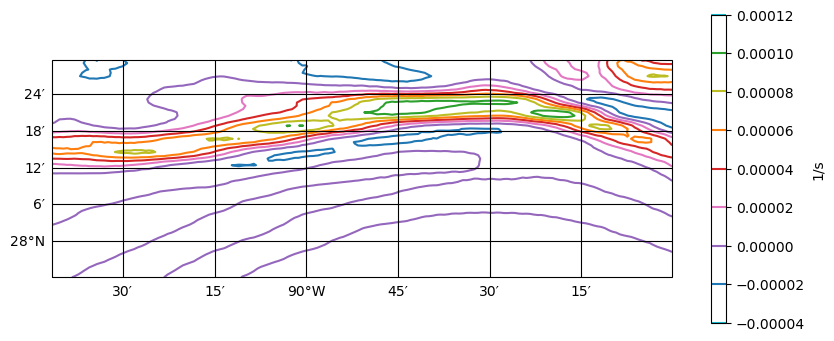

In [27]:
bounds = [-0.00004, -0.00002, 0, 0.00002, 0.00004, 0.00006, 0.00008, 0.00010, 0.00012]


mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contour(X, Y, N_curl, transform=mapcrs, levels = bounds, colors = ['tab:cyan','tab:blue', 'tab:purple', 'tab:pink', 'tab:red', 'tab:orange', 'tab:olive', 'tab:green'])
CM=ax.get_children()[2]
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.colorbar(cs, ax=ax, ticks = bounds, shrink = 0.5, label = '1/s')
gl.top_labels = False
gl.ylabels_right = False

plt.show()

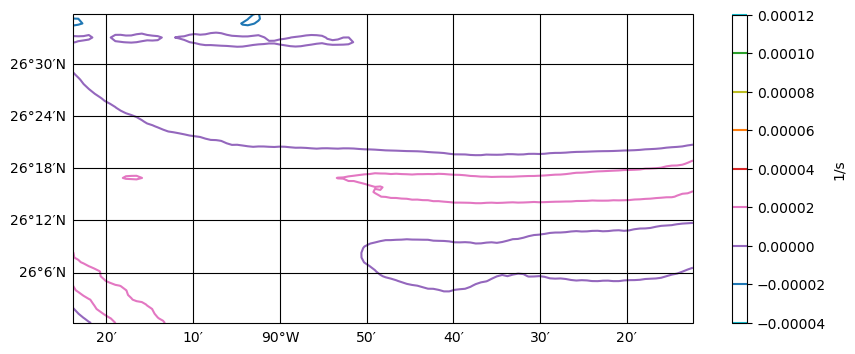

In [28]:
bounds = [-0.00004, -0.00002, 0, 0.00002, 0.00004, 0.00006, 0.00008, 0.00010, 0.00012]

#lon2D, lat2D = np.meshgrid(X2, Y2)
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contour(X2, Y2, S_curl, transform=mapcrs, levels = bounds, colors = ['tab:cyan','tab:blue', 'tab:purple', 'tab:pink', 'tab:red', 'tab:orange', 'tab:olive', 'tab:green'])
CM=ax.get_children()[2]
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.colorbar(cs, ax=ax, ticks = bounds, shrink = 0.5, label = '1/s')
gl.top_labels = False
gl.ylabels_right = False
plt.show()

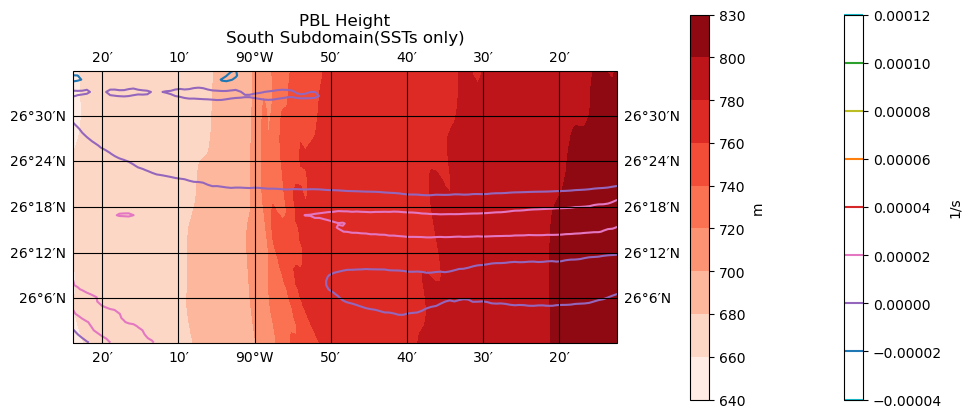

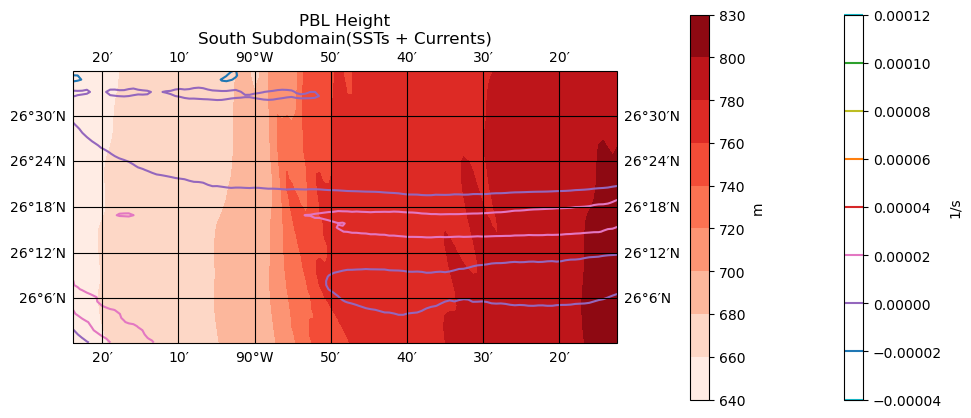

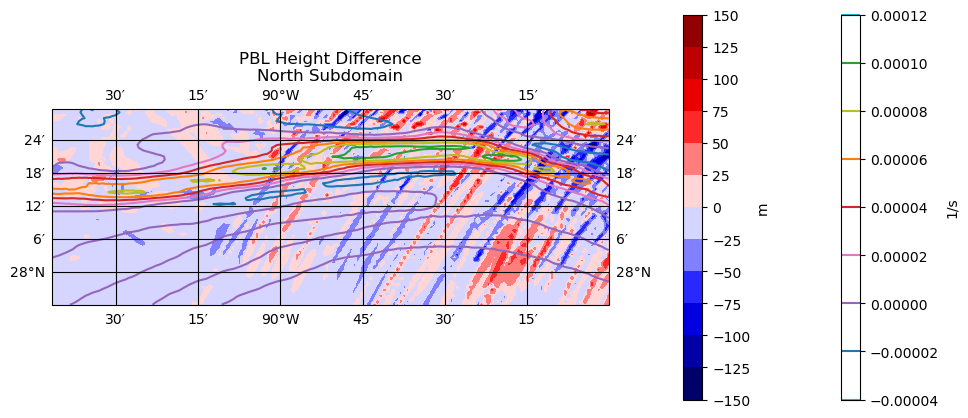

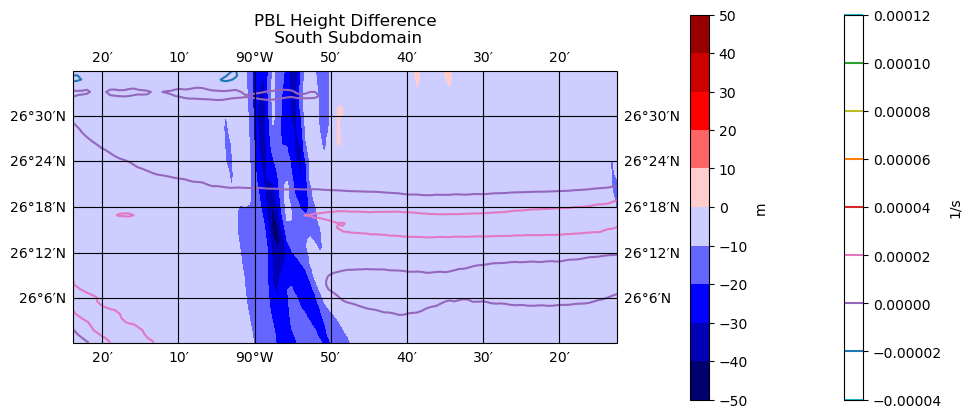

In [31]:
''''
#vort_bounds_pblh_N = [ 0.0001, 0.0003, 0.0006]
vort_bounds_sfc_N = [-0.00016, -0.00008]

#vort_bounds_pblh_S = [-0.0002, -0.0001, -0.00005, -0.000025]
vort_bounds_sfc_S = [-0.001, -0.00005, -0.000025]

vort_bounds_diff_S = [-0.003, -0.001 -0.00005, -0.000025, 0.000025, 0.00005, 0.001, 0.003]
vort_bounds_diff_N = [ -0.001, -0.00009, 0.0009, 0.001]
'''
bounds = [-0.00004, -0.00002, 0, 0.00002, 0.00004, 0.00006, 0.00008, 0.00010, 0.00012]
#pblh_bounds = [1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700]

#n_bounds = 600 to 900 by 20s
#s_bounds = 640 to 820 by 20s
#n_diff = -200 to 200
#s_diff = -100 tp 100

n_bounds = [600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900]
s_bounds = [640, 660, 680, 700, 720, 740, 760, 780, 800, 830]
#n_diff = [-200, -175, -150, -125, -100, -75, -50, -25, 0, 25, 50, 75, 100, 125, 150, 175, 200]
n_diff = [-150, -125, -100, -75, -50, -25, 0, 25, 50, 75, 100, 125, 150]
        #s_diff = [-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
s_diff = [-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50]
#DOR DIFF PLOTS
#plot_color_gradients('Diverging', ['seismic'])

#SST NORTH----------------------------------
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#SFC VORT
cs2 = ax.contour(X, Y, N_curl, transform=mapcrs, levels = bounds, colors = ['tab:cyan','tab:blue', 'tab:purple', 'tab:pink', 'tab:red', 'tab:orange', 'tab:olive', 'tab:green'])
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, sst_pblh_N, levels = n_bounds, cmap = 'Reds')
#cs = ax.contourf(north_lon, north_lat, sst_pblh_N)
PCM=ax.get_children()[2]
plt.colorbar(cs2, ax=ax, ticks = bounds, shrink = 0.5, label = '1/s')
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = n_bounds, label = 'm')
#plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\nNorth Subdomain(SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/PBLH/'
plt.savefig(save_results_to + 'north_pblh_sst.png', bbox_inches = 'tight',dpi = 150)
plt.show()

#SST SOUTH---------------------------------------
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#SFC VORT
cs2 = ax.contour(X2, Y2, S_curl, transform=mapcrs, levels = bounds, colors = ['tab:cyan','tab:blue', 'tab:purple', 'tab:pink', 'tab:red', 'tab:orange', 'tab:olive', 'tab:green'])
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, sst_pblh_S, levels = s_bounds, cmap = 'Reds')
#cs = ax.contourf(south_lon, south_lat, sst_pblh_S)
PCM=ax.get_children()[2]
plt.colorbar(cs2, ax=ax, ticks = bounds, shrink = 0.5, label = '1/s')
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = s_bounds, label = 'm')
#plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\nSouth Subdomain(SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/PBLH/'
plt.savefig(save_results_to + 'south_pblh_sst.png', bbox_inches = 'tight',dpi = 150)
plt.show()

#CUR NORTH-------------------------------------
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#SFC VORT
cs2 = ax.contour(X, Y, N_curl, transform=mapcrs, levels = bounds, colors = ['tab:cyan','tab:blue', 'tab:purple', 'tab:pink', 'tab:red', 'tab:orange', 'tab:olive', 'tab:green'])
ax.coastlines()
#cs = ax.contourf(north_lon, north_lat, cur_pblh_N)
cs = ax.contourf(north_lon, north_lat, cur_pblh_N, levels = n_bounds, cmap = 'Reds')
PCM=ax.get_children()[2]
plt.colorbar(cs2, ax=ax, ticks = bounds, shrink = 0.5, label = '1/s')
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = n_bounds, label = 'm')
#plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\nNorth Subdomain(SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/PBLH/'
plt.savefig(save_results_to + 'north_pblh_cur.png', bbox_inches = 'tight',dpi = 150)
plt.show()

#CUR SOUTH----------------------------
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#SFC VORT
cs2 = ax.contour(X2, Y2, S_curl, transform=mapcrs, levels = bounds, colors = ['tab:cyan','tab:blue', 'tab:purple', 'tab:pink', 'tab:red', 'tab:orange', 'tab:olive', 'tab:green'])
ax.coastlines()
#cs = ax.contourf(south_lon, south_lat, cur_pblh_S)
cs = ax.contourf(south_lon, south_lat, cur_pblh_S, levels = s_bounds, cmap = 'Reds')
PCM=ax.get_children()[2]
plt.colorbar(cs2, ax=ax, ticks = bounds, shrink = 0.5, label = '1/s')
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = s_bounds, label = 'm')
#plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1,  label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\nSouth Subdomain(SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/PBLH/'
plt.savefig(save_results_to + 'south_pblh_cur.png', bbox_inches = 'tight',dpi = 150)
plt.show()


#N DIFF-----------------------------------
#diff_bounds = [-600, -500, -400, -300, -200, -100, 0, 100, 200, 300, 400, 500]
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#SFC VORT
cs2 = ax.contour(X, Y, N_curl, transform=mapcrs, levels = bounds, colors = ['tab:cyan','tab:blue', 'tab:purple', 'tab:pink', 'tab:red', 'tab:orange', 'tab:olive', 'tab:green'])
ax.coastlines()
cs = ax.contourf(north_lon, north_lat,  N_diff_pblh, levels = n_diff, cmap ='seismic')
PCM=ax.get_children()[2]
plt.colorbar(cs2, ax=ax, ticks = bounds, shrink = 0.5, label = '1/s')
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = n_diff, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height Difference\nNorth Subdomain')
#plot_color_gradients('Diverging', ['seismic'])
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/PBLH/'
plt.savefig(save_results_to + 'north_pblh_diff.png', bbox_inches = 'tight',dpi = 150)
plt.show()

#S DIFF------------------------------
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#SFC VORT
cs2 = ax.contour(X2, Y2, S_curl, transform=mapcrs, levels = bounds, colors = ['tab:cyan','tab:blue', 'tab:purple', 'tab:pink', 'tab:red', 'tab:orange', 'tab:olive', 'tab:green'])
ax.coastlines()
cs = ax.contourf(south_lon, south_lat,  S_diff_pblh, levels = s_diff, cmap ='seismic')
PCM=ax.get_children()[2]
plt.colorbar(cs2, ax=ax, ticks = bounds, shrink = 0.5, label = '1/s')
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = s_diff, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
#plot_color_gradients('Diverging', ['seismic'])
plt.title('PBL Height Difference\n South Subdomain')
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/PBLH/'
plt.savefig(save_results_to + 'south_pblh_diff.png', bbox_inches = 'tight',dpi = 150)
plt.show()

#n_bounds = 600 to 900 by 20s
#s_bounds = 640 to 820 by 20s
#n_diff = -200 to 200
#s_diff = -100 tp 100

In [53]:
south_uoce = []
for y in lat_int_south:
    inner_arr_cur = []
    for x in lon_int_south:
        inner_arr_cur.append(uoce[y][x])
    south_uoce.append(inner_arr_cur)
south_uoce = np.array(south_uoce)
print('south: ', south_uoce.shape) 

north_uoce = []
for y in lat_int_north:
    inner_arr_curN = []
    for x in lon_int_north:
        inner_arr_curN.append(uoce[y][x])
    north_uoce .append(inner_arr_curN)
north_uoce = np.array(north_uoce ) 
print('north: ', north_uoce.shape) 

south_voce = []
for y in lat_int_south:
    inner_arr_cur = []
    for x in lon_int_south:
        inner_arr_cur.append(voce[y][x])
    south_voce.append(inner_arr_cur)
south_voce = np.array(south_voce)
print('south: ', south_voce.shape) 

north_voce = []
for y in lat_int_north:
    inner_arr_curN = []
    for x in lon_int_north:
        inner_arr_curN.append(voce[y][x])
    north_voce .append(inner_arr_curN)
north_voce = np.array(north_voce ) 
print('north: ', north_voce.shape) 

#print(north_uoce)
#print(north_voce)
#print(south_uoce)
#print(south_voce)

#north_lon =lon_int_north
#north_lat =lat_int_north
#south_lon =lon_int_south
#south_lat = lat_int_south
#north_lon = np.array(north_lon)
#south_lon = np.array(south_lon)
#north_lat = np.array(north_lat)
#south_lat = np.array(south_lat)
#print(north_lon.shape)
#print(north_lat.shape)
#print(south_lon.shape)
#print(south_lat.shape)


N_dxdy = mpcalc.lat_lon_grid_deltas(longitude=north_lon, latitude=north_lat, x_dim=- 1, y_dim=- 2, geod=None)
S_dxdy = mpcalc.lat_lon_grid_deltas(longitude=south_lon, latitude=south_lat, x_dim=- 1, y_dim=- 2, geod=None)

#N_vort = mpcalc.vorticity(u=north_uoce*units('m/s'), v=north_voce*units('m/s'), dx=N_dxdy[0], dy=N_dxdy[1])
#S_vort = mpcalc.vorticity(u=south_uoce*units('m/s'), v=south_voce*units('m/s'), dx=S_dxdy[0], dy=S_dxdy[1])

#sst_curl_N_pblh = mpcalc.vorticity(u=north_sst_u*units('m/s'), v=north_sst_v*units('m/s'), dx=N_dxdy[0], dy=N_dxdy[1])
test = mpcalc.vorticity(u=north_uoce*units('m/s'), v=north_voce*units('m/s'), dx=N_dxdy[0], dy=N_dxdy[1])
#print(N_vort.shape)
#print(S_vort.shape)
#print(N_vort)
#print(S_vort)
print(test)


south:  (67, 118)
north:  (67, 167)
south:  (67, 118)
north:  (67, 167)
[[nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] ... [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan]] / second


C:\Users\Anna\anaconda3\envs\metpy\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


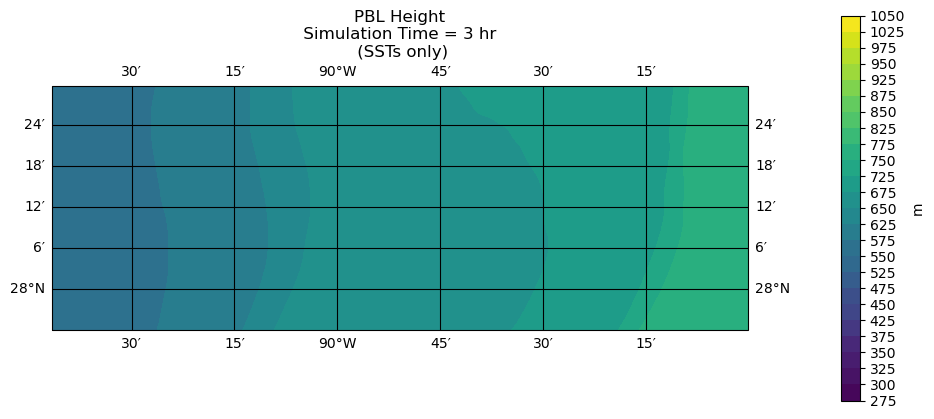

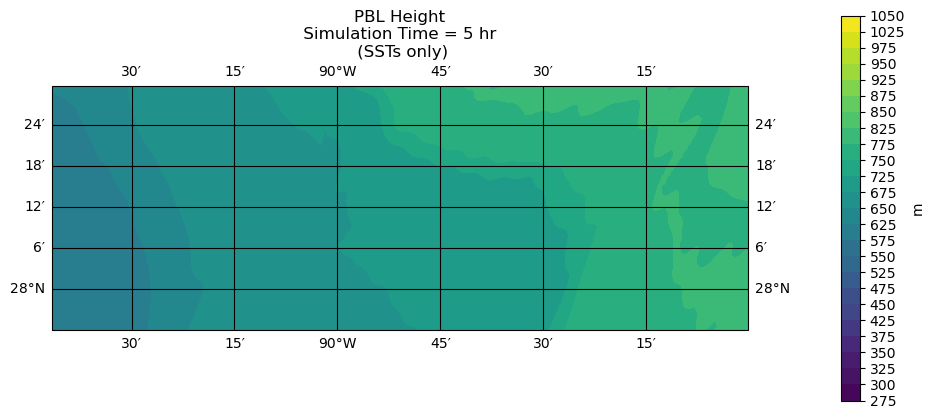

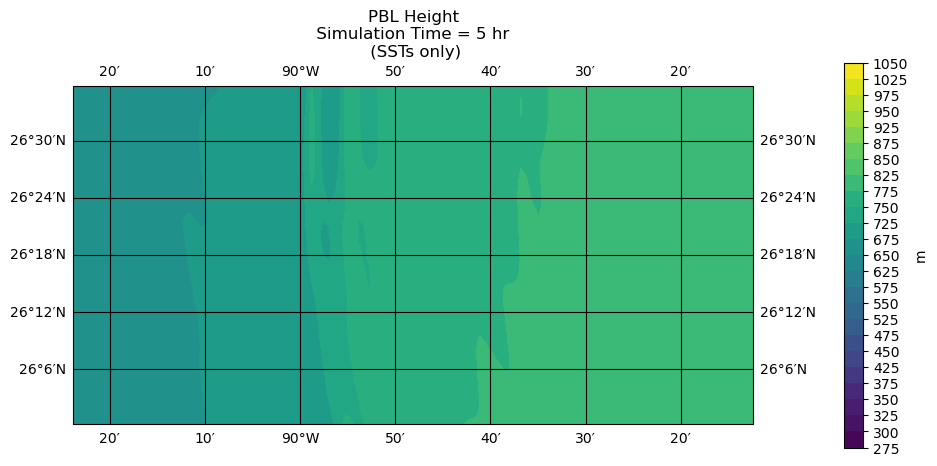

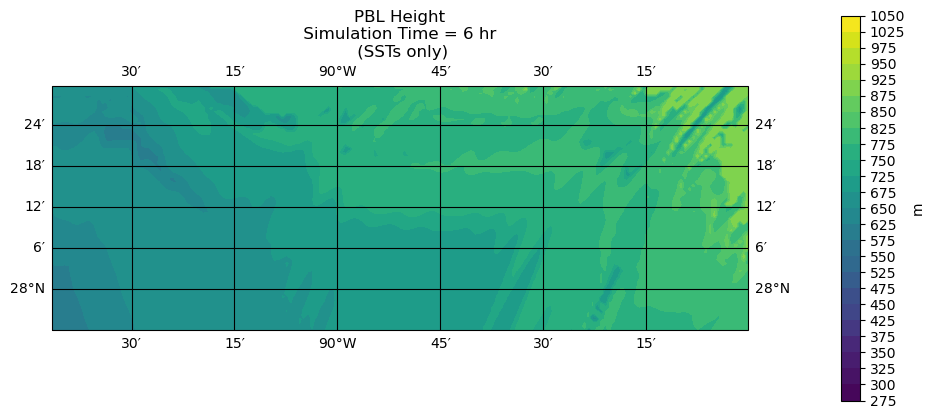

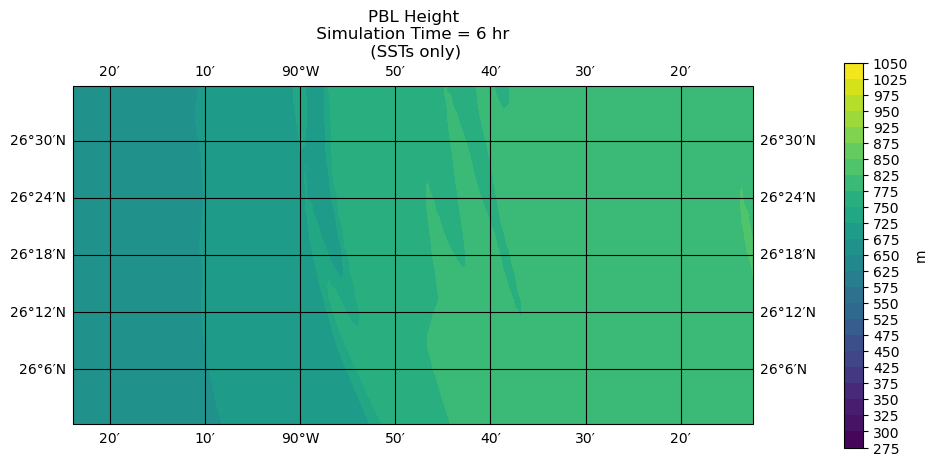

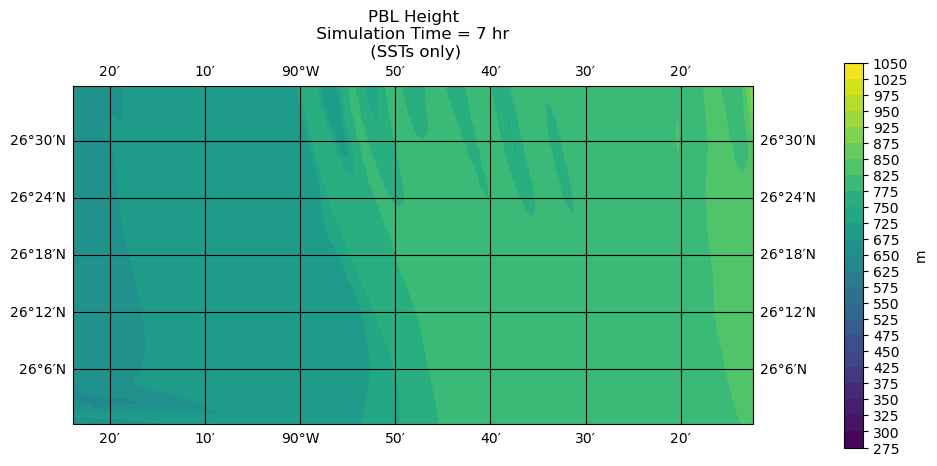

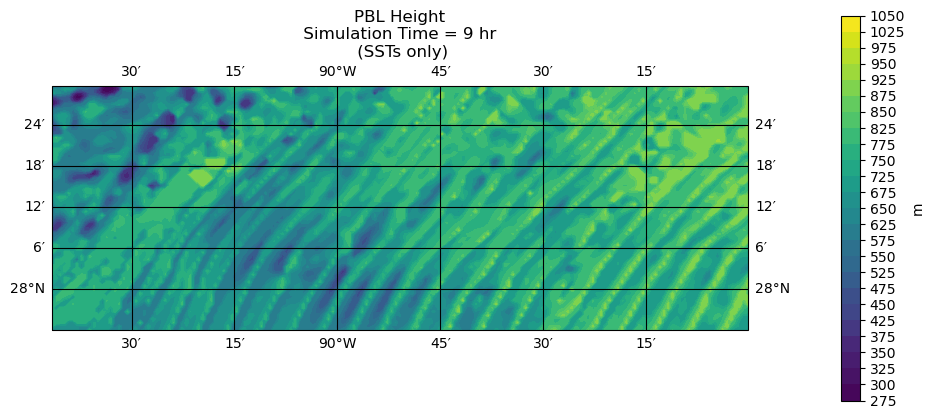

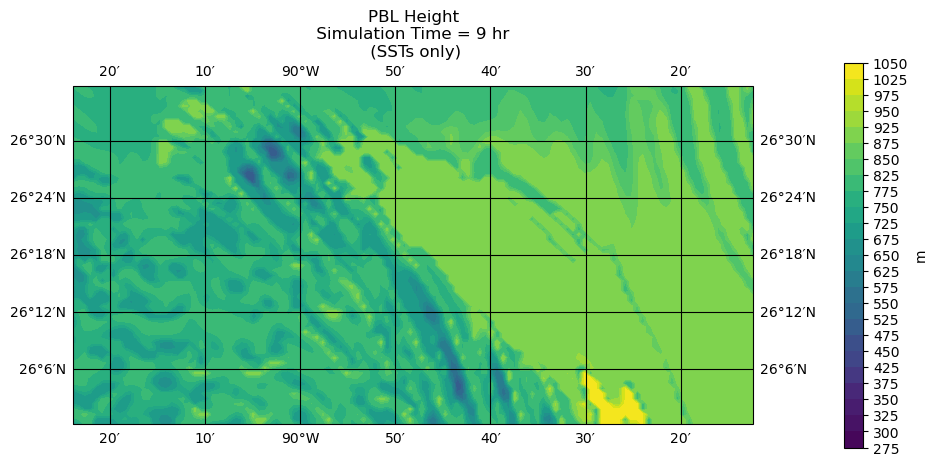

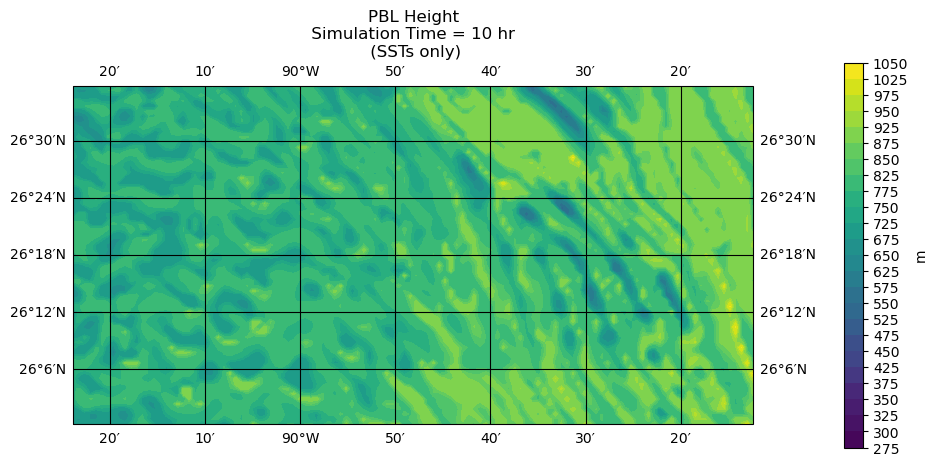

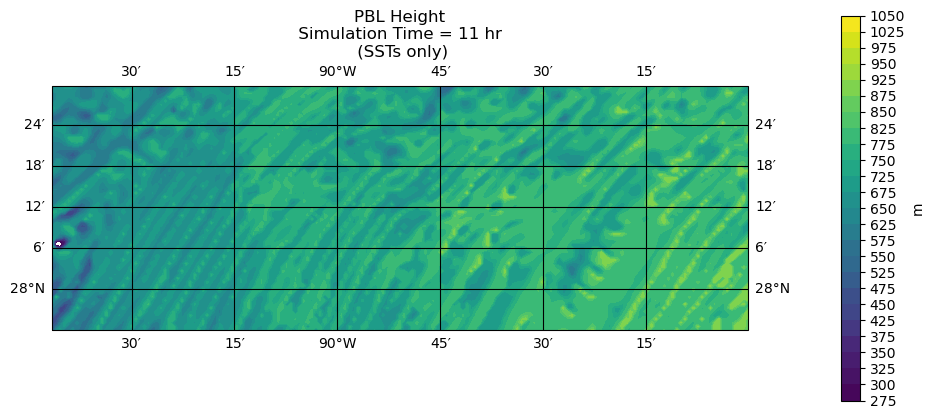

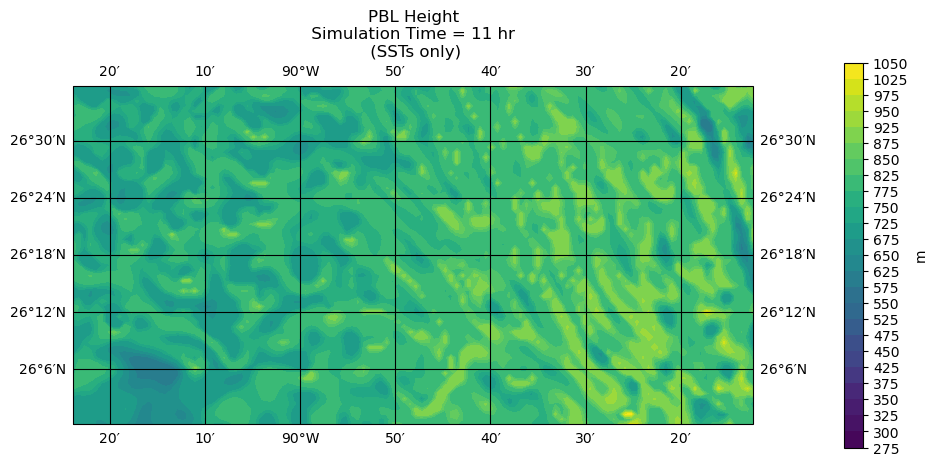

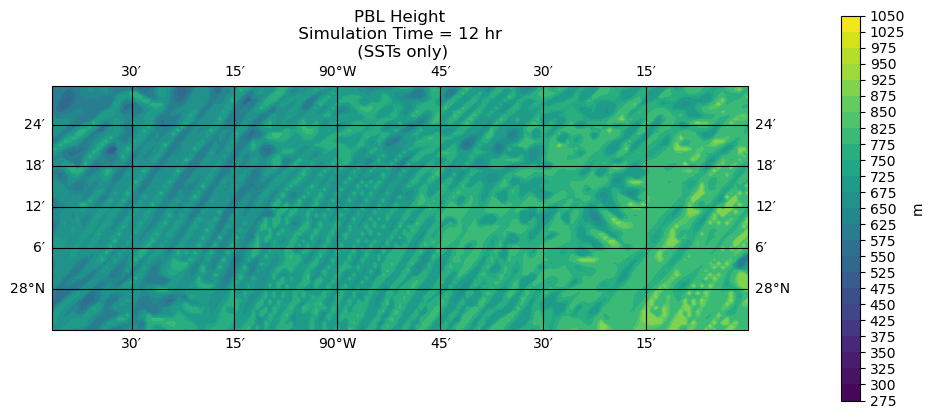

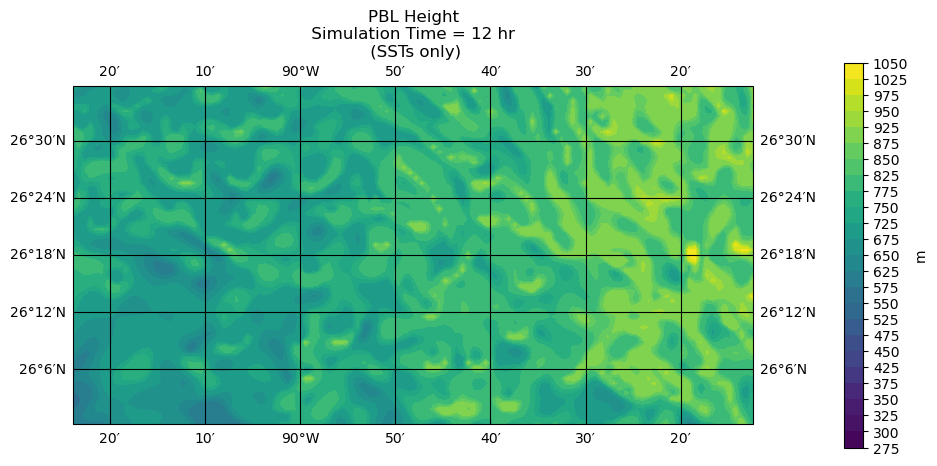

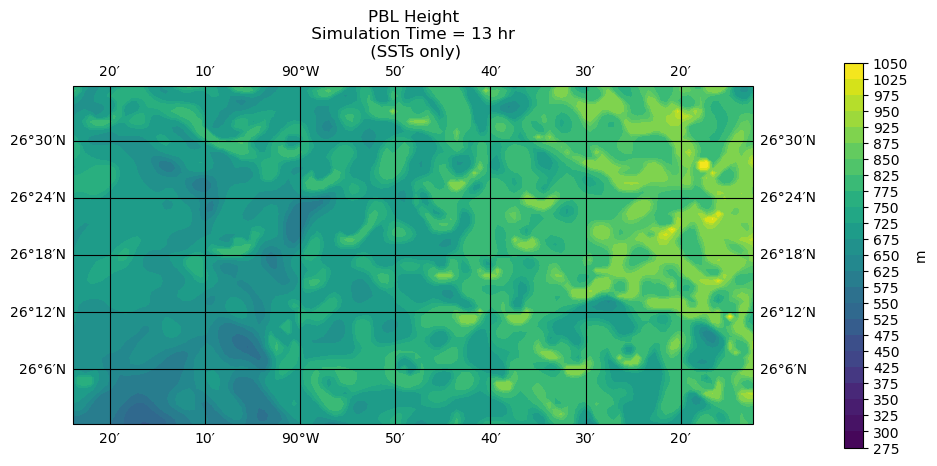

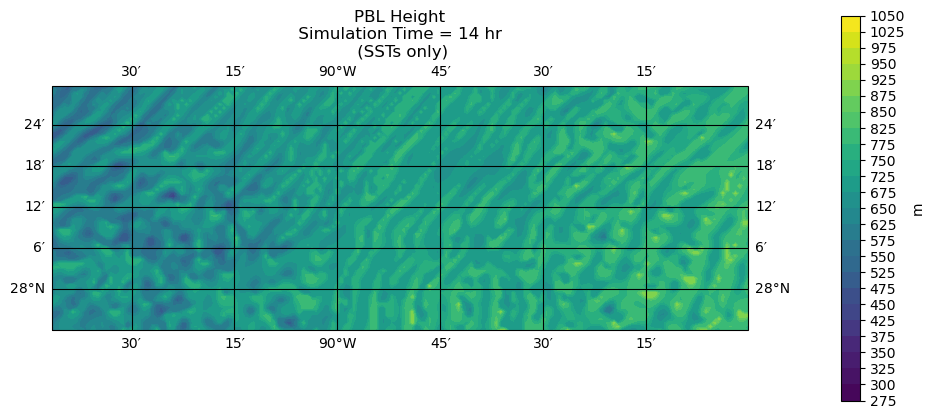

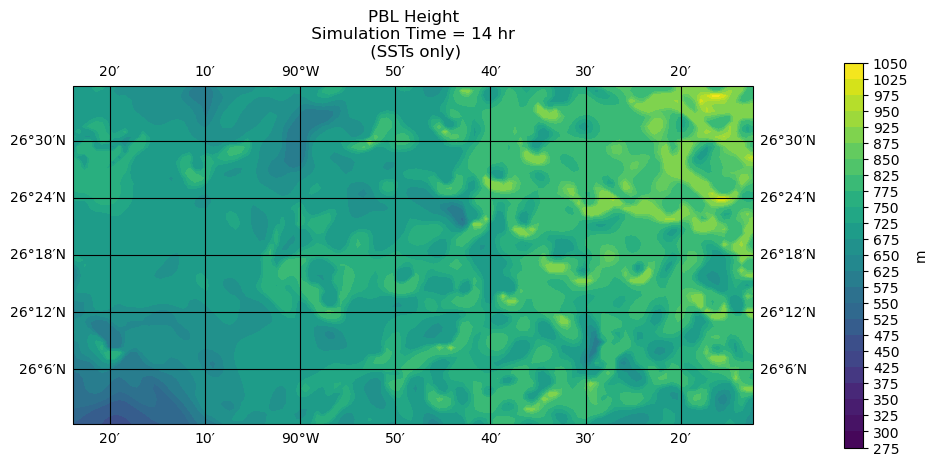

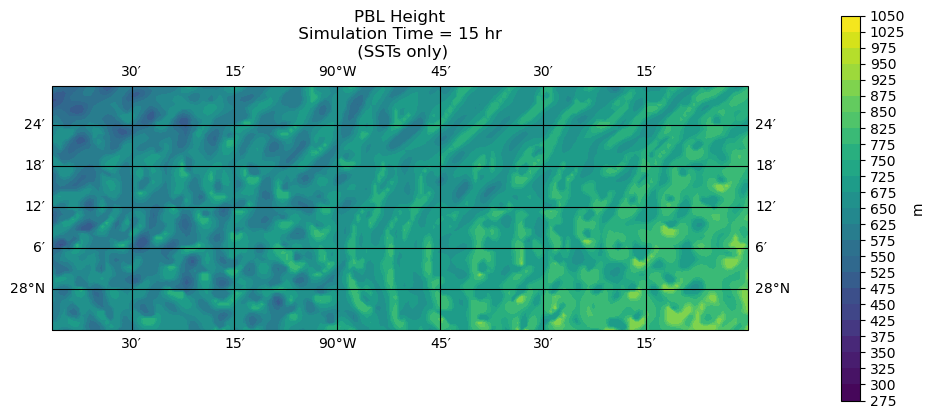

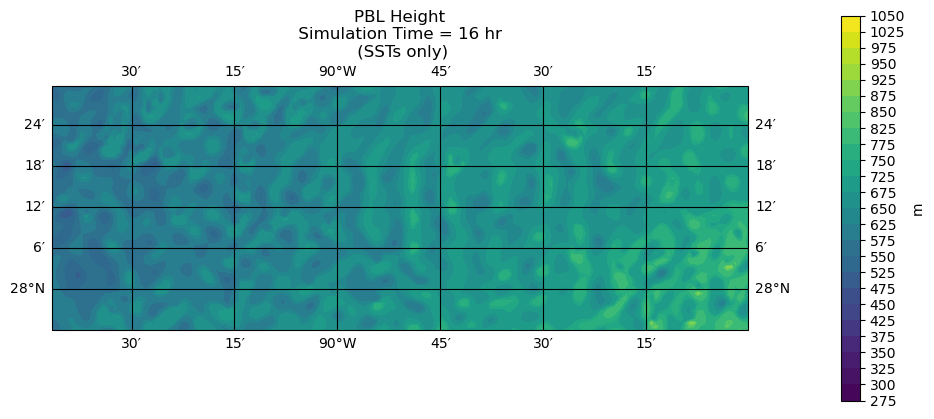

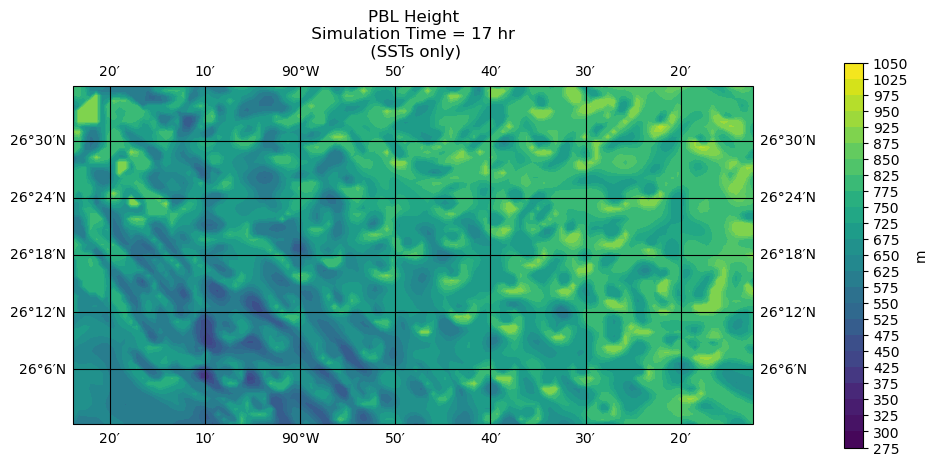

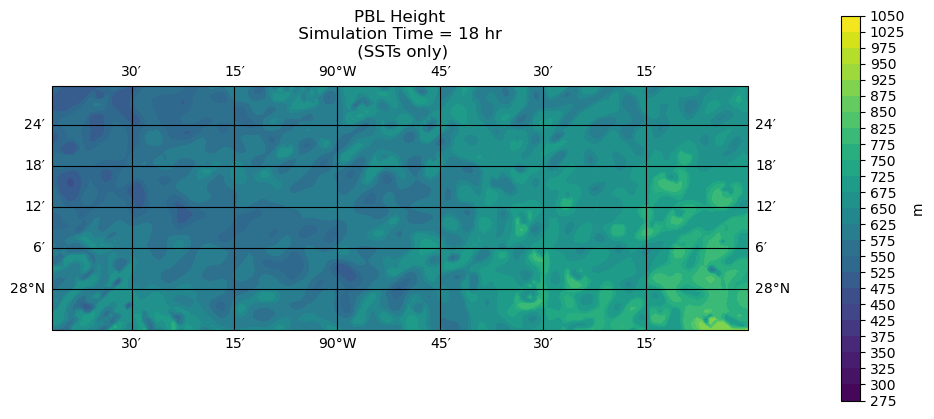

In [24]:

'''
#plot SST PBLH 2D 

# time 10-12 bounds = [550, 575, 600, 625, 650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950]
bounds = [275, 300, 325, 350, 375, 425, 450, 475, 525, 550, 575, 625, 650, 675, 725, 750, 775, 825, 850, 875, 925, 950, 975, 1025, 1050]

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_sst_pblh7, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 1 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_SST_pblh_time1.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_sst_pblh7, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 1 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_SST_pblh_time1.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_sst_pblh8, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 2 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_SST_pblh_time2.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_sst_pblh8, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 2 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_SST_pblh_time2.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_sst_pblh9, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 3 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_SST_pblh_time3.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_sst_pblh9, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 3 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_SST_pblh_time3.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_sst_pblh10, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 4 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_SST_pblh_time4.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_sst_pblh10, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 4 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_SST_pblh_time4.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_sst_pblh11, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 5 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_SST_pblh_time5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_sst_pblh11, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 5 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_SST_pblh_time5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_sst_pblh12, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 6 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_SST_pblh_time6.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_sst_pblh12, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 6 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_SST_pblh_time6.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_sst_pblh13, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 7 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_SST_pblh_time7.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_sst_pblh13, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 7 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_SST_pblh_time7.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_sst_pblh14, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 8 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_SST_pblh_time8.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_sst_pblh14, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 8 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_SST_pblh_time8.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_sst_pblh15, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 9 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_SST_pblh_time9.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_sst_pblh15, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 9 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_SST_pblh_time9.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_sst_pblh16, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 10 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_SST_pblh_time10.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_sst_pblh16, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 10 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_SST_pblh_time10.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_sst_pblh17, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 11 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_SST_pblh_time11.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_sst_pblh17, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 11 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_SST_pblh_time11.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_sst_pblh18, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 12 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_SST_pblh_time12.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_sst_pblh18, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 12 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_SST_pblh_time12.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_sst_pblh19, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 13 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_SST_pblh_time13.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_sst_pblh19, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 13 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_SST_pblh_time13.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_sst_pblh20, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 14 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_SST_pblh_time14.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_sst_pblh20, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 14 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_SST_pblh_time14.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_sst_pblh21, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 15 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_SST_pblh_time15.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_sst_pblh21, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 15 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_SST_pblh_time15.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_sst_pblh22, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 16 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_SST_pblh_time16.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_sst_pblh22, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 16 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_SST_pblh_time16.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_sst_pblh23, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 17 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_SST_pblh_time17.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_sst_pblh23, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 17 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_SST_pblh_time17.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_sst_pblh24, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 18 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_SST_pblh_time18.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_sst_pblh24, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 1 hr \n (SSTs only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_SST_pblh_time18.png', bbox_inches = 'tight',dpi = 150)
plt.show()
'''

In [32]:
#average SST north t=10-12
#north_cur_pblh10
#north_cur_pblh11
#north_cur_pblh12
#north_sst_pblh10
#north_sst_pblh11
#north_sst_pblh12
print(north_sst_pblh12.shape)
#print('\n', north_cur_pblh10[0])
#print('\n', north_cur_pblh11[0])
#print('\n', north_cur_pblh12[0])

cur_pblh_north = np.mean( np.array([ north_cur_pblh11, north_cur_pblh12, north_cur_pblh13 ]), axis=0 )
sst_pblh_north = np.mean( np.array([ north_sst_pblh11, north_sst_pblh12, north_sst_pblh13 ]), axis=0 )

#print('\n', cur_pblh_north[0])
print(cur_pblh_north.shape)
print(sst_pblh_north.shape)
#averge SST south t=10-12
#south_cur_pblh10
#south_cur_pblh11
#south_cur_pblh12
#south_sst_pblh10
#south_sst_pblh11
#south_sst_pblh12
print(south_sst_pblh12.shape)

cur_pblh_south = np.mean( np.array([ south_cur_pblh10, south_cur_pblh11, south_cur_pblh12 ]), axis=0 )
sst_pblh_south = np.mean( np.array([ south_sst_pblh10, south_sst_pblh11, south_sst_pblh12 ]), axis=0 )
print(cur_pblh_south.shape)
print(sst_pblh_south.shape)

(67, 167)
(67, 167)
(67, 167)
(67, 118)
(67, 118)
(67, 118)


In [ ]:
N_diff = 
S_diff = 

In [37]:
#plot SST north and south average 

# time 10-12 bounds = [550, 575, 600, 625, 650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950]
#bounds = [275, 300, 325, 350, 375, 425, 450, 475, 525, 550, 575, 625, 650, 675, 725, 750, 775, 825, 850, 875, 925, 950, 975, 1025, 1050]
n_bounds = [600, 625, 650, 675, 725, 750, 775, 825, 850, 875]

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, cur_pblh_north, levels = n_bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\nAverage Simulation Time 11-13 hrs\nNorth Subdomain (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'CUR_pblh_north_avg.png', bbox_inches = 'tight',dpi = 150)
plt.show()
'''
mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, sst_pblh_north, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\nAverage Simulation Time 11-13 hrs\nNorth Subdomain (SSTs Only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'SST_pblh_north_avg.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, cur_pblh_south, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\nAverage Simulation Time 10-12 hrs\nSouth Subdomain (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'CUR_pblh_south_avg.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, sst_pblh_south, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\nAverage Simulation Time 10-12 hrs\nSouth Subdomain (SSTs Only)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'SST_pblh_south_avg.png', bbox_inches = 'tight',dpi = 150)
plt.show()
'''

"\nmapcrs = crs.PlateCarree()\nfig = plt.figure(figsize=(10, 8))\nax = fig.add_subplot(111, projection=mapcrs)\nax.coastlines()\ncs = ax.contourf(north_lon, north_lat, sst_pblh_north, levels = bounds)\nPCM=ax.get_children()[2]\nplt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')\ngl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')\nplt.tight_layout()\ngl.top_labels = False\ngl.ylabels_right = False\nplt.title('PBL Height\nAverage Simulation Time 11-13 hrs\nNorth Subdomain (SSTs Only)')\nsave_results_to = '/Users/Anna/Desktop/WRF/PBLH/'\nplt.savefig(save_results_to + 'SST_pblh_north_avg.png', bbox_inches = 'tight',dpi = 150)\nplt.show()\n\nmapcrs = crs.PlateCarree()\nfig = plt.figure(figsize=(10, 8))\nax = fig.add_subplot(111, projection=mapcrs)\nax.coastlines()\ncs = ax.contourf(south_lon, south_lat, cur_pblh_south, levels = bounds)\nPCM=ax.get_children()[2]\nplt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bo

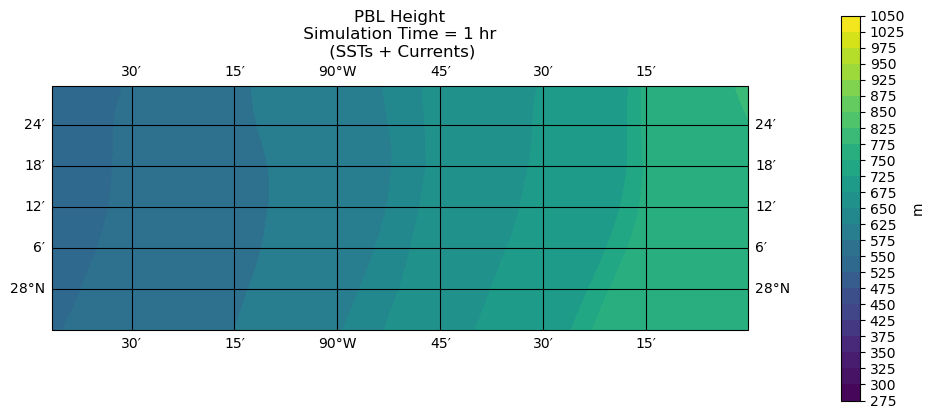

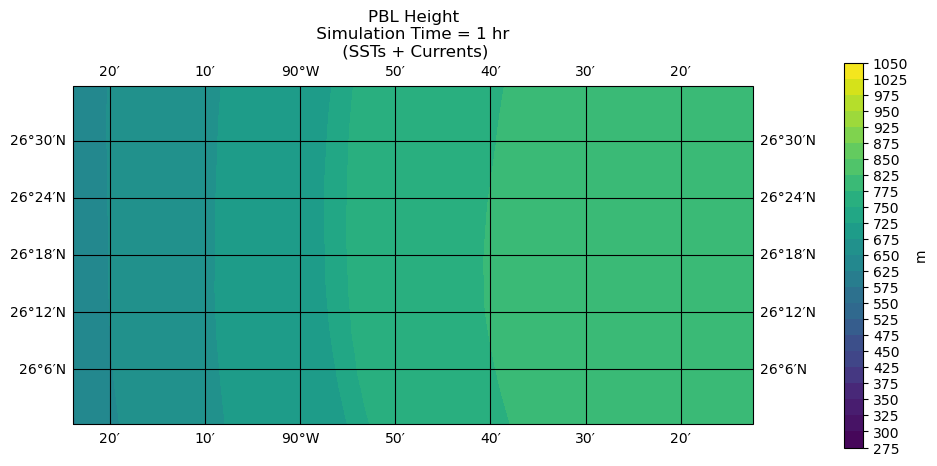

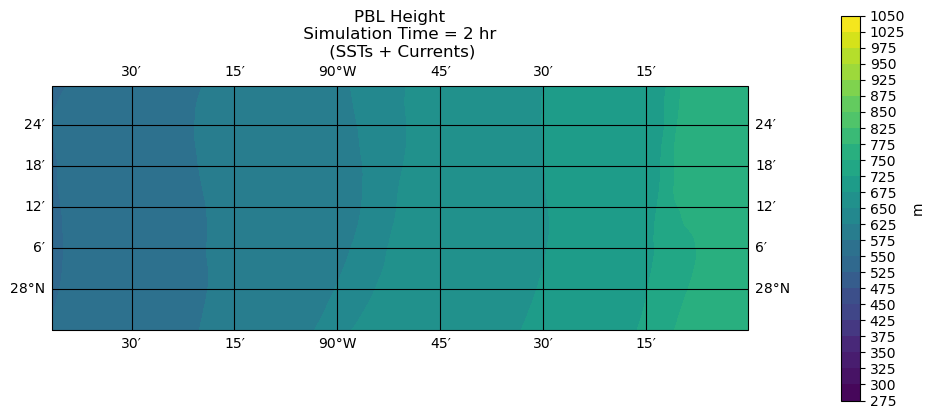

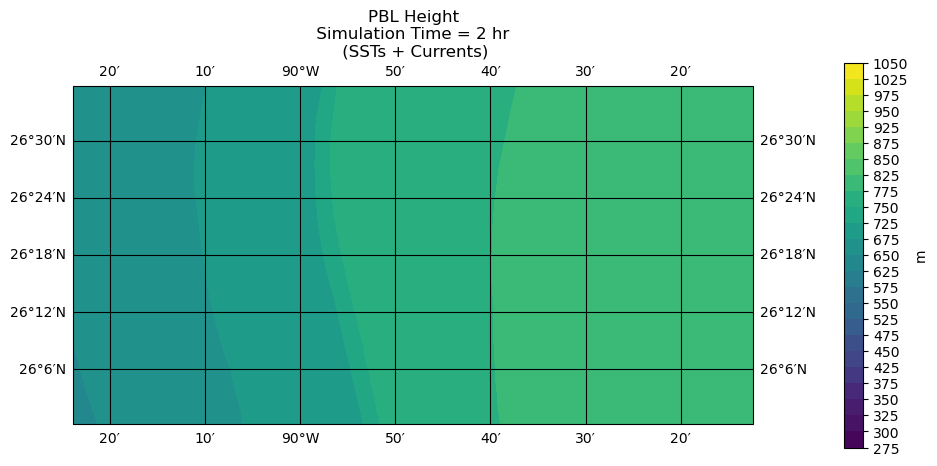

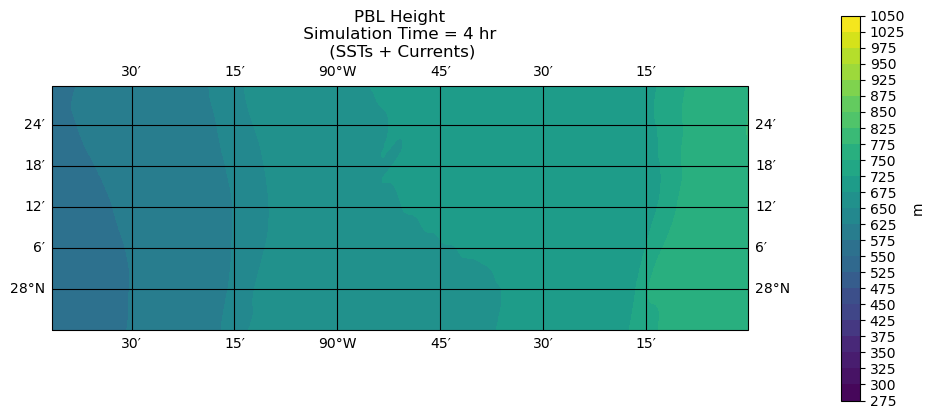

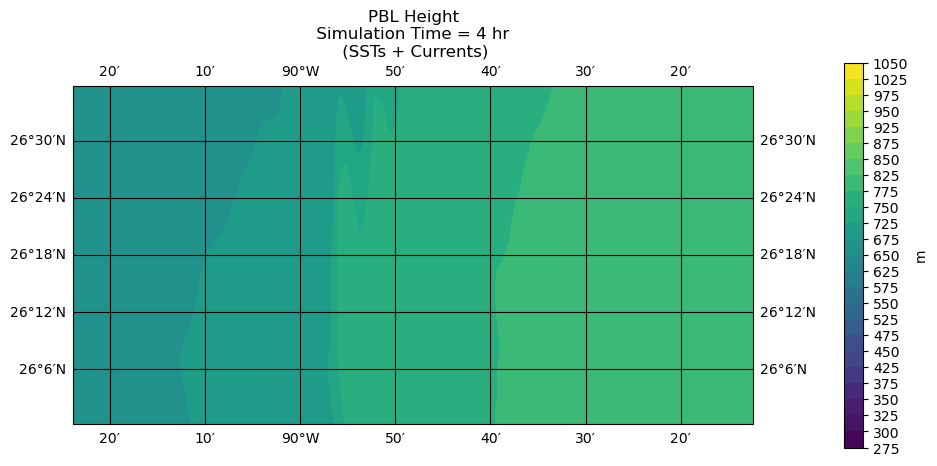

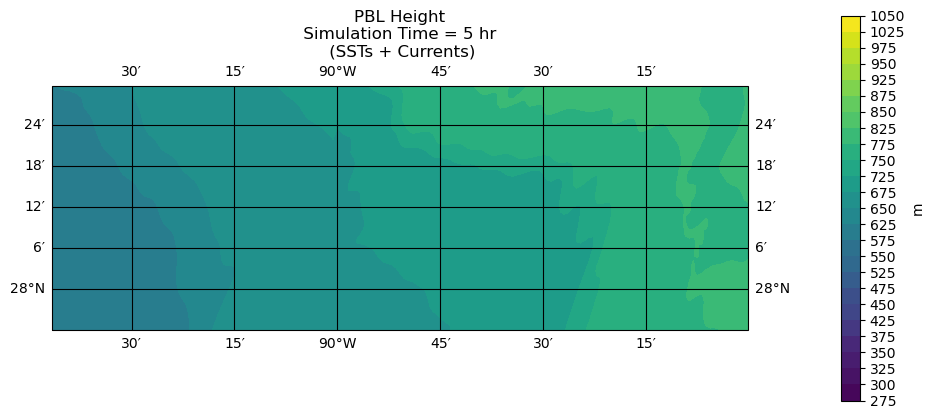

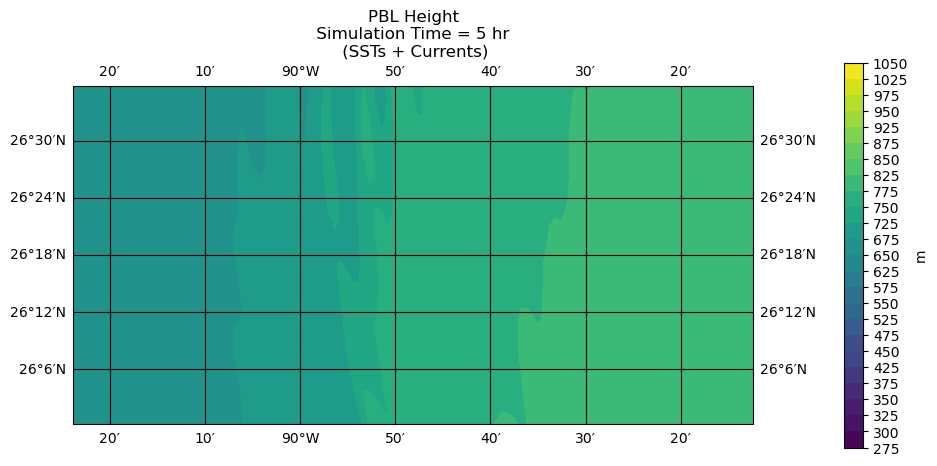

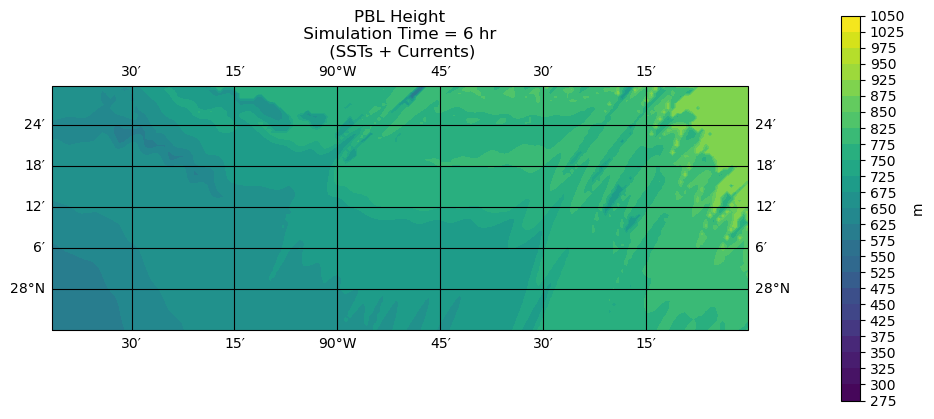

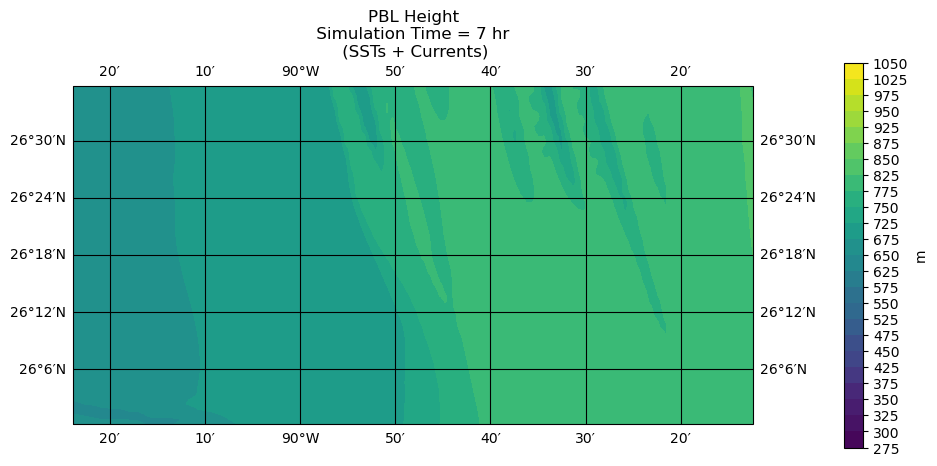

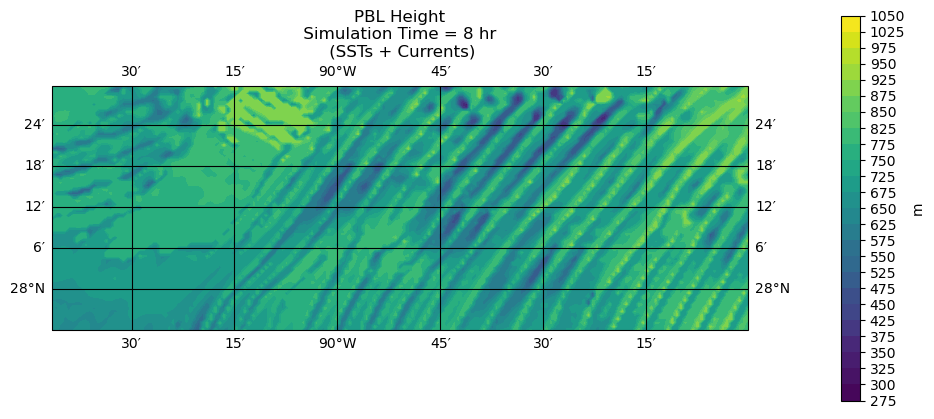

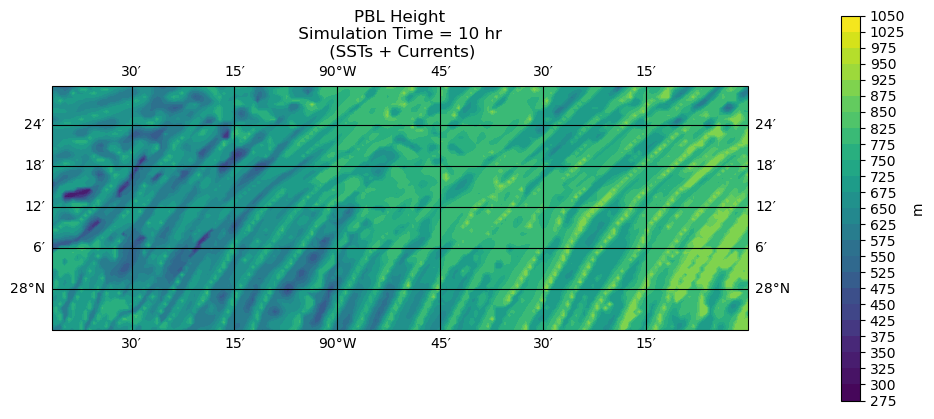

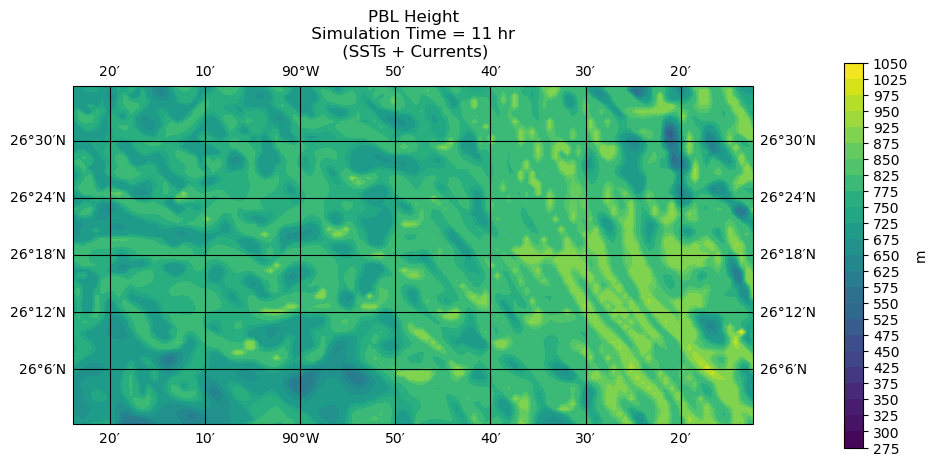

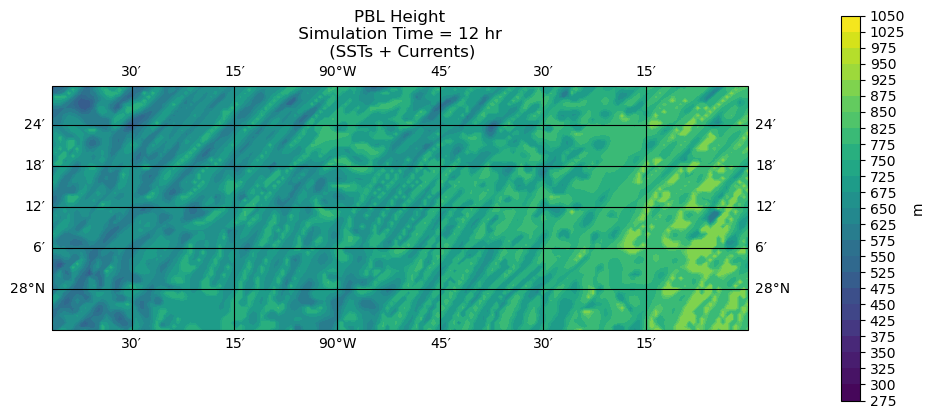

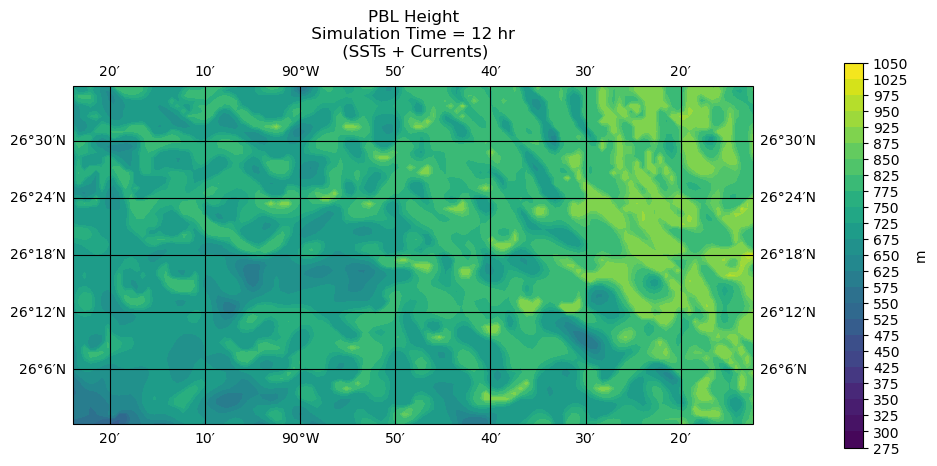

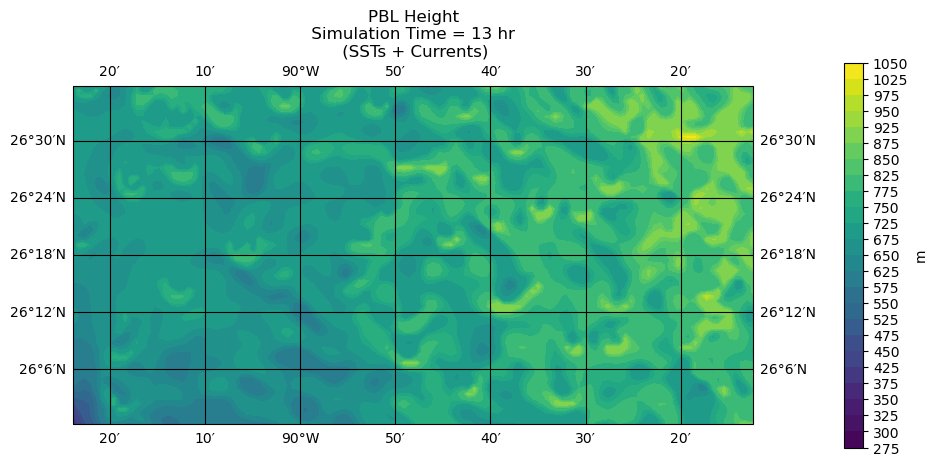

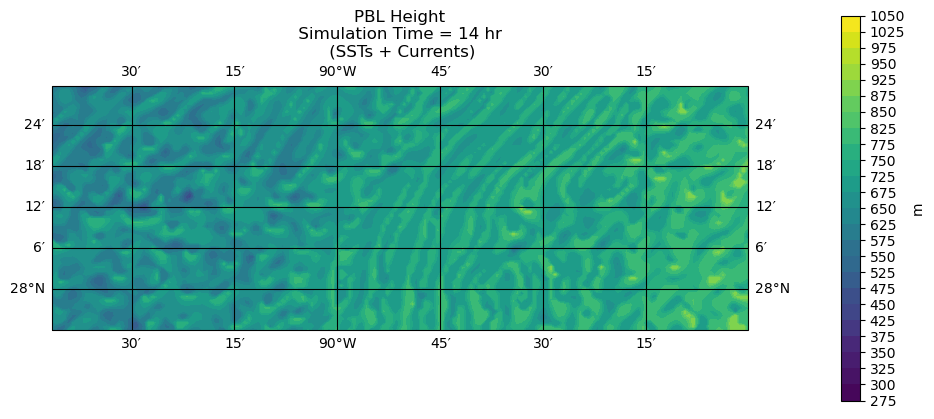

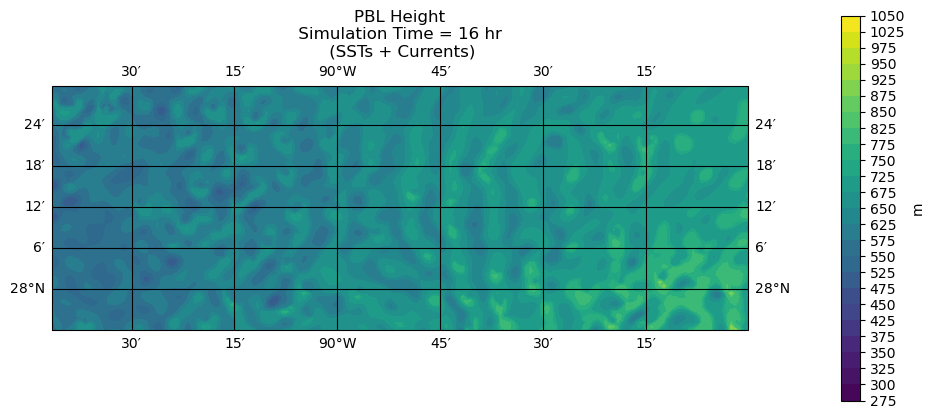

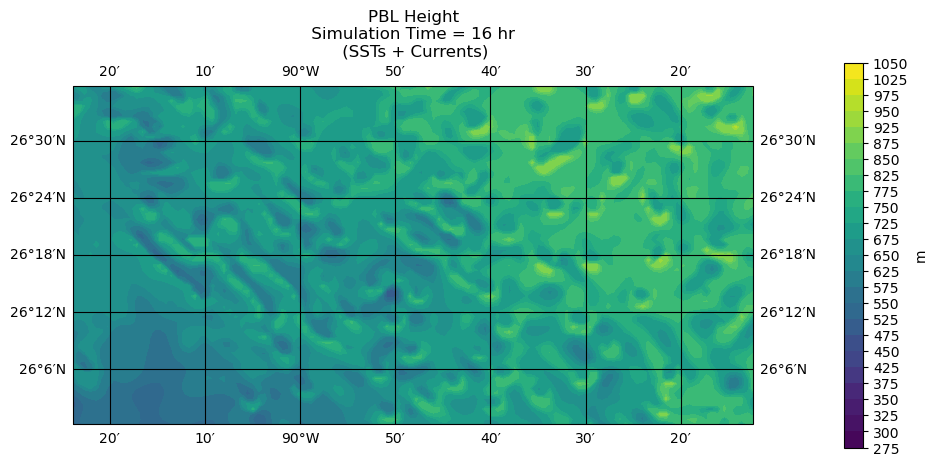

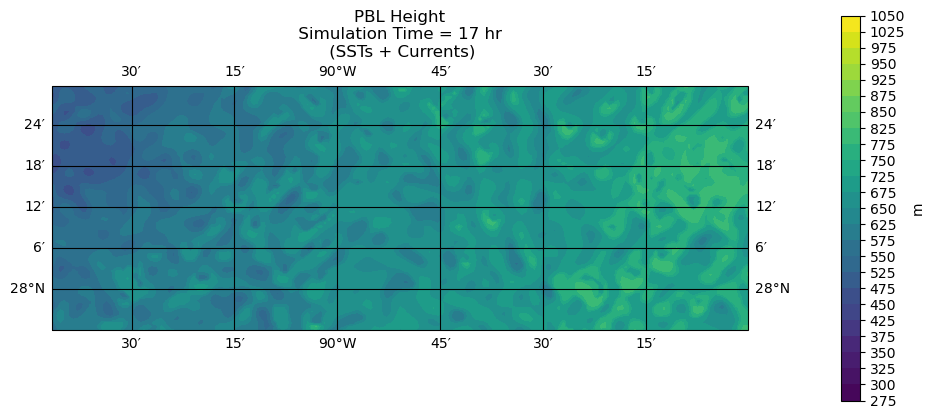

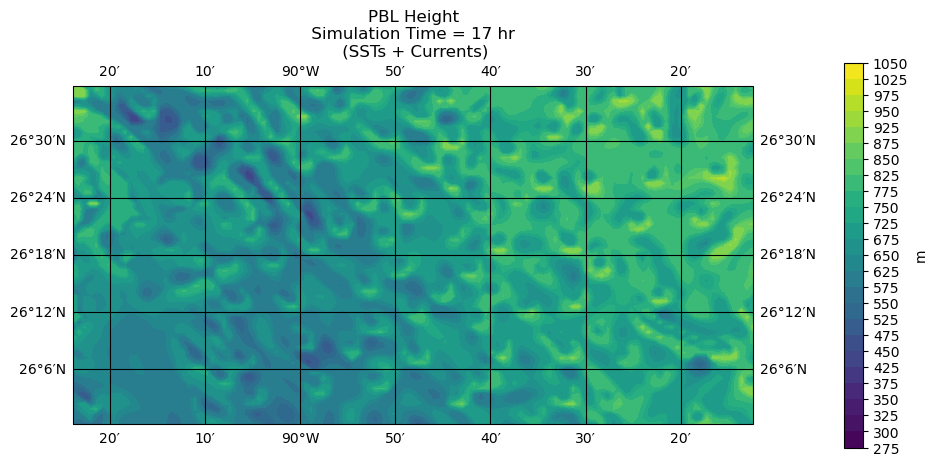

In [28]:
#plot CUR PBLH 2D 
# time 10-12 bounds = [550, 575, 600, 625, 650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950]
bounds = [275, 300, 325, 350, 375, 425, 450, 475, 525, 550, 575, 625, 650, 675, 725, 750, 775, 825, 850, 875, 925, 950, 975, 1025, 1050]

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_cur_pblh7, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 1 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_CUR_pblh_time1.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_cur_pblh7, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 1 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_CUR_pblh_time1.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_cur_pblh8, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 2 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_CUR_pblh_time2.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_cur_pblh8, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 2 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_CUR_pblh_time2.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_cur_pblh9, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 3 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_CUR_pblh_time3.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_cur_pblh9, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 3 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_CUR_pblh_time3.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_cur_pblh10, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 4 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_CUR_pblh_time4.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_cur_pblh10, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 4 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_CUR_pblh_time4.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_cur_pblh11, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 5 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_CUR_pblh_time5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_cur_pblh11, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 5 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_CUR_pblh_time5.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_cur_pblh12, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 6 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_CUR_pblh_time6.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_cur_pblh12, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 6 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_CUR_pblh_time6.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_cur_pblh13, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 7 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_CUR_pblh_time7.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_cur_pblh13, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 7 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_CUR_pblh_time7.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_cur_pblh14, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 8 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_CUR_pblh_time8.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_cur_pblh14, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 8 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_CUR_pblh_time8.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_cur_pblh15, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 9 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_CUR_pblh_time9.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_cur_pblh15, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 9 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_CUR_pblh_time9.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_cur_pblh16, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 10 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_CUR_pblh_time10.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_cur_pblh16, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 10 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_CUR_pblh_time10.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_cur_pblh17, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 11 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_CUR_pblh_time1.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_cur_pblh17, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 11 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_CUR_pblh_time1.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_cur_pblh18, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 12 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_CUR_pblh_time12.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_cur_pblh18, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 12 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_CUR_pblh_time12.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_cur_pblh19, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 13 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_CUR_pblh_time13.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_cur_pblh19, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 13 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_CUR_pblh_time13.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_cur_pblh20, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 14 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_CUR_pblh_time14.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_cur_pblh20, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 14 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_CUR_pblh_time14.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_cur_pblh21, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 15 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_CUR_pblh_time15.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_cur_pblh21, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 15 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_CUR_pblh_time15.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_cur_pblh22, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 16 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_CUR_pblh_time16.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_cur_pblh22, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 16 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_CUR_pblh_time16.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_cur_pblh23, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 17 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_CUR_pblh_time17.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_cur_pblh23, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 17 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_CUR_pblh_time17.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(north_lon, north_lat, north_cur_pblh24, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 18 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'north_CUR_pblh_time18.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = crs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(south_lon, south_lat, south_cur_pblh24, levels = bounds)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, pad = 0.1, ticks = bounds, label = 'm')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('PBL Height\n Simulation Time = 18 hr \n (SSTs + Currents)')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'south_CUR_pblh_time18.png', bbox_inches = 'tight',dpi = 150)
plt.show()

In [21]:
#AVERAGES 
sst_pblh_N = sst_pblh_N.flatten()
sst_pblh_S = sst_pblh_S.flatten()
cur_pblh_N = cur_pblh_N.flatten()
cur_pblh_S = cur_pblh_S.flatten()
n_diff = cur_pblh_N - sst_pblh_N
s_diff = cur_pblh_S - sst_pblh_S
n_diff = n_diff.flatten()
s_diff = s_diff.flatten()

#print('sst_pblh_N shape: ', sst_pblh_N.shape) #(11189,)
#print('sst_pblh_S shape: ', sst_pblh_S.shape) #(7906,)
#print('cur_pblh_N shape: ', cur_pblh_N.shape) #(11189,)
#print('cur_pblh_S shape: ', cur_pblh_S.shape) #(7906,)
#print('n_diff shape: ', n_diff.shape) #(11189,)
#print('s_diff shape: ', s_diff.shape) #(7906,)

n_N = 11189
n_S = 7906

#MEANS
sst_pblh_N_mean = np.nanmean(sst_pblh_N)
sst_pblh_S_mean = np.nanmean(sst_pblh_S)
cur_pblh_N_mean = np.nanmean(cur_pblh_N)
cur_pblh_S_mean = np.nanmean(cur_pblh_S)
print('sst_pblh_N_mean: ', sst_pblh_N_mean)
print('sst_pblh_S_mean: ', sst_pblh_S_mean)
print('cur_pblh_N_mean: ', cur_pblh_N_mean)
print('cur_pblh_S_mean: ', cur_pblh_S_mean)


#STD
sst_pblh_N_std = np.nanstd(sst_pblh_N)
sst_pblh_S_std = np.nanstd(sst_pblh_S)
cur_pblh_N_std = np.nanstd(cur_pblh_N)
cur_pblh_S_std = np.nanstd(cur_pblh_S)
n_diff_std = np.nanstd(n_diff)
s_diff_std = np.nanstd(s_diff)
print(' ')
print('sst_pblh_N_std: ', sst_pblh_N_std)
print('sst_pblh_S_std: ', sst_pblh_S_std)
print('cur_pblh_N_std: ', cur_pblh_N_std)
print('cur_pblh_S_std: ', cur_pblh_S_std)
print('n_diff_std: ', n_diff_std)
print('s_diff_std: ', s_diff_std)

#uncertainty in mean = STD/sqrt(n)
sst_pblh_N_uncert = sst_pblh_N_std/np.sqrt(n_N)
sst_pblh_S_uncert = sst_pblh_S_std/np.sqrt(n_S)
cur_pblh_N_uncert = cur_pblh_N_std/np.sqrt(n_N)
cur_pblh_S_uncert = cur_pblh_S_std/np.sqrt(n_S)
n_diff_uncert = n_diff_std/np.sqrt(n_N)
s_diff_uncert = s_diff_std/np.sqrt(n_S)
print(' ')
print('sst_pblh_N_uncert: ', sst_pblh_N_uncert)
print('sst_pblh_S_uncert: ', sst_pblh_S_uncert)
print('cur_pblh_N_uncert: ', cur_pblh_N_uncert)
print('cur_pblh_S_uncert: ', cur_pblh_S_uncert)

#Diff in 2 mean
print(' ')
n_diff_mean = np.nanmean(n_diff)
s_diff_mean = np.nanmean(s_diff)
print('n_diff_mean: ', n_diff_mean)
print('s_diff_mean: ', s_diff_mean)

#Diff in 2 STD
print(' ')
n_std_diff = cur_pblh_N_std - sst_pblh_N_std
s_std_diff = cur_pblh_S_std - sst_pblh_S_std
print('n_std_diff: ', n_std_diff)
print('s_std_diff: ', s_std_diff)

#Uncert in 2 mean = sqrt[(STD1^2/n1)+(STD2^2/n2)]
print(' ')
n_diff_mean_uncert = np.sqrt( ((sst_pblh_N_std**2)/n_N) + ((cur_pblh_N_std**2)/n_N))
s_diff_mean_uncert = np.sqrt( ((sst_pblh_S_std**2)/n_S) + ((cur_pblh_S_std**2)/n_S))
print('n_diff_mean_uncert: ', n_diff_mean_uncert)
print('s_diff_mean_uncert: ', s_diff_mean_uncert)

#SST NORTH
sst7_pblh_north = north_sst_pblh7.flatten()
sst8_pblh_north = north_sst_pblh8.flatten()
sst9_pblh_north = north_sst_pblh9.flatten()
sst10_pblh_north = north_sst_pblh10.flatten()
sst11_pblh_north = north_sst_pblh11.flatten()
sst12_pblh_north = north_sst_pblh12.flatten()
sst13_pblh_north = north_sst_pblh13.flatten()
sst14_pblh_north = north_sst_pblh14.flatten()
sst15_pblh_north = north_sst_pblh15.flatten()
sst16_pblh_north = north_sst_pblh16.flatten()
sst17_pblh_north = north_sst_pblh17.flatten()
sst18_pblh_north = north_sst_pblh18.flatten()
sst19_pblh_north = north_sst_pblh19.flatten()
sst20_pblh_north = north_sst_pblh20.flatten()
sst21_pblh_north = north_sst_pblh21.flatten()
sst22_pblh_north = north_sst_pblh22.flatten()
sst23_pblh_north = north_sst_pblh23.flatten()
sst24_pblh_north = north_sst_pblh24.flatten()

#SST SOUTH
sst7_pblh_south = south_sst_pblh7.flatten()
sst8_pblh_south = south_sst_pblh8.flatten()
sst9_pblh_south = south_sst_pblh9.flatten()
sst10_pblh_south = south_sst_pblh10.flatten()
sst11_pblh_south = south_sst_pblh11.flatten()
sst12_pblh_south = south_sst_pblh12.flatten()
sst13_pblh_south = south_sst_pblh13.flatten()
sst14_pblh_south = south_sst_pblh14.flatten()
sst15_pblh_south = south_sst_pblh15.flatten()
sst16_pblh_south = south_sst_pblh16.flatten()
sst17_pblh_south = south_sst_pblh17.flatten()
sst18_pblh_south = south_sst_pblh18.flatten()
sst19_pblh_south = south_sst_pblh19.flatten()
sst20_pblh_south = south_sst_pblh20.flatten()
sst21_pblh_south = south_sst_pblh21.flatten()
sst22_pblh_south = south_sst_pblh22.flatten()
sst23_pblh_south = south_sst_pblh23.flatten()
sst24_pblh_south = south_sst_pblh24.flatten()
#CUR NORTH
cur7_pblh_north = north_cur_pblh7.flatten()
cur8_pblh_north = north_cur_pblh8.flatten()
cur9_pblh_north = north_cur_pblh9.flatten()
cur10_pblh_north = north_cur_pblh10.flatten()
cur11_pblh_north = north_cur_pblh11.flatten()
cur12_pblh_north = north_cur_pblh12.flatten()
cur13_pblh_north = north_cur_pblh13.flatten()
cur14_pblh_north = north_cur_pblh14.flatten()
cur15_pblh_north = north_cur_pblh15.flatten()
cur16_pblh_north = north_cur_pblh16.flatten()
cur17_pblh_north = north_cur_pblh17.flatten()
cur18_pblh_north = north_cur_pblh18.flatten()
cur19_pblh_north = north_cur_pblh19.flatten()
cur20_pblh_north = north_cur_pblh20.flatten()
cur21_pblh_north = north_cur_pblh21.flatten()
cur22_pblh_north = north_cur_pblh22.flatten()
cur23_pblh_north = north_cur_pblh23.flatten()
cur24_pblh_north = north_cur_pblh24.flatten()
#CUR SOUTH
cur7_pblh_south = south_cur_pblh7.flatten()
cur8_pblh_south = south_cur_pblh8.flatten()
cur9_pblh_south = south_cur_pblh9.flatten()
cur10_pblh_south = south_cur_pblh10.flatten()
cur11_pblh_south = south_cur_pblh11.flatten()
cur12_pblh_south = south_cur_pblh12.flatten()
cur13_pblh_south = south_cur_pblh13.flatten()
cur14_pblh_south = south_cur_pblh14.flatten()
cur15_pblh_south = south_cur_pblh15.flatten()
cur16_pblh_south = south_cur_pblh16.flatten()
cur17_pblh_south = south_cur_pblh17.flatten()
cur18_pblh_south = south_cur_pblh18.flatten()
cur19_pblh_south = south_cur_pblh19.flatten()
cur20_pblh_south = south_cur_pblh20.flatten()
cur21_pblh_south = south_cur_pblh21.flatten()
cur22_pblh_south = south_cur_pblh22.flatten()
cur23_pblh_south = south_cur_pblh23.flatten()
cur24_pblh_south = south_cur_pblh24.flatten()
#SST NORTH MEAN 
sst7_mean_north  = np.mean(north_sst_pblh7)
sst8_mean_north  = np.mean(north_sst_pblh8)
sst9_mean_north  = np.mean(north_sst_pblh9)
sst10_mean_north  = np.mean(north_sst_pblh10)
sst11_mean_north  = np.mean(north_sst_pblh11)
sst12_mean_north  = np.mean(north_sst_pblh12)
sst13_mean_north  = np.mean(north_sst_pblh13)
sst14_mean_north  = np.mean(north_sst_pblh14)
sst15_mean_north  = np.mean(north_sst_pblh15)
sst16_mean_north  = np.mean(north_sst_pblh16)
sst17_mean_north  = np.mean(north_sst_pblh17)
sst18_mean_north  = np.mean(north_sst_pblh18)
sst19_mean_north  = np.mean(north_sst_pblh19)
sst20_mean_north  = np.mean(north_sst_pblh20)
sst21_mean_north  = np.mean(north_sst_pblh21)
sst22_mean_north  = np.mean(north_sst_pblh22)
sst23_mean_north  = np.mean(north_sst_pblh23)
sst24_mean_north  = np.mean(north_sst_pblh24)
print( ' ' ) 
print( ' ' ) 
print( ' ' ) 
print( ' ' ) 
print( 'sst7_mean_north: ', sst7_mean_north ) 
print( 'sst8_mean_north: ', sst8_mean_north ) 
print( 'sst9_mean_north: ', sst9_mean_north ) 
print( 'sst10_mean_north: ', sst10_mean_north ) 
print( 'sst11_mean_north: ', sst11_mean_north ) 
print( 'sst12_mean_north: ', sst12_mean_north ) 
print( 'sst13_mean_north: ', sst13_mean_north ) 
print( 'sst14_mean_north: ', sst14_mean_north ) 
print( 'sst15_mean_north: ', sst15_mean_north ) 
print( 'sst16_mean_north: ', sst16_mean_north ) 
print( 'sst17_mean_north: ', sst17_mean_north ) 
print( 'sst18_mean_north: ', sst18_mean_north ) 
print( 'sst19_mean_north: ', sst19_mean_north ) 
print( 'sst20_mean_north: ', sst20_mean_north ) 
print( 'sst21_mean_north: ', sst21_mean_north ) 
print( 'sst22_mean_north: ', sst22_mean_north ) 
print( 'sst23_mean_north: ', sst23_mean_north ) 
print( 'sst24_mean_north: ', sst24_mean_north ) 
#SST NORTH STD
sst7_std_north  = np.std(north_sst_pblh7)
sst8_std_north  = np.std(north_sst_pblh8)
sst9_std_north  = np.std(north_sst_pblh9)
sst10_std_north  = np.std(north_sst_pblh10)
sst11_std_north  = np.std(north_sst_pblh11)
sst12_std_north  = np.std(north_sst_pblh12)
sst13_std_north  = np.std(north_sst_pblh13)
sst14_std_north  = np.std(north_sst_pblh14)
sst15_std_north  = np.std(north_sst_pblh15)
sst16_std_north  = np.std(north_sst_pblh16)
sst17_std_north  = np.std(north_sst_pblh17)
sst18_std_north  = np.std(north_sst_pblh18)
sst19_std_north  = np.std(north_sst_pblh19)
sst20_std_north  = np.std(north_sst_pblh20)
sst21_std_north  = np.std(north_sst_pblh21)
sst22_std_north  = np.std(north_sst_pblh22)
sst23_std_north  = np.std(north_sst_pblh23)
sst24_std_north  = np.std(north_sst_pblh24)
print( ' ' ) 
print( 'sst7_std_north: ', sst7_std_north ) 
print( 'sst8_std_north: ', sst8_std_north ) 
print( 'sst9_std_north: ', sst9_std_north ) 
print( 'sst10_std_north: ', sst10_std_north ) 
print( 'sst11_std_north: ', sst11_std_north ) 
print( 'sst12_std_north: ', sst12_std_north ) 
print( 'sst13_std_north: ', sst13_std_north ) 
print( 'sst14_std_north: ', sst14_std_north ) 
print( 'sst15_std_north: ', sst15_std_north ) 
print( 'sst16_std_north: ', sst16_std_north ) 
print( 'sst17_std_north: ', sst17_std_north ) 
print( 'sst18_std_north: ', sst18_std_north ) 
print( 'sst19_std_north: ', sst19_std_north ) 
print( 'sst20_std_north: ', sst20_std_north ) 
print( 'sst21_std_north: ', sst21_std_north ) 
print( 'sst22_std_north: ', sst22_std_north ) 
print( 'sst23_std_north: ', sst23_std_north ) 
print( 'sst24_std_north: ', sst24_std_north ) 
#SST NORTH UNCERT. MEAN
sst_north_mean_uncert7 = sst7_std_north/ np.sqrt(n_N)
sst_north_mean_uncert8 = sst8_std_north/ np.sqrt(n_N)
sst_north_mean_uncert9 = sst9_std_north/ np.sqrt(n_N)
sst_north_mean_uncert10 = sst10_std_north/ np.sqrt(n_N)
sst_north_mean_uncert11 = sst11_std_north/ np.sqrt(n_N)
sst_north_mean_uncert12 = sst12_std_north/ np.sqrt(n_N)
sst_north_mean_uncert13 = sst13_std_north/ np.sqrt(n_N)
sst_north_mean_uncert14 = sst14_std_north/ np.sqrt(n_N)
sst_north_mean_uncert15 = sst15_std_north/ np.sqrt(n_N)
sst_north_mean_uncert16 = sst16_std_north/ np.sqrt(n_N)
sst_north_mean_uncert17 = sst17_std_north/ np.sqrt(n_N)
sst_north_mean_uncert18 = sst18_std_north/ np.sqrt(n_N)
sst_north_mean_uncert19 = sst19_std_north/ np.sqrt(n_N)
sst_north_mean_uncert20 = sst20_std_north/ np.sqrt(n_N)
sst_north_mean_uncert21 = sst21_std_north/ np.sqrt(n_N)
sst_north_mean_uncert22 = sst22_std_north/ np.sqrt(n_N)
sst_north_mean_uncert23 = sst23_std_north/ np.sqrt(n_N)
sst_north_mean_uncert24 = sst24_std_north/ np.sqrt(n_N)
print( ' ' ) 
print( 'sst_north_mean_uncert7: ', sst_north_mean_uncert7) 
print( 'sst_north_mean_uncert8: ', sst_north_mean_uncert8) 
print( 'sst_north_mean_uncert9: ', sst_north_mean_uncert9) 
print( 'sst_north_mean_uncert10: ', sst_north_mean_uncert10) 
print( 'sst_north_mean_uncert11: ', sst_north_mean_uncert11) 
print( 'sst_north_mean_uncert12: ', sst_north_mean_uncert12) 
print( 'sst_north_mean_uncert13: ', sst_north_mean_uncert13) 
print( 'sst_north_mean_uncert14: ', sst_north_mean_uncert14) 
print( 'sst_north_mean_uncert15: ', sst_north_mean_uncert15) 
print( 'sst_north_mean_uncert16: ', sst_north_mean_uncert16) 
print( 'sst_north_mean_uncert17: ', sst_north_mean_uncert17) 
print( 'sst_north_mean_uncert18: ', sst_north_mean_uncert18) 
print( 'sst_north_mean_uncert19: ', sst_north_mean_uncert19) 
print( 'sst_north_mean_uncert20: ', sst_north_mean_uncert20) 
print( 'sst_north_mean_uncert21: ', sst_north_mean_uncert21) 
print( 'sst_north_mean_uncert22: ', sst_north_mean_uncert22) 
print( 'sst_north_mean_uncert23: ', sst_north_mean_uncert23) 
print( 'sst_north_mean_uncert24: ', sst_north_mean_uncert24) 








#CUR NORTH MEAN
cur7_mean_north  = np.mean(north_cur_pblh7)
cur8_mean_north  = np.mean(north_cur_pblh8)
cur9_mean_north  = np.mean(north_cur_pblh9)
cur10_mean_north  = np.mean(north_cur_pblh10)
cur11_mean_north  = np.mean(north_cur_pblh11)
cur12_mean_north  = np.mean(north_cur_pblh12)
cur13_mean_north  = np.mean(north_cur_pblh13)
cur14_mean_north  = np.mean(north_cur_pblh14)
cur15_mean_north  = np.mean(north_cur_pblh15)
cur16_mean_north  = np.mean(north_cur_pblh16)
cur17_mean_north  = np.mean(north_cur_pblh17)
cur18_mean_north  = np.mean(north_cur_pblh18)
cur19_mean_north  = np.mean(north_cur_pblh19)
cur20_mean_north  = np.mean(north_cur_pblh20)
cur21_mean_north  = np.mean(north_cur_pblh21)
cur22_mean_north  = np.mean(north_cur_pblh22)
cur23_mean_north  = np.mean(north_cur_pblh23)
cur24_mean_north  = np.mean(north_cur_pblh24)
print( ' ' ) 
print( 'cur7_mean_north: ', cur7_mean_north ) 
print( 'cur8_mean_north: ', cur8_mean_north ) 
print( 'cur9_mean_north: ', cur9_mean_north ) 
print( 'cur10_mean_north: ', cur10_mean_north ) 
print( 'cur11_mean_north: ', cur11_mean_north ) 
print( 'cur12_mean_north: ', cur12_mean_north ) 
print( 'cur13_mean_north: ', cur13_mean_north ) 
print( 'cur14_mean_north: ', cur14_mean_north ) 
print( 'cur15_mean_north: ', cur15_mean_north ) 
print( 'cur16_mean_north: ', cur16_mean_north ) 
print( 'cur17_mean_north: ', cur17_mean_north ) 
print( 'cur18_mean_north: ', cur18_mean_north ) 
print( 'cur19_mean_north: ', cur19_mean_north ) 
print( 'cur20_mean_north: ', cur20_mean_north ) 
print( 'cur21_mean_north: ', cur21_mean_north ) 
print( 'cur22_mean_north: ', cur22_mean_north ) 
print( 'cur23_mean_north: ', cur23_mean_north ) 
print( 'cur24_mean_north: ', cur24_mean_north ) 
#CUR NORTH STD
cur7_std_north  = np.std(north_cur_pblh7)
cur8_std_north  = np.std(north_cur_pblh8)
cur9_std_north  = np.std(north_cur_pblh9)
cur10_std_north  = np.std(north_cur_pblh10)
cur11_std_north  = np.std(north_cur_pblh11)
cur12_std_north  = np.std(north_cur_pblh12)
cur13_std_north  = np.std(north_cur_pblh13)
cur14_std_north  = np.std(north_cur_pblh14)
cur15_std_north  = np.std(north_cur_pblh15)
cur16_std_north  = np.std(north_cur_pblh16)
cur17_std_north  = np.std(north_cur_pblh17)
cur18_std_north  = np.std(north_cur_pblh18)
cur19_std_north  = np.std(north_cur_pblh19)
cur20_std_north  = np.std(north_cur_pblh20)
cur21_std_north  = np.std(north_cur_pblh21)
cur22_std_north  = np.std(north_cur_pblh22)
cur23_std_north  = np.std(north_cur_pblh23)
cur24_std_north  = np.std(north_cur_pblh24)
print( ' ' ) 
print( 'cur7_std_north: ', cur7_std_north ) 
print( 'cur8_std_north: ', cur8_std_north ) 
print( 'cur9_std_north: ', cur9_std_north ) 
print( 'cur10_std_north: ', cur10_std_north ) 
print( 'cur11_std_north: ', cur11_std_north ) 
print( 'cur12_std_north: ', cur12_std_north ) 
print( 'cur13_std_north: ', cur13_std_north ) 
print( 'cur14_std_north: ', cur14_std_north ) 
print( 'cur15_std_north: ', cur15_std_north ) 
print( 'cur16_std_north: ', cur16_std_north ) 
print( 'cur17_std_north: ', cur17_std_north ) 
print( 'cur18_std_north: ', cur18_std_north ) 
print( 'cur19_std_north: ', cur19_std_north ) 
print( 'cur20_std_north: ', cur20_std_north ) 
print( 'cur21_std_north: ', cur21_std_north ) 
print( 'cur22_std_north: ', cur22_std_north ) 
print( 'cur23_std_north: ', cur23_std_north ) 
print( 'cur24_std_north: ', cur24_std_north ) 
#CUR NORTH UNCERT. MEAN
cur_north_mean_uncert7 = cur7_std_north/ np.sqrt(n_N)
cur_north_mean_uncert8 = cur8_std_north/ np.sqrt(n_N)
cur_north_mean_uncert9 = cur9_std_north/ np.sqrt(n_N)
cur_north_mean_uncert10 = cur10_std_north/ np.sqrt(n_N)
cur_north_mean_uncert11 = cur11_std_north/ np.sqrt(n_N)
cur_north_mean_uncert12 = cur12_std_north/ np.sqrt(n_N)
cur_north_mean_uncert13 = cur13_std_north/ np.sqrt(n_N)
cur_north_mean_uncert14 = cur14_std_north/ np.sqrt(n_N)
cur_north_mean_uncert15 = cur15_std_north/ np.sqrt(n_N)
cur_north_mean_uncert16 = cur16_std_north/ np.sqrt(n_N)
cur_north_mean_uncert17 = cur17_std_north/ np.sqrt(n_N)
cur_north_mean_uncert18 = cur18_std_north/ np.sqrt(n_N)
cur_north_mean_uncert19 = cur19_std_north/ np.sqrt(n_N)
cur_north_mean_uncert20 = cur20_std_north/ np.sqrt(n_N)
cur_north_mean_uncert21 = cur21_std_north/ np.sqrt(n_N)
cur_north_mean_uncert22 = cur22_std_north/ np.sqrt(n_N)
cur_north_mean_uncert23 = cur23_std_north/ np.sqrt(n_N)
cur_north_mean_uncert24 = cur24_std_north/ np.sqrt(n_N)
print( ' ' ) 
print( 'cur_north_mean_uncert7: ', cur_north_mean_uncert7) 
print( 'cur_north_mean_uncert8: ', cur_north_mean_uncert8) 
print( 'cur_north_mean_uncert9: ', cur_north_mean_uncert9) 
print( 'cur_north_mean_uncert10: ', cur_north_mean_uncert10) 
print( 'cur_north_mean_uncert11: ', cur_north_mean_uncert11) 
print( 'cur_north_mean_uncert12: ', cur_north_mean_uncert12) 
print( 'cur_north_mean_uncert13: ', cur_north_mean_uncert13) 
print( 'cur_north_mean_uncert14: ', cur_north_mean_uncert14) 
print( 'cur_north_mean_uncert15: ', cur_north_mean_uncert15) 
print( 'cur_north_mean_uncert16: ', cur_north_mean_uncert16) 
print( 'cur_north_mean_uncert17: ', cur_north_mean_uncert17) 
print( 'cur_north_mean_uncert18: ', cur_north_mean_uncert18) 
print( 'cur_north_mean_uncert19: ', cur_north_mean_uncert19) 
print( 'cur_north_mean_uncert20: ', cur_north_mean_uncert20) 
print( 'cur_north_mean_uncert21: ', cur_north_mean_uncert21) 
print( 'cur_north_mean_uncert22: ', cur_north_mean_uncert22) 
print( 'cur_north_mean_uncert23: ', cur_north_mean_uncert23) 
print( 'cur_north_mean_uncert24: ', cur_north_mean_uncert24) 







#SST SOUTH MEAN
sst7_mean_south  = np.mean(south_sst_pblh7)
sst8_mean_south  = np.mean(south_sst_pblh8)
sst9_mean_south  = np.mean(south_sst_pblh9)
sst10_mean_south  = np.mean(south_sst_pblh10)
sst11_mean_south  = np.mean(south_sst_pblh11)
sst12_mean_south  = np.mean(south_sst_pblh12)
sst13_mean_south  = np.mean(south_sst_pblh13)
sst14_mean_south  = np.mean(south_sst_pblh14)
sst15_mean_south  = np.mean(south_sst_pblh15)
sst16_mean_south  = np.mean(south_sst_pblh16)
sst17_mean_south  = np.mean(south_sst_pblh17)
sst18_mean_south  = np.mean(south_sst_pblh18)
sst19_mean_south  = np.mean(south_sst_pblh19)
sst20_mean_south  = np.mean(south_sst_pblh20)
sst21_mean_south  = np.mean(south_sst_pblh21)
sst22_mean_south  = np.mean(south_sst_pblh22)
sst23_mean_south  = np.mean(south_sst_pblh23)
sst24_mean_south  = np.mean(south_sst_pblh24)
print( ' ' ) 
print( 'sst7_mean_south: ', sst7_mean_south ) 
print( 'sst8_mean_south: ', sst8_mean_south ) 
print( 'sst9_mean_south: ', sst9_mean_south ) 
print( 'sst10_mean_south: ', sst10_mean_south ) 
print( 'sst11_mean_south: ', sst11_mean_south ) 
print( 'sst12_mean_south: ', sst12_mean_south ) 
print( 'sst13_mean_south: ', sst13_mean_south ) 
print( 'sst14_mean_south: ', sst14_mean_south ) 
print( 'sst15_mean_south: ', sst15_mean_south ) 
print( 'sst16_mean_south: ', sst16_mean_south ) 
print( 'sst17_mean_south: ', sst17_mean_south ) 
print( 'sst18_mean_south: ', sst18_mean_south ) 
print( 'sst19_mean_south: ', sst19_mean_south ) 
print( 'sst20_mean_south: ', sst20_mean_south ) 
print( 'sst21_mean_south: ', sst21_mean_south ) 
print( 'sst22_mean_south: ', sst22_mean_south ) 
print( 'sst23_mean_south: ', sst23_mean_south ) 
print( 'sst24_mean_south: ', sst24_mean_south ) 
#SST SOUTH STD
sst7_std_south  = np.std(south_sst_pblh7)
sst8_std_south  = np.std(south_sst_pblh8)
sst9_std_south  = np.std(south_sst_pblh9)
sst10_std_south  = np.std(south_sst_pblh10)
sst11_std_south  = np.std(south_sst_pblh11)
sst12_std_south  = np.std(south_sst_pblh12)
sst13_std_south  = np.std(south_sst_pblh13)
sst14_std_south  = np.std(south_sst_pblh14)
sst15_std_south  = np.std(south_sst_pblh15)
sst16_std_south  = np.std(south_sst_pblh16)
sst17_std_south  = np.std(south_sst_pblh17)
sst18_std_south  = np.std(south_sst_pblh18)
sst19_std_south  = np.std(south_sst_pblh19)
sst20_std_south  = np.std(south_sst_pblh20)
sst21_std_south  = np.std(south_sst_pblh21)
sst22_std_south  = np.std(south_sst_pblh22)
sst23_std_south  = np.std(south_sst_pblh23)
sst24_std_south  = np.std(south_sst_pblh24)
print( ' ' ) 
print( 'sst7_std_south: ', sst7_std_south ) 
print( 'sst8_std_south: ', sst8_std_south ) 
print( 'sst9_std_south: ', sst9_std_south ) 
print( 'sst10_std_south: ', sst10_std_south ) 
print( 'sst11_std_south: ', sst11_std_south ) 
print( 'sst12_std_south: ', sst12_std_south ) 
print( 'sst13_std_south: ', sst13_std_south ) 
print( 'sst14_std_south: ', sst14_std_south ) 
print( 'sst15_std_south: ', sst15_std_south ) 
print( 'sst16_std_south: ', sst16_std_south ) 
print( 'sst17_std_south: ', sst17_std_south ) 
print( 'sst18_std_south: ', sst18_std_south ) 
print( 'sst19_std_south: ', sst19_std_south ) 
print( 'sst20_std_south: ', sst20_std_south ) 
print( 'sst21_std_south: ', sst21_std_south ) 
print( 'sst22_std_south: ', sst22_std_south ) 
print( 'sst23_std_south: ', sst23_std_south ) 
print( 'sst24_std_south: ', sst24_std_south ) 
#SST SOUTH UNCERT. MEAN
sst_south_mean_uncert7 = sst7_std_south/ np.sqrt(n_S)
sst_south_mean_uncert8 = sst8_std_south/ np.sqrt(n_S)
sst_south_mean_uncert9 = sst9_std_south/ np.sqrt(n_S)
sst_south_mean_uncert10 = sst10_std_south/ np.sqrt(n_S)
sst_south_mean_uncert11 = sst11_std_south/ np.sqrt(n_S)
sst_south_mean_uncert12 = sst12_std_south/ np.sqrt(n_S)
sst_south_mean_uncert13 = sst13_std_south/ np.sqrt(n_S)
sst_south_mean_uncert14 = sst14_std_south/ np.sqrt(n_S)
sst_south_mean_uncert15 = sst15_std_south/ np.sqrt(n_S)
sst_south_mean_uncert16 = sst16_std_south/ np.sqrt(n_S)
sst_south_mean_uncert17 = sst17_std_south/ np.sqrt(n_S)
sst_south_mean_uncert18 = sst18_std_south/ np.sqrt(n_S)
sst_south_mean_uncert19 = sst19_std_south/ np.sqrt(n_S)
sst_south_mean_uncert20 = sst20_std_south/ np.sqrt(n_S)
sst_south_mean_uncert21 = sst21_std_south/ np.sqrt(n_S)
sst_south_mean_uncert22 = sst22_std_south/ np.sqrt(n_S)
sst_south_mean_uncert23 = sst23_std_south/ np.sqrt(n_S)
sst_south_mean_uncert24 = sst24_std_south/ np.sqrt(n_S)
print( ' ' ) 
print( 'sst_south_mean_uncert7: ', sst_south_mean_uncert7) 
print( 'sst_south_mean_uncert8: ', sst_south_mean_uncert8) 
print( 'sst_south_mean_uncert9: ', sst_south_mean_uncert9) 
print( 'sst_south_mean_uncert10: ', sst_south_mean_uncert10) 
print( 'sst_south_mean_uncert11: ', sst_south_mean_uncert11) 
print( 'sst_south_mean_uncert12: ', sst_south_mean_uncert12) 
print( 'sst_south_mean_uncert13: ', sst_south_mean_uncert13) 
print( 'sst_south_mean_uncert14: ', sst_south_mean_uncert14) 
print( 'sst_south_mean_uncert15: ', sst_south_mean_uncert15) 
print( 'sst_south_mean_uncert16: ', sst_south_mean_uncert16) 
print( 'sst_south_mean_uncert17: ', sst_south_mean_uncert17) 
print( 'sst_south_mean_uncert18: ', sst_south_mean_uncert18) 
print( 'sst_south_mean_uncert19: ', sst_south_mean_uncert19) 
print( 'sst_south_mean_uncert20: ', sst_south_mean_uncert20) 
print( 'sst_south_mean_uncert21: ', sst_south_mean_uncert21) 
print( 'sst_south_mean_uncert22: ', sst_south_mean_uncert22) 
print( 'sst_south_mean_uncert23: ', sst_south_mean_uncert23) 
print( 'sst_south_mean_uncert24: ', sst_south_mean_uncert24) 







#CUR SOUTH MEAN
cur7_mean_south  = np.mean(south_cur_pblh7)
cur8_mean_south  = np.mean(south_cur_pblh8)
cur9_mean_south  = np.mean(south_cur_pblh9)
cur10_mean_south  = np.mean(south_cur_pblh10)
cur11_mean_south  = np.mean(south_cur_pblh11)
cur12_mean_south  = np.mean(south_cur_pblh12)
cur13_mean_south  = np.mean(south_cur_pblh13)
cur14_mean_south  = np.mean(south_cur_pblh14)
cur15_mean_south  = np.mean(south_cur_pblh15)
cur16_mean_south  = np.mean(south_cur_pblh16)
cur17_mean_south  = np.mean(south_cur_pblh17)
cur18_mean_south  = np.mean(south_cur_pblh18)
cur19_mean_south  = np.mean(south_cur_pblh19)
cur20_mean_south  = np.mean(south_cur_pblh20)
cur21_mean_south  = np.mean(south_cur_pblh21)
cur22_mean_south  = np.mean(south_cur_pblh22)
cur23_mean_south  = np.mean(south_cur_pblh23)
cur24_mean_south  = np.mean(south_cur_pblh24)
print( ' ' ) 
print( 'cur7_mean_south: ', cur7_mean_south ) 
print( 'cur8_mean_south: ', cur8_mean_south ) 
print( 'cur9_mean_south: ', cur9_mean_south ) 
print( 'cur10_mean_south: ', cur10_mean_south ) 
print( 'cur11_mean_south: ', cur11_mean_south ) 
print( 'cur12_mean_south: ', cur12_mean_south ) 
print( 'cur13_mean_south: ', cur13_mean_south ) 
print( 'cur14_mean_south: ', cur14_mean_south ) 
print( 'cur15_mean_south: ', cur15_mean_south ) 
print( 'cur16_mean_south: ', cur16_mean_south ) 
print( 'cur17_mean_south: ', cur17_mean_south ) 
print( 'cur18_mean_south: ', cur18_mean_south ) 
print( 'cur19_mean_south: ', cur19_mean_south ) 
print( 'cur20_mean_south: ', cur20_mean_south ) 
print( 'cur21_mean_south: ', cur21_mean_south ) 
print( 'cur22_mean_south: ', cur22_mean_south ) 
print( 'cur23_mean_south: ', cur23_mean_south ) 
print( 'cur24_mean_south: ', cur24_mean_south ) 
#CUR SOUTH STD
cur7_std_south  = np.std(south_cur_pblh7)
cur8_std_south  = np.std(south_cur_pblh8)
cur9_std_south  = np.std(south_cur_pblh9)
cur10_std_south  = np.std(south_cur_pblh10)
cur11_std_south  = np.std(south_cur_pblh11)
cur12_std_south  = np.std(south_cur_pblh12)
cur13_std_south  = np.std(south_cur_pblh13)
cur14_std_south  = np.std(south_cur_pblh14)
cur15_std_south  = np.std(south_cur_pblh15)
cur16_std_south  = np.std(south_cur_pblh16)
cur17_std_south  = np.std(south_cur_pblh17)
cur18_std_south  = np.std(south_cur_pblh18)
cur19_std_south  = np.std(south_cur_pblh19)
cur20_std_south  = np.std(south_cur_pblh20)
cur21_std_south  = np.std(south_cur_pblh21)
cur22_std_south  = np.std(south_cur_pblh22)
cur23_std_south  = np.std(south_cur_pblh23)
cur24_std_south  = np.std(south_cur_pblh24)
print( ' ' ) 
print( 'cur7_std_south: ', cur7_std_south ) 
print( 'cur8_std_south: ', cur8_std_south ) 
print( 'cur9_std_south: ', cur9_std_south ) 
print( 'cur10_std_south: ', cur10_std_south ) 
print( 'cur11_std_south: ', cur11_std_south ) 
print( 'cur12_std_south: ', cur12_std_south ) 
print( 'cur13_std_south: ', cur13_std_south ) 
print( 'cur14_std_south: ', cur14_std_south ) 
print( 'cur15_std_south: ', cur15_std_south ) 
print( 'cur16_std_south: ', cur16_std_south ) 
print( 'cur17_std_south: ', cur17_std_south ) 
print( 'cur18_std_south: ', cur18_std_south ) 
print( 'cur19_std_south: ', cur19_std_south ) 
print( 'cur20_std_south: ', cur20_std_south ) 
print( 'cur21_std_south: ', cur21_std_south ) 
print( 'cur22_std_south: ', cur22_std_south ) 
print( 'cur23_std_south: ', cur23_std_south ) 
print( 'cur24_std_south: ', cur24_std_south ) 
#CUR SOUTH UNCERT. MEAN
cur_south_mean_uncert7 = cur7_std_south/ np.sqrt(n_S)
cur_south_mean_uncert8 = cur8_std_south/ np.sqrt(n_S)
cur_south_mean_uncert9 = cur9_std_south/ np.sqrt(n_S)
cur_south_mean_uncert10 = cur10_std_south/ np.sqrt(n_S)
cur_south_mean_uncert11 = cur11_std_south/ np.sqrt(n_S)
cur_south_mean_uncert12 = cur12_std_south/ np.sqrt(n_S)
cur_south_mean_uncert13 = cur13_std_south/ np.sqrt(n_S)
cur_south_mean_uncert14 = cur14_std_south/ np.sqrt(n_S)
cur_south_mean_uncert15 = cur15_std_south/ np.sqrt(n_S)
cur_south_mean_uncert16 = cur16_std_south/ np.sqrt(n_S)
cur_south_mean_uncert17 = cur17_std_south/ np.sqrt(n_S)
cur_south_mean_uncert18 = cur18_std_south/ np.sqrt(n_S)
cur_south_mean_uncert19 = cur19_std_south/ np.sqrt(n_S)
cur_south_mean_uncert20 = cur20_std_south/ np.sqrt(n_S)
cur_south_mean_uncert21 = cur21_std_south/ np.sqrt(n_S)
cur_south_mean_uncert22 = cur22_std_south/ np.sqrt(n_S)
cur_south_mean_uncert23 = cur23_std_south/ np.sqrt(n_S)
cur_south_mean_uncert24 = cur24_std_south/ np.sqrt(n_S)
print( ' ' ) 
print( 'cur_south_mean_uncert7: ', cur_south_mean_uncert7) 
print( 'cur_south_mean_uncert8: ', cur_south_mean_uncert8) 
print( 'cur_south_mean_uncert9: ', cur_south_mean_uncert9) 
print( 'cur_south_mean_uncert10: ', cur_south_mean_uncert10) 
print( 'cur_south_mean_uncert11: ', cur_south_mean_uncert11) 
print( 'cur_south_mean_uncert12: ', cur_south_mean_uncert12) 
print( 'cur_south_mean_uncert13: ', cur_south_mean_uncert13) 
print( 'cur_south_mean_uncert14: ', cur_south_mean_uncert14) 
print( 'cur_south_mean_uncert15: ', cur_south_mean_uncert15) 
print( 'cur_south_mean_uncert16: ', cur_south_mean_uncert16) 
print( 'cur_south_mean_uncert17: ', cur_south_mean_uncert17) 
print( 'cur_south_mean_uncert18: ', cur_south_mean_uncert18) 
print( 'cur_south_mean_uncert19: ', cur_south_mean_uncert19) 
print( 'cur_south_mean_uncert20: ', cur_south_mean_uncert20) 
print( 'cur_south_mean_uncert21: ', cur_south_mean_uncert21) 
print( 'cur_south_mean_uncert22: ', cur_south_mean_uncert22) 
print( 'cur_south_mean_uncert23: ', cur_south_mean_uncert23) 
print( 'cur_south_mean_uncert24: ', cur_south_mean_uncert24) 






sst_pblh_N_mean:  2195.4878
sst_pblh_S_mean:  2229.856
cur_pblh_N_mean:  2171.97
cur_pblh_S_mean:  2209.2305
 
sst_pblh_N_std:  174.88812
sst_pblh_S_std:  156.83984
cur_pblh_N_std:  172.4042
cur_pblh_S_std:  158.29065
n_diff_std:  75.43582
s_diff_std:  18.353363
 
sst_pblh_N_uncert:  1.653349539132437
sst_pblh_S_uncert:  1.7639163913317877
cur_pblh_N_uncert:  1.629867193059734
cur_pblh_S_uncert:  1.780233035306236
 
n_diff_mean:  -23.517727
s_diff_mean:  -20.625906
 
n_std_diff:  -2.4839172
s_std_diff:  1.4508057
 
n_diff_mean_uncert:  2.321644194436748
s_diff_mean_uncert:  2.506118651541585
 
 
 
 
sst7_mean_north:  646.05316
sst8_mean_north:  647.1442
sst9_mean_north:  655.07166
sst10_mean_north:  671.4195
sst11_mean_north:  700.21313
sst12_mean_north:  729.6489
sst13_mean_north:  765.6256
sst14_mean_north:  731.0463
sst15_mean_north:  714.76953
sst16_mean_north:  724.8452
sst17_mean_north:  727.5882
sst18_mean_north:  714.0835
sst19_mean_north:  712.094
sst20_mean_north:  700.44403


In [23]:
#MAKE ARRAYS
#CUR NORTH MEAN----------
cur_mean_north = [cur7_mean_north, cur8_mean_north, cur9_mean_north, cur10_mean_north, cur11_mean_north, cur12_mean_north, cur13_mean_north, cur14_mean_north, cur15_mean_north, cur16_mean_north, cur17_mean_north, cur18_mean_north, cur19_mean_north, cur20_mean_north, cur21_mean_north, cur22_mean_north, cur23_mean_north, cur24_mean_north]
#CUR NORTH STD
cur_std_north = [cur7_std_north, cur8_std_north, cur9_std_north, cur10_std_north, cur11_std_north, cur12_std_north, cur13_std_north, cur14_std_north, cur15_std_north, cur16_std_north, cur17_std_north, cur18_std_north, cur19_std_north, cur20_std_north, cur21_std_north, cur22_std_north, cur23_std_north, cur24_std_north] 
#CUR NORTH UNCERT. MEAN
cur_mean_uncert_north = [cur_north_mean_uncert7, cur_north_mean_uncert8, cur_north_mean_uncert9, cur_north_mean_uncert10, cur_north_mean_uncert11, cur_north_mean_uncert12, cur_north_mean_uncert13, cur_north_mean_uncert14, cur_north_mean_uncert15, cur_north_mean_uncert16, cur_north_mean_uncert17, cur_north_mean_uncert18, cur_north_mean_uncert19, cur_north_mean_uncert20, cur_north_mean_uncert21, cur_north_mean_uncert22, cur_north_mean_uncert23, cur_north_mean_uncert24]



#SST NORTH MEAN---------
sst_mean_north = [sst7_mean_north, sst8_mean_north, sst9_mean_north, sst10_mean_north, sst11_mean_north, sst12_mean_north, sst13_mean_north, sst14_mean_north, sst15_mean_north, sst16_mean_north, sst17_mean_north, sst18_mean_north, sst19_mean_north, sst20_mean_north, sst21_mean_north, sst22_mean_north, sst23_mean_north, sst24_mean_north]
#SST NORTH STD
sst_std_north = [sst7_std_north, sst8_std_north, sst9_std_north, sst10_std_north, sst11_std_north, sst12_std_north, sst13_std_north, sst14_std_north, sst15_std_north, sst16_std_north, sst17_std_north, sst18_std_north, sst19_std_north, sst20_std_north, sst21_std_north, sst22_std_north, sst23_std_north, sst24_std_north]
#SST NORTH UNCERT. MEAN
sst_mean_uncert_north = [sst_north_mean_uncert7, sst_north_mean_uncert8, sst_north_mean_uncert9, sst_north_mean_uncert10, sst_north_mean_uncert11, sst_north_mean_uncert12, sst_north_mean_uncert13, sst_north_mean_uncert14, sst_north_mean_uncert15, sst_north_mean_uncert16, sst_north_mean_uncert17, sst_north_mean_uncert18, sst_north_mean_uncert19, sst_north_mean_uncert20, sst_north_mean_uncert21, sst_north_mean_uncert22, sst_north_mean_uncert23, sst_north_mean_uncert24]


#CUR SOUTH MEAN--------
cur_mean_south = [cur7_mean_south, cur8_mean_south, cur9_mean_south, cur10_mean_south, cur11_mean_south, cur12_mean_south, cur13_mean_south, cur14_mean_south, cur15_mean_south, cur16_mean_south, cur17_mean_south, cur18_mean_south, cur19_mean_south, cur20_mean_south, cur21_mean_south, cur22_mean_south, cur23_mean_south, cur24_mean_south]
#CUR SOUTH STD
cur_std_south = [cur7_std_south, cur8_std_south, cur9_std_south, cur10_std_south, cur11_std_south, cur12_std_south, cur13_std_south, cur14_std_south, cur15_std_south, cur16_std_south, cur17_std_south, cur18_std_south, cur19_std_south, cur20_std_south, cur21_std_south, cur22_std_south, cur23_std_south, cur24_std_south]
#CUR SOUTH UNCERT. MEAN
cur_mean_uncert_south = [cur_south_mean_uncert7, cur_south_mean_uncert8, cur_south_mean_uncert9, cur_south_mean_uncert10, cur_south_mean_uncert11, cur_south_mean_uncert12, cur_south_mean_uncert13, cur_south_mean_uncert14, cur_south_mean_uncert15, cur_south_mean_uncert16, cur_south_mean_uncert17, cur_south_mean_uncert18, cur_south_mean_uncert19, cur_south_mean_uncert20, cur_south_mean_uncert21, cur_south_mean_uncert22, cur_south_mean_uncert23, cur_south_mean_uncert24]



#SST SOUTH MEAN-------
sst_mean_south = [sst7_mean_south, sst8_mean_south, sst9_mean_south, sst10_mean_south, sst11_mean_south, sst12_mean_south, sst13_mean_south, sst14_mean_south, sst15_mean_south, sst16_mean_south, sst17_mean_south, sst18_mean_south, sst19_mean_south, sst20_mean_south, sst21_mean_south, sst22_mean_south, sst23_mean_south, sst24_mean_south]
#SST SOUTH STD
sst_std_south = [sst7_std_south, sst8_std_south, sst9_std_south, sst10_std_south, sst11_std_south, sst12_std_south, sst13_std_south, sst14_std_south, sst15_std_south, sst16_std_south, sst17_std_south, sst18_std_south, sst19_std_south, sst20_std_south, sst21_std_south, sst22_std_south, sst23_std_south, sst24_std_south]
#SST SOUTH UNCERT. MEAN
sst_mean_uncert_south = [sst_south_mean_uncert7, sst_south_mean_uncert8, sst_south_mean_uncert9, sst_south_mean_uncert10, sst_south_mean_uncert11, sst_south_mean_uncert12, sst_south_mean_uncert13, sst_south_mean_uncert14, sst_south_mean_uncert15, sst_south_mean_uncert16, sst_south_mean_uncert17, sst_south_mean_uncert18, sst_south_mean_uncert19, sst_south_mean_uncert20, sst_south_mean_uncert21, sst_south_mean_uncert22, sst_south_mean_uncert23, sst_south_mean_uncert24]


<Figure size 640x480 with 0 Axes>

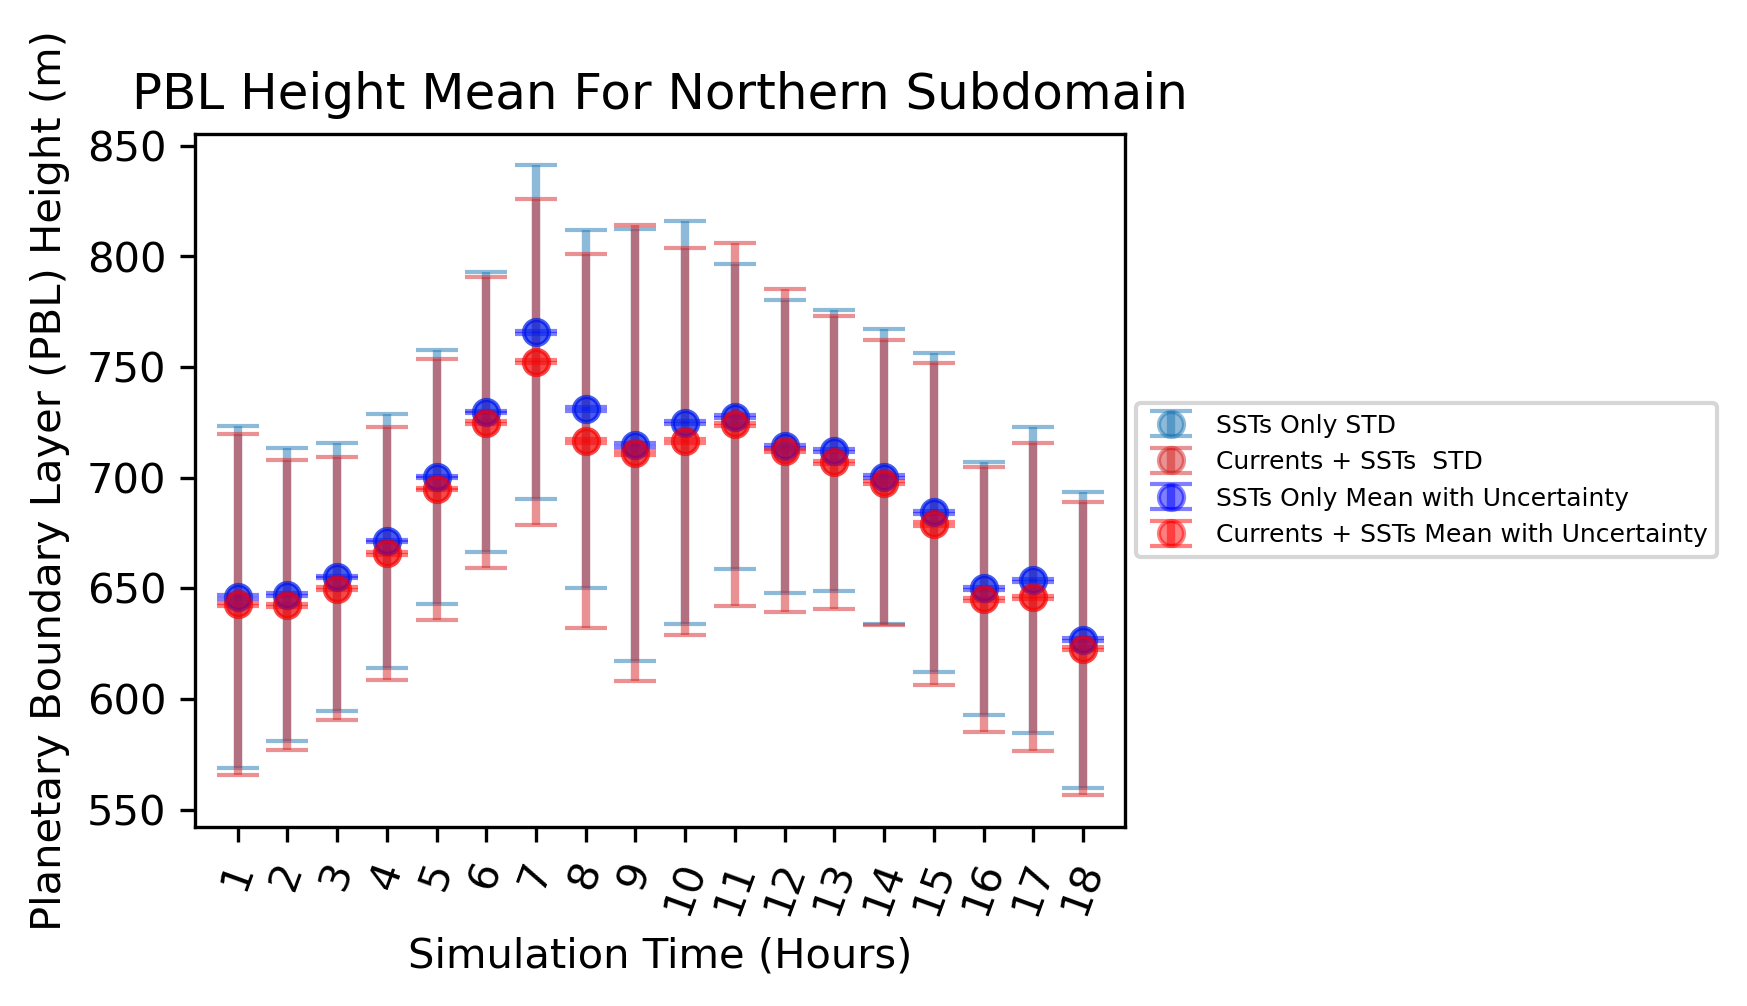

In [37]:
#plot NORTH

fig = plt.figure()
figure(figsize=(4,3), dpi=300)
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']
y1 = sst_mean_north
yerr1 = sst_std_north
y2 = cur_mean_north
yerr2 = cur_std_north
y3 = sst_mean_north
yerr3 = sst_mean_uncert_north 
y4 = cur_mean_north
yerr4 = cur_mean_uncert_north 


plt.errorbar(x, y1, yerr1, fmt='o', linewidth=2, capsize=5, color = 'tab:blue', alpha = 0.5, label ='SSTs Only STD' )
plt.errorbar(x, y2, yerr2, fmt='o', linewidth=2, capsize=5, color = 'tab:red', alpha = 0.5, label = 'Currents + SSTs  STD')
plt.errorbar(x, y3, yerr3, fmt='o', linewidth=2, capsize=5, color = 'blue', alpha = 0.5, label ='SSTs Only Mean with Uncertainty' )
plt.errorbar(x, y4, yerr4, fmt='o', linewidth=2, capsize=5, color = 'red', alpha = 0.5, label = 'Currents + SSTs Mean with Uncertainty')

plt.xticks(x, labels = labels, rotation = 70)
#plt.legend(loc="upper right", fontsize = 5)
plt.legend(loc='center right', bbox_to_anchor=(1.65, 0.5), fontsize = 6)
plt.xlabel('Simulation Time (Hours)')
plt.ylabel('Planetary Boundary Layer (PBL) Height (m)')
plt.title('PBL Height Mean For Northern Subdomain')
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/PBLH/'
plt.savefig(save_results_to + 'new_STAT_north_PBLH.png', bbox_inches = 'tight',dpi = 150)
plt.show()



In [38]:
fig = plt.figure()
figure(figsize=(4,3), dpi=300)
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']
y1 = sst_mean_south
yerr1 = sst_std_south
y2 = cur_mean_south
yerr2 = cur_std_south
y3 = sst_mean_south
yerr3 = sst_mean_uncert_south 
y4 = cur_mean_south
yerr4 = cur_mean_uncert_south 

plt.errorbar(x, y1, yerr1, fmt='o', linewidth=2, capsize=5, color = 'tab:blue', alpha = 0.5, label ='SSTs Only STD' )
plt.errorbar(x, y2, yerr2, fmt='o', linewidth=2, capsize=5, color = 'tab:red', alpha = 0.5, label = 'Currents + SSTs  STD')
plt.errorbar(x, y3, yerr3, fmt='o', linewidth=2, capsize=5, color = 'blue', alpha = 0.5, label ='SSTs Only Mean with Uncertainty' )
plt.errorbar(x, y4, yerr4, fmt='o', linewidth=2, capsize=5, color = 'red', alpha = 0.5, label = 'Currents + SSTs Mean with Uncertainty')


plt.xticks(x, labels = labels, rotation = 45)
plt.legend(loc='center right', bbox_to_anchor=(1.65, 0.5), fontsize = 6)
plt.xlabel('Simulation Time (Hours)')
plt.ylabel('Planetary Boundary Layer (PBL) Height (m)')
plt.title('PBL Height Mean For Southern Subdomain')
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/PBLH/'
plt.savefig(save_results_to + 'new_STAT_south_PBLH.png', bbox_inches = 'tight',dpi = 150)
plt.show()

<Figure size 640x480 with 0 Axes>

In [13]:
#calc difference 

#diff6 = np.subtract(new_cur_pblh_6, new_sst_pblh_6)
diff7 = np.subtract(new_cur_pblh_7, new_sst_pblh_7)
diff8 = np.subtract(new_cur_pblh_8, new_sst_pblh_8)
diff9 = np.subtract(new_cur_pblh_9, new_sst_pblh_9)
diff10 = np.subtract(new_cur_pblh_10, new_sst_pblh_10)
diff11 = np.subtract(new_cur_pblh_11, new_sst_pblh_11)
diff12 = np.subtract(new_cur_pblh_12, new_sst_pblh_12)
diff13 = np.subtract(new_cur_pblh_13, new_sst_pblh_13)
diff14 = np.subtract(new_cur_pblh_14, new_sst_pblh_14)
diff15 = np.subtract(new_cur_pblh_15, new_sst_pblh_15)
diff16 = np.subtract(new_cur_pblh_16, new_sst_pblh_16)
diff17 = np.subtract(new_cur_pblh_17, new_sst_pblh_17)
diff18 = np.subtract(new_cur_pblh_18, new_sst_pblh_18)
diff19 = np.subtract(new_cur_pblh_19, new_sst_pblh_19)
diff20 = np.subtract(new_cur_pblh_20, new_sst_pblh_20)
diff21 = np.subtract(new_cur_pblh_21, new_sst_pblh_21)
diff22 = np.subtract(new_cur_pblh_22, new_sst_pblh_22)
diff23 = np.subtract(new_cur_pblh_23, new_sst_pblh_23)
diff24 = np.subtract(new_cur_pblh_24, new_sst_pblh_24)

#print(np.max(diff6))
#print(np.max(diff7))
#print(np.max(diff8))
#print(np.max(diff9))
#print(np.max(diff10))
#print(np.max(diff11))
#print(np.max(diff12))
#print(np.max(diff13))
#print(np.max(diff14))
#print(np.max(diff15))
#print(np.max(diff16))
#print(np.max(diff17))
#print(np.max(diff18))
#print(np.max(diff19))
#print(np.max(diff20))
#print(np.max(diff21))
#print(np.max(diff22))
#print(np.max(diff23))
#print(np.max(diff24))

#print('\n', np.min(diff6))
#print(np.min(diff7))
#print(np.min(diff8))
#print(np.min(diff9))
#print(np.min(diff10))
#print(np.min(diff11))
#print(np.min(diff12))
#print(np.min(diff13))
#print(np.min(diff14))
#print(np.min(diff15))
#print(np.min(diff16))
#print(np.min(diff17))
#print(np.min(diff18))
#print(np.min(diff19))
#print(np.min(diff20))
#print(np.min(diff21))
#print(np.min(diff22))
#print(np.min(diff23))
#print(np.min(diff24))
#Bounds are: -600 to 500

#for plotting errorbar
sst7_pblh_north = north_sst_pblh7.flatten()
sst8_pblh_north = north_sst_pblh8.flatten()
sst9_pblh_north = north_sst_pblh9.flatten()
sst10_pblh_north = north_sst_pblh10.flatten()
sst11_pblh_north = north_sst_pblh11.flatten()
sst12_pblh_north = north_sst_pblh12.flatten()
sst13_pblh_north = north_sst_pblh13.flatten()
sst14_pblh_north = north_sst_pblh14.flatten()
sst15_pblh_north = north_sst_pblh15.flatten()
sst16_pblh_north = north_sst_pblh16.flatten()
sst17_pblh_north = north_sst_pblh17.flatten()
sst18_pblh_north = north_sst_pblh18.flatten()
sst19_pblh_north = north_sst_pblh19.flatten()
sst20_pblh_north = north_sst_pblh20.flatten()
sst21_pblh_north = north_sst_pblh21.flatten()
sst22_pblh_north = north_sst_pblh22.flatten()
sst23_pblh_north = north_sst_pblh23.flatten()
sst24_pblh_north = north_sst_pblh24.flatten()

sst7_pblh_south = south_sst_pblh7.flatten()
sst8_pblh_south = south_sst_pblh8.flatten()
sst9_pblh_south = south_sst_pblh9.flatten()
sst10_pblh_south = south_sst_pblh10.flatten()
sst11_pblh_south = south_sst_pblh11.flatten()
sst12_pblh_south = south_sst_pblh12.flatten()
sst13_pblh_south = south_sst_pblh13.flatten()
sst14_pblh_south = south_sst_pblh14.flatten()
sst15_pblh_south = south_sst_pblh15.flatten()
sst16_pblh_south = south_sst_pblh16.flatten()
sst17_pblh_south = south_sst_pblh17.flatten()
sst18_pblh_south = south_sst_pblh18.flatten()
sst19_pblh_south = south_sst_pblh19.flatten()
sst20_pblh_south = south_sst_pblh20.flatten()
sst21_pblh_south = south_sst_pblh21.flatten()
sst22_pblh_south = south_sst_pblh22.flatten()
sst23_pblh_south = south_sst_pblh23.flatten()
sst24_pblh_south = south_sst_pblh24.flatten()

cur7_pblh_north = north_cur_pblh7.flatten()
cur8_pblh_north = north_cur_pblh8.flatten()
cur9_pblh_north = north_cur_pblh9.flatten()
cur10_pblh_north = north_cur_pblh10.flatten()
cur11_pblh_north = north_cur_pblh11.flatten()
cur12_pblh_north = north_cur_pblh12.flatten()
cur13_pblh_north = north_cur_pblh13.flatten()
cur14_pblh_north = north_cur_pblh14.flatten()
cur15_pblh_north = north_cur_pblh15.flatten()
cur16_pblh_north = north_cur_pblh16.flatten()
cur17_pblh_north = north_cur_pblh17.flatten()
cur18_pblh_north = north_cur_pblh18.flatten()
cur19_pblh_north = north_cur_pblh19.flatten()
cur20_pblh_north = north_cur_pblh20.flatten()
cur21_pblh_north = north_cur_pblh21.flatten()
cur22_pblh_north = north_cur_pblh22.flatten()
cur23_pblh_north = north_cur_pblh23.flatten()
cur24_pblh_north = north_cur_pblh24.flatten()

cur7_pblh_south = south_cur_pblh7.flatten()
cur8_pblh_south = south_cur_pblh8.flatten()
cur9_pblh_south = south_cur_pblh9.flatten()
cur10_pblh_south = south_cur_pblh10.flatten()
cur11_pblh_south = south_cur_pblh11.flatten()
cur12_pblh_south = south_cur_pblh12.flatten()
cur13_pblh_south = south_cur_pblh13.flatten()
cur14_pblh_south = south_cur_pblh14.flatten()
cur15_pblh_south = south_cur_pblh15.flatten()
cur16_pblh_south = south_cur_pblh16.flatten()
cur17_pblh_south = south_cur_pblh17.flatten()
cur18_pblh_south = south_cur_pblh18.flatten()
cur19_pblh_south = south_cur_pblh19.flatten()
cur20_pblh_south = south_cur_pblh20.flatten()
cur21_pblh_south = south_cur_pblh21.flatten()
cur22_pblh_south = south_cur_pblh22.flatten()
cur23_pblh_south = south_cur_pblh23.flatten()
cur24_pblh_south = south_cur_pblh24.flatten()

cur_pblh_N = cur_pblh_north.flatten()
sst_pblh_N = sst_pblh_north.flatten()
cur_pblh_S = cur_pblh_south.flatten()
sst_pblh_S = sst_pblh_south.flatten()

#get mean
sst7_mean_north  = np.mean(north_sst_pblh7)
sst8_mean_north  = np.mean(north_sst_pblh8)
sst9_mean_north  = np.mean(north_sst_pblh9)
sst10_mean_north  = np.mean(north_sst_pblh10)
sst11_mean_north  = np.mean(north_sst_pblh11)
sst12_mean_north  = np.mean(north_sst_pblh12)
sst13_mean_north  = np.mean(north_sst_pblh13)
sst14_mean_north  = np.mean(north_sst_pblh14)
sst15_mean_north  = np.mean(north_sst_pblh15)
sst16_mean_north  = np.mean(north_sst_pblh16)
sst17_mean_north  = np.mean(north_sst_pblh17)
sst18_mean_north  = np.mean(north_sst_pblh18)
sst19_mean_north  = np.mean(north_sst_pblh19)
sst20_mean_north  = np.mean(north_sst_pblh20)
sst21_mean_north  = np.mean(north_sst_pblh21)
sst22_mean_north  = np.mean(north_sst_pblh22)
sst23_mean_north  = np.mean(north_sst_pblh23)
sst24_mean_north  = np.mean(north_sst_pblh24)

cur7_mean_north  = np.mean(north_cur_pblh7)
cur8_mean_north  = np.mean(north_cur_pblh8)
cur9_mean_north  = np.mean(north_cur_pblh9)
cur10_mean_north  = np.mean(north_cur_pblh10)
cur11_mean_north  = np.mean(north_cur_pblh11)
cur12_mean_north  = np.mean(north_cur_pblh12)
cur13_mean_north  = np.mean(north_cur_pblh13)
cur14_mean_north  = np.mean(north_cur_pblh14)
cur15_mean_north  = np.mean(north_cur_pblh15)
cur16_mean_north  = np.mean(north_cur_pblh16)
cur17_mean_north  = np.mean(north_cur_pblh17)
cur18_mean_north  = np.mean(north_cur_pblh18)
cur19_mean_north  = np.mean(north_cur_pblh19)
cur20_mean_north  = np.mean(north_cur_pblh20)
cur21_mean_north  = np.mean(north_cur_pblh21)
cur22_mean_north  = np.mean(north_cur_pblh22)
cur23_mean_north  = np.mean(north_cur_pblh23)
cur24_mean_north  = np.mean(north_cur_pblh24)

sst7_mean_south  = np.mean(south_sst_pblh7)
sst8_mean_south  = np.mean(south_sst_pblh8)
sst9_mean_south  = np.mean(south_sst_pblh9)
sst10_mean_south  = np.mean(south_sst_pblh10)
sst11_mean_south  = np.mean(south_sst_pblh11)
sst12_mean_south  = np.mean(south_sst_pblh12)
sst13_mean_south  = np.mean(south_sst_pblh13)
sst14_mean_south  = np.mean(south_sst_pblh14)
sst15_mean_south  = np.mean(south_sst_pblh15)
sst16_mean_south  = np.mean(south_sst_pblh16)
sst17_mean_south  = np.mean(south_sst_pblh17)
sst18_mean_south  = np.mean(south_sst_pblh18)
sst19_mean_south  = np.mean(south_sst_pblh19)
sst20_mean_south  = np.mean(south_sst_pblh20)
sst21_mean_south  = np.mean(south_sst_pblh21)
sst22_mean_south  = np.mean(south_sst_pblh22)
sst23_mean_south  = np.mean(south_sst_pblh23)
sst24_mean_south  = np.mean(south_sst_pblh24)

cur7_mean_south  = np.mean(south_cur_pblh7)
cur8_mean_south  = np.mean(south_cur_pblh8)
cur9_mean_south  = np.mean(south_cur_pblh9)
cur10_mean_south  = np.mean(south_cur_pblh10)
cur11_mean_south  = np.mean(south_cur_pblh11)
cur12_mean_south  = np.mean(south_cur_pblh12)
cur13_mean_south  = np.mean(south_cur_pblh13)
cur14_mean_south  = np.mean(south_cur_pblh14)
cur15_mean_south  = np.mean(south_cur_pblh15)
cur16_mean_south  = np.mean(south_cur_pblh16)
cur17_mean_south  = np.mean(south_cur_pblh17)
cur18_mean_south  = np.mean(south_cur_pblh18)
cur19_mean_south  = np.mean(south_cur_pblh19)
cur20_mean_south  = np.mean(south_cur_pblh20)
cur21_mean_south  = np.mean(south_cur_pblh21)
cur22_mean_south  = np.mean(south_cur_pblh22)
cur23_mean_south  = np.mean(south_cur_pblh23)
cur24_mean_south  = np.mean(south_cur_pblh24)

cur_pblh_N_mean = np.mean(cur_pblh_N)
sst_pblh_N_mean = np.mean(cur_pblh_S)
cur_pblh_S_mean = np.mean(sst_pblh_N)
sst_pblh_S_mean = np.mean(sst_pblh_S)


#get STD
sst7_std_north  = np.std(north_sst_pblh7)
sst8_std_north  = np.std(north_sst_pblh8)
sst9_std_north  = np.std(north_sst_pblh9)
sst10_std_north  = np.std(north_sst_pblh10)
sst11_std_north  = np.std(north_sst_pblh11)
sst12_std_north  = np.std(north_sst_pblh12)
sst13_std_north  = np.std(north_sst_pblh13)
sst14_std_north  = np.std(north_sst_pblh14)
sst15_std_north  = np.std(north_sst_pblh15)
sst16_std_north  = np.std(north_sst_pblh16)
sst17_std_north  = np.std(north_sst_pblh17)
sst18_std_north  = np.std(north_sst_pblh18)
sst19_std_north  = np.std(north_sst_pblh19)
sst20_std_north  = np.std(north_sst_pblh20)
sst21_std_north  = np.std(north_sst_pblh21)
sst22_std_north  = np.std(north_sst_pblh22)
sst23_std_north  = np.std(north_sst_pblh23)
sst24_std_north  = np.std(north_sst_pblh24)

cur7_std_north  = np.std(north_cur_pblh7)
cur8_std_north  = np.std(north_cur_pblh8)
cur9_std_north  = np.std(north_cur_pblh9)
cur10_std_north  = np.std(north_cur_pblh10)
cur11_std_north  = np.std(north_cur_pblh11)
cur12_std_north  = np.std(north_cur_pblh12)
cur13_std_north  = np.std(north_cur_pblh13)
cur14_std_north  = np.std(north_cur_pblh14)
cur15_std_north  = np.std(north_cur_pblh15)
cur16_std_north  = np.std(north_cur_pblh16)
cur17_std_north  = np.std(north_cur_pblh17)
cur18_std_north  = np.std(north_cur_pblh18)
cur19_std_north  = np.std(north_cur_pblh19)
cur20_std_north  = np.std(north_cur_pblh20)
cur21_std_north  = np.std(north_cur_pblh21)
cur22_std_north  = np.std(north_cur_pblh22)
cur23_std_north  = np.std(north_cur_pblh23)
cur24_std_north  = np.std(north_cur_pblh24)

sst7_std_south  = np.std(south_sst_pblh7)
sst8_std_south  = np.std(south_sst_pblh8)
sst9_std_south  = np.std(south_sst_pblh9)
sst10_std_south  = np.std(south_sst_pblh10)
sst11_std_south  = np.std(south_sst_pblh11)
sst12_std_south  = np.std(south_sst_pblh12)
sst13_std_south  = np.std(south_sst_pblh13)
sst14_std_south  = np.std(south_sst_pblh14)
sst15_std_south  = np.std(south_sst_pblh15)
sst16_std_south  = np.std(south_sst_pblh16)
sst17_std_south  = np.std(south_sst_pblh17)
sst18_std_south  = np.std(south_sst_pblh18)
sst19_std_south  = np.std(south_sst_pblh19)
sst20_std_south  = np.std(south_sst_pblh20)
sst21_std_south  = np.std(south_sst_pblh21)
sst22_std_south  = np.std(south_sst_pblh22)
sst23_std_south  = np.std(south_sst_pblh23)
sst24_std_south  = np.std(south_sst_pblh24)

cur7_std_south  = np.std(south_cur_pblh7)
cur8_std_south  = np.std(south_cur_pblh8)
cur9_std_south  = np.std(south_cur_pblh9)
cur10_std_south  = np.std(south_cur_pblh10)
cur11_std_south  = np.std(south_cur_pblh11)
cur12_std_south  = np.std(south_cur_pblh12)
cur13_std_south  = np.std(south_cur_pblh13)
cur14_std_south  = np.std(south_cur_pblh14)
cur15_std_south  = np.std(south_cur_pblh15)
cur16_std_south  = np.std(south_cur_pblh16)
cur17_std_south  = np.std(south_cur_pblh17)
cur18_std_south  = np.std(south_cur_pblh18)
cur19_std_south  = np.std(south_cur_pblh19)
cur20_std_south  = np.std(south_cur_pblh20)
cur21_std_south  = np.std(south_cur_pblh21)
cur22_std_south  = np.std(south_cur_pblh22)
cur23_std_south  = np.std(south_cur_pblh23)
cur24_std_south  = np.std(south_cur_pblh24)

cur_pblh_N_std = np.std(cur_pblh_N)
sst_pblh_N_std = np.std(cur_pblh_S)
cur_pblh_S_std = np.std(sst_pblh_N)
sst_pblh_S_std = np.std(sst_pblh_S)

sst_mean_north = [sst7_mean_north, sst8_mean_north, sst9_mean_north, sst10_mean_north, sst11_mean_north, sst12_mean_north, sst13_mean_north, sst14_mean_north, sst15_mean_north, sst16_mean_north, sst17_mean_north, sst18_mean_north, sst19_mean_north, sst20_mean_north, sst21_mean_north, sst22_mean_north, sst23_mean_north, sst24_mean_north]
sst_mean_south = [sst7_mean_south, sst8_mean_south, sst9_mean_south, sst10_mean_south, sst11_mean_south, sst12_mean_south, sst13_mean_south, sst14_mean_south, sst15_mean_south, sst16_mean_south, sst17_mean_south, sst18_mean_south, sst19_mean_south, sst20_mean_south, sst21_mean_south, sst22_mean_south, sst23_mean_south, sst24_mean_south]
cur_mean_north = [cur7_mean_north, cur8_mean_north, cur9_mean_north, cur10_mean_north, cur11_mean_north, cur12_mean_north, cur13_mean_north, cur14_mean_north, cur15_mean_north, cur16_mean_north, cur17_mean_north, cur18_mean_north, cur19_mean_north, cur20_mean_north, cur21_mean_north, cur22_mean_north, cur23_mean_north, cur24_mean_north]
cur_mean_south = [cur7_mean_south, cur8_mean_south, cur9_mean_south, cur10_mean_south, cur11_mean_south, cur12_mean_south, cur13_mean_south, cur14_mean_south, cur15_mean_south, cur16_mean_south, cur17_mean_south, cur18_mean_south, cur19_mean_south, cur20_mean_south, cur21_mean_south, cur22_mean_south, cur23_mean_south, cur24_mean_south]

sst_std_north = [sst7_std_north, sst8_std_north, sst9_std_north, sst10_std_north, sst11_std_north, sst12_std_north, sst13_std_north, sst14_std_north, sst15_std_north, sst16_std_north, sst17_std_north, sst18_std_north, sst19_std_north, sst20_std_north, sst21_std_north, sst22_std_north, sst23_std_north, sst24_std_north]
sst_std_south = [sst7_std_south, sst8_std_south, sst9_std_south, sst10_std_south, sst11_std_south, sst12_std_south, sst13_std_south, sst14_std_south, sst15_std_south, sst16_std_south, sst17_std_south, sst18_std_south, sst19_std_south, sst20_std_south, sst21_std_south, sst22_std_south, sst23_std_south, sst24_std_south]
cur_std_north = [cur7_std_north, cur8_std_north, cur9_std_north, cur10_std_north, cur11_std_north, cur12_std_north, cur13_std_north, cur14_std_north, cur15_std_north, cur16_std_north, cur17_std_north, cur18_std_north, cur19_std_north, cur20_std_north, cur21_std_north, cur22_std_north, cur23_std_north, cur24_std_north] 
cur_std_south = [cur7_std_south, cur8_std_south, cur9_std_south, cur10_std_south, cur11_std_south, cur12_std_south, cur13_std_south, cur14_std_south, cur15_std_south, cur16_std_south, cur17_std_south, cur18_std_south, cur19_std_south, cur20_std_south, cur21_std_south, cur22_std_south, cur23_std_south, cur24_std_south]

#N then S
avg_mean_cur = [cur_pblh_N_mean, cur_pblh_S_mean]
avg_std_cur = [cur_pblh_N_std, cur_pblh_S_std]
avg_mean_sst =[sst_pblh_N_mean, sst_pblh_S_mean]
avg_std_sst = [sst_pblh_N_std, sst_pblh_S_std]

print('sst_mean_north:', sst_mean_north)
print('sst_mean_south:', sst_mean_south)
print('cur_mean_north:', cur_mean_north)
print('cur_mean_south:', cur_mean_south)

NameError: name 'new_cur_pblh_7' is not defined

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

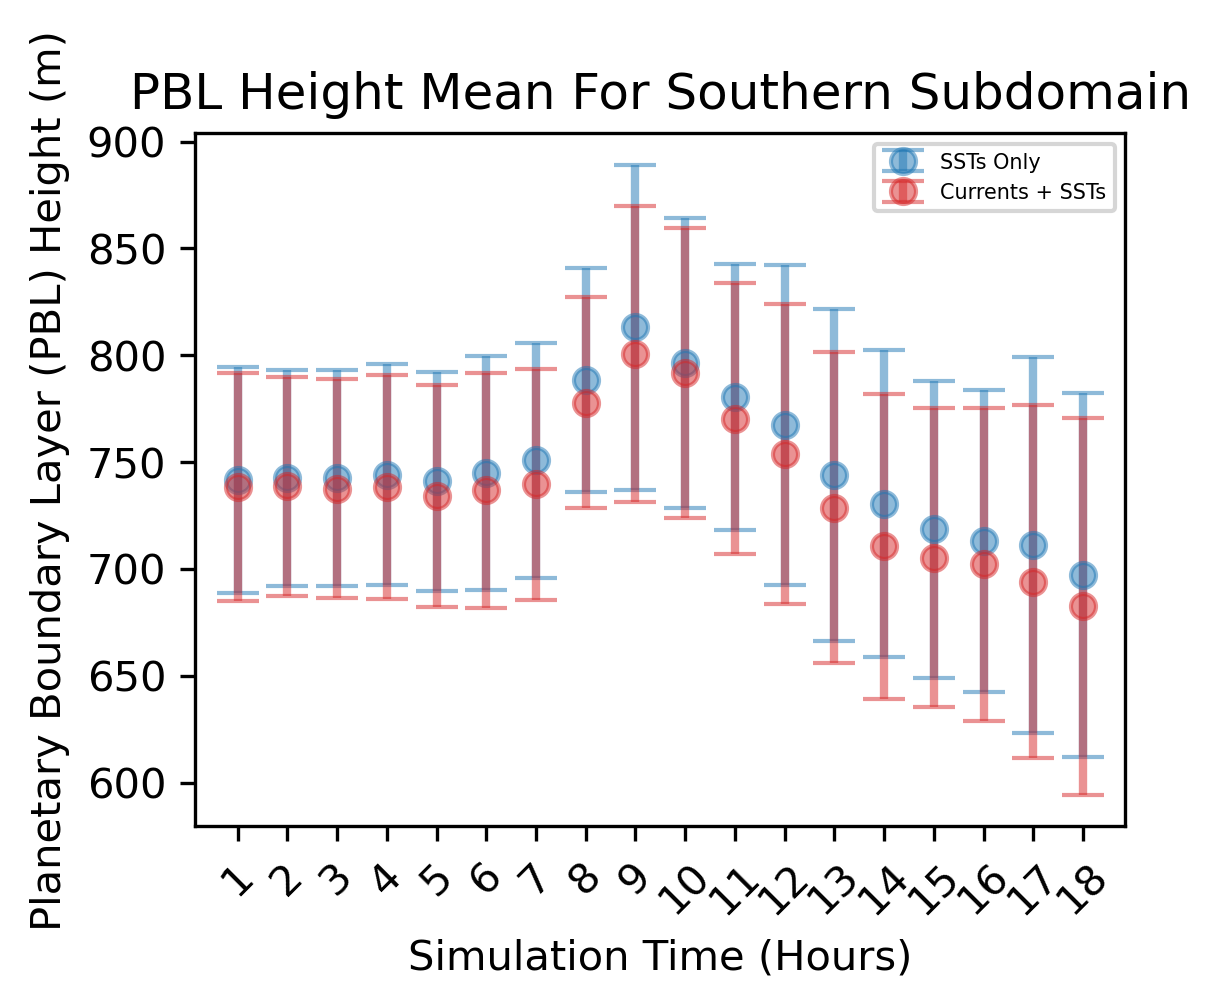

In [30]:
#plot NORTH

fig = plt.figure()
figure(figsize=(4,3), dpi=300)
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']
y1 = sst_mean_north
yerr1 = sst_std_north
y2 = cur_mean_north
yerr2 = cur_std_north
plt.errorbar(x, y1, yerr1, fmt='o', linewidth=2, capsize=5, color = 'tab:blue', alpha = 0.5, label ='SSTs Only' )
plt.errorbar(x, y2, yerr2, fmt='o', linewidth=2, capsize=5, color = 'tab:red', alpha = 0.5, label = 'Currents + SSTs')
plt.xticks(x, labels = labels, rotation = 45)
plt.legend(loc="upper right", fontsize = 5)
plt.xlabel('Simulation Time (Hours)')
plt.ylabel('Planetary Boundary Layer (PBL) Height (m)')
plt.title('PBL Height Mean For Northern Subdomain')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'STAT_north_PBLH.png', bbox_inches = 'tight',dpi = 150)
plt.show()

fig = plt.figure()
figure(figsize=(4,3), dpi=300)
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']
y1 = sst_mean_south
yerr1 = sst_std_south
y2 = cur_mean_south
yerr2 = cur_std_south
plt.errorbar(x, y1, yerr1, fmt='o', linewidth=2, capsize=5, color = 'tab:blue', alpha = 0.5, label ='SSTs Only' )
plt.errorbar(x, y2, yerr2, fmt='o', linewidth=2, capsize=5, color = 'tab:red', alpha = 0.5, label = 'Currents + SSTs')
plt.xticks(x, labels = labels, rotation = 45)
plt.legend(loc="upper right", fontsize = 5)
plt.xlabel('Simulation Time (Hours)')
plt.ylabel('Planetary Boundary Layer (PBL) Height (m)')
plt.title('PBL Height Mean For Southern Subdomain')
save_results_to = '/Users/Anna/Desktop/WRF/PBLH/'
plt.savefig(save_results_to + 'STAT_south_PBLH.png', bbox_inches = 'tight',dpi = 150)
plt.show()

In [34]:
'''
shf0=shfArr0
count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        if np.isnan(shf0[j,i]) == False or np.isnan(shf1[j,i]) == False:
            count = count + 1 
            sumSquare= sumSquare + np.square(np.subtract(shf0[j,i],shf1[j,i])) 
rmse=np.sqrt(sumSquare/count)  
print("Root Mean Square Error shf01: ", rmse)

#there are all the rms error values in an array for STD 
shfRMS=([ 1.321547955563861, 1.3172096825720598, 1.3187038927149204, 1.1445343127197316, 1.0237339947241182, 0.9366042722697767])
shfRMSstd=np.std(shfRMS)
print(shfRMSstd)
'''

yLen = len(lat_int)
xLen = len(lon_int)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_cur_pblh_6[j,i], new_cur_pblh_7[j,i])) 
rmse_cur67=np.sqrt(sumSquare/count)  
print("Root Mean Square Error CUR6-7: ", rmse_cur67)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_cur_pblh_7[j,i], new_cur_pblh_8[j,i])) 
rmse_cur78=np.sqrt(sumSquare/count)  
print("Root Mean Square Error CUR7-8: ", rmse_cur78)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_cur_pblh_8[j,i], new_cur_pblh_9[j,i])) 
rmse_cur89=np.sqrt(sumSquare/count)     
print("Root Mean Square Error CUR8-9: ", rmse_cur89)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_cur_pblh_9[j,i], new_cur_pblh_10[j,i])) 
rmse_cur910=np.sqrt(sumSquare/count)   
print("Root Mean Square Error CUR9-10: ", rmse_cur910)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_cur_pblh_10[j,i], new_cur_pblh_11[j,i])) 
rmse_cur1011=np.sqrt(sumSquare/count)   
print("Root Mean Square Error CUR10-11: ", rmse_cur1011)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_cur_pblh_11[j,i], new_cur_pblh_12[j,i])) 
rmse_cur1112=np.sqrt(sumSquare/count)   
print("Root Mean Square Error CUR11-12: ", rmse_cur1112)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_cur_pblh_12[j,i], new_cur_pblh_13[j,i])) 
rmse_cur1213=np.sqrt(sumSquare/count)  
print("Root Mean Square Error CUR12-13: ", rmse_cur1213)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_cur_pblh_13[j,i], new_cur_pblh_14[j,i])) 
rmse_cur1314=np.sqrt(sumSquare/count)  
print("Root Mean Square Error CUR13-14: ", rmse_cur1314)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_cur_pblh_14[j,i], new_cur_pblh_15[j,i])) 
rmse_cur1415=np.sqrt(sumSquare/count)  
print("Root Mean Square Error CUR14-15: ", rmse_cur1415)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_cur_pblh_15[j,i], new_cur_pblh_16[j,i])) 
rmse_cur1516=np.sqrt(sumSquare/count)  
print("Root Mean Square Error CUR15-16: ", rmse_cur1516)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_cur_pblh_16[j,i], new_cur_pblh_17[j,i])) 
rmse_cur1617=np.sqrt(sumSquare/count)  
print("Root Mean Square Error CUR16-17: ", rmse_cur1617)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_cur_pblh_17[j,i], new_cur_pblh_18[j,i])) 
rmse_cur1718=np.sqrt(sumSquare/count)  
print("Root Mean Square Error CUR17-18: ", rmse_cur1718)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_cur_pblh_18[j,i], new_cur_pblh_19[j,i])) 
rmse_cur1819=np.sqrt(sumSquare/count)  
print("Root Mean Square Error CUR18-19: ", rmse_cur1819)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_cur_pblh_19[j,i], new_cur_pblh_20[j,i])) 
rmse_cur1920=np.sqrt(sumSquare/count)  
print("Root Mean Square Error CUR19-20: ", rmse_cur1920)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_cur_pblh_20[j,i], new_cur_pblh_21[j,i])) 
rmse_cur2021=np.sqrt(sumSquare/count)  
print("Root Mean Square Error CUR19-20: ", rmse_cur2021)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_cur_pblh_21[j,i], new_cur_pblh_22[j,i])) 
rmse_cur2122=np.sqrt(sumSquare/count)  
print("Root Mean Square Error CUR21-22: ", rmse_cur2122)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_cur_pblh_22[j,i], new_cur_pblh_23[j,i])) 
rmse_cur2223=np.sqrt(sumSquare/count)  
print("Root Mean Square Error CUR22-23: ", rmse_cur2223)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_cur_pblh_23[j,i], new_cur_pblh_24[j,i])) 
rmse_cur2324=np.sqrt(sumSquare/count)     
print("Root Mean Square Error CUR23-24: ", rmse_cur2324)




cur_pblh_rms=([rmse_cur67, rmse_cur78, rmse_cur89, rmse_cur910, rmse_cur1011, rmse_cur1112, rmse_cur1213, rmse_cur1314,
               rmse_cur1415, rmse_cur1516, rmse_cur1617, rmse_cur1718, rmse_cur1819, rmse_cur1920, rmse_cur2021, rmse_cur2122,
               rmse_cur2223, rmse_cur2324])
cur_pblh_rms_std=np.std(cur_pblh_rms)
print('\n', cur_pblh_rms_std)

#WITHOUT 6 to 7
cur_pblh_rms2=([rmse_cur78, rmse_cur89, rmse_cur910, rmse_cur1011, rmse_cur1112, rmse_cur1213, rmse_cur1314,
               rmse_cur1415, rmse_cur1516, rmse_cur1617, rmse_cur1718, rmse_cur1819, rmse_cur1920, rmse_cur2021, rmse_cur2122,
               rmse_cur2223, rmse_cur2324])
cur_pblh_rms_std2=np.std(cur_pblh_rms2)
print('without 6-7: ', cur_pblh_rms_std2)



count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_sst_pblh_6[j,i], new_sst_pblh_7[j,i])) 
rmse_sst67=np.sqrt(sumSquare/count)  
print("\nRoot Mean Square Error sst 6-7: ", rmse_cur67)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_sst_pblh_7[j,i], new_sst_pblh_8[j,i])) 
rmse_sst78=np.sqrt(sumSquare/count)  
print("Root Mean Square Error sst 7-8: ", rmse_sst78)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_sst_pblh_8[j,i], new_sst_pblh_9[j,i])) 
rmse_sst89=np.sqrt(sumSquare/count)     
print("Root Mean Square Error sst 8-9: ", rmse_sst89)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_sst_pblh_9[j,i], new_sst_pblh_10[j,i])) 
rmse_sst910=np.sqrt(sumSquare/count)   
print("Root Mean Square Error sst9-10: ", rmse_sst910)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_sst_pblh_10[j,i], new_sst_pblh_11[j,i])) 
rmse_sst1011=np.sqrt(sumSquare/count)   
print("Root Mean Square Error sst 10-11: ", rmse_sst1011)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_sst_pblh_11[j,i], new_sst_pblh_12[j,i])) 
rmse_sst1112=np.sqrt(sumSquare/count)   
print("Root Mean Square Error sst 11-12: ", rmse_sst1112)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_sst_pblh_12[j,i], new_sst_pblh_13[j,i])) 
rmse_sst1213=np.sqrt(sumSquare/count)  
print("Root Mean Square Error sst 12-13: ", rmse_sst1213)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_sst_pblh_13[j,i], new_sst_pblh_14[j,i])) 
rmse_sst1314=np.sqrt(sumSquare/count)  
print("Root Mean Square Error sst 13-14: ", rmse_sst1314)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_sst_pblh_14[j,i], new_sst_pblh_15[j,i])) 
rmse_sst1415=np.sqrt(sumSquare/count)  
print("Root Mean Square Error sst 14-15: ", rmse_sst1415)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_sst_pblh_15[j,i], new_sst_pblh_16[j,i])) 
rmse_sst1516=np.sqrt(sumSquare/count)  
print("Root Mean Square Error sst 15-16: ", rmse_sst1516)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_sst_pblh_16[j,i], new_sst_pblh_17[j,i])) 
rmse_sst1617=np.sqrt(sumSquare/count)  
print("Root Mean Square Error sst 16-17: ", rmse_sst1617)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_sst_pblh_17[j,i], new_sst_pblh_18[j,i])) 
rmse_sst1718=np.sqrt(sumSquare/count)  
print("Root Mean Square Error sst 17-18: ", rmse_sst1718)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_sst_pblh_18[j,i], new_sst_pblh_19[j,i])) 
rmse_sst1819=np.sqrt(sumSquare/count)  
print("Root Mean Square Error sst 18-19: ", rmse_sst1819)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_sst_pblh_19[j,i], new_sst_pblh_20[j,i])) 
rmse_sst1920=np.sqrt(sumSquare/count)  
print("Root Mean Square Error sst 19-20: ", rmse_sst1920)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_sst_pblh_20[j,i], new_sst_pblh_21[j,i])) 
rmse_sst2021=np.sqrt(sumSquare/count)  
print("Root Mean Square Error sst 19-20: ", rmse_sst2021)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_sst_pblh_21[j,i], new_sst_pblh_22[j,i])) 
rmse_sst2122=np.sqrt(sumSquare/count)  
print("Root Mean Square Error sst 21-22: ", rmse_sst2122)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_sst_pblh_22[j,i], new_sst_pblh_23[j,i])) 
rmse_sst2223=np.sqrt(sumSquare/count)  
print("Root Mean Square Error sst 22-23: ", rmse_sst2223)

count=0
sumSquare=0
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        count = count + 1 
        sumSquare= sumSquare + np.square(np.subtract(new_sst_pblh_23[j,i], new_sst_pblh_24[j,i])) 
rmse_sst2324=np.sqrt(sumSquare/count)     
print("Root Mean Square Error CUR23-24: ", rmse_sst2324)




sst_pblh_rms=([rmse_sst67, rmse_sst78, rmse_sst89, rmse_sst910, rmse_sst1011, rmse_sst1112, rmse_sst1213, rmse_sst1314,
               rmse_sst1415, rmse_sst1516, rmse_sst1617, rmse_sst1718, rmse_sst1819, rmse_sst1920, rmse_sst2021, rmse_sst2122,
               rmse_sst2223, rmse_sst2324])
sst_pblh_rms_std=np.std(sst_pblh_rms)
print('\n', sst_pblh_rms_std)

#WITHOUT 6 to 7
sst_pblh_rms2=([rmse_sst78, rmse_sst89, rmse_sst910, rmse_sst1011, rmse_sst1112, rmse_sst1213, rmse_sst1314,
               rmse_sst1415, rmse_sst1516, rmse_sst1617, rmse_sst1718, rmse_sst1819, rmse_sst1920, rmse_sst2021, rmse_sst2122,
               rmse_sst2223, rmse_sst2324])
sst_pblh_rms_std2=np.std(sst_pblh_rms2)
print('without 6-7: ', sst_pblh_rms_std2)


Root Mean Square Error CUR6-7:  756.2312742150331
Root Mean Square Error CUR7-8:  13.22948114302042
Root Mean Square Error CUR8-9:  12.007166569939644
Root Mean Square Error CUR9-10:  14.412004635823608
Root Mean Square Error CUR10-11:  16.254239052458473
Root Mean Square Error CUR11-12:  20.10073412638522
Root Mean Square Error CUR12-13:  25.414424747068047
Root Mean Square Error CUR13-14:  49.94434449905973
Root Mean Square Error CUR14-15:  66.32331575582359
Root Mean Square Error CUR15-16:  77.44445345771334
Root Mean Square Error CUR16-17:  85.15167092989378
Root Mean Square Error CUR17-18:  91.52589698845257
Root Mean Square Error CUR18-19:  89.16755073904373
Root Mean Square Error CUR19-20:  78.36072007284169
Root Mean Square Error CUR19-20:  74.33249225937331
Root Mean Square Error CUR21-22:  76.38028937388374
Root Mean Square Error CUR22-23:  87.69005130075185
Root Mean Square Error CUR23-24:  96.72057022929187

 163.0159081497266
without 6-7:  31.620452011389993

Root Mean Squ